In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import signac
from scipy.optimize import curve_fit, minimize
import matplotlib.pylab as pl








In [2]:
#Various Useful functions

def load_data(projs):
    allfreqs = []
    allacts = []
    vals = []
    allfields = []
    alleigs = []

    for kt, proj in enumerate(projs):


        for job in signac.get_project(proj):


            #break
            try:
                print(proj, job, job.sp.i, job.sp.end)
                with job:
                        if job.isfile("activities.npy"):
                            print('a')

                            allacts.append(np.load("activities.npy"))
                            allfreqs.append(np.load("qfreqs.npy"))
                            allfields.append(np.load('fields.npy'))
                            alleigs.append(np.load('qeigs.npy'))
                            vals.append([job.sp.end + kt*100, job.sp.kstretch,  job.sp.kbendstd])
                            print(kt, job.sp.end + kt*100)


            except:
                pass






    vals = np.asarray(vals) #Column 1 of vals gives different indices to different jobs in the project
    vals = np.round(np.asarray(vals), 8)


    sorting = np.argsort(vals[:,0])
    allacts = np.asarray(allacts, dtype='object')[sorting]
    vals = np.asarray(vals, dtype='object')[sorting]
    allfreqs = np.asarray(allfreqs, dtype='object')[sorting]
    allfields = np.asarray(allfields, dtype='object')[sorting]
    alleigs = np.asarray(alleigs, dtype='object')[sorting]
    
    return vals, allacts, allfreqs, allfields, alleigs


def compute_free_OHs(vs, vals, allfields):
    hfields = []

    for ft,u in enumerate(vs):
        print(u)
        vt = np.where((vals[:, 0] == u))
        fields = np.concatenate(allfields[vt])
        hfields.append(fields)

    for i in range(5):
        print(len(hfields[2*i+1]) / (len(hfields[2*i]) + len(hfields[2*i + 1])))
        
def compute_fields(vs, vals, allfields):
    
    sortfields = []
    for ft,u in enumerate(vs):#, 10.000003]:
        vt = np.where((vals[:, 0] == u))



        activities = np.concatenate(allacts[vt])
        freqs = np.concatenate(allfreqs[vt])
        fields = np.concatenate(allfields[vt])
        sortfields.append(fields)
        
    sortfields = np.array(sortfields, dtype='object')

    probfields = []
    labels = ['No free OH', "Free OH"]
    for i in [0, 1]:
        fields = sortfields[i]
        bina, bins = np.histogram(-fields, range=(-5, 1), bins=61)
        binw = bins[1] - bins[0]

        bins = bins[:-1] + binw/2
        plt.plot(bins, bina / binw / np.sum(bina), label=labels[i])
        probfields.append(bina)

    bulkfields = np.concatenate(sortfields[[6, 7, 8, 9]])
    bina, bins = np.histogram(-bulkfields, range=(-5, 1), bins=61)

    bins = bins[:-1] + binw/2
    plt.plot(bins, bina / binw / np.sum(bina), label='bulk fields')
    plt.legend()

    probfields.append(bina)
    
    probfields.insert(0, bins)

    
    return probfields


def sort_spectra(vs, vals, allfreqs, allacts):
    

    sig = 29.72399
    combos = []
    fs = 15



    alts = []
    for ft,u in enumerate(vs):


        vt = np.where((vals[:, 0] == u))
        activities = np.concatenate(allacts[vt])
        freqs = np.concatenate(allfreqs[vt])


        plt.figure(1)
        xx = np.round(np.linspace(900, 4000, 621))
        iso = [[],[],[],[]]
        
        for x in xx:
            for j in range(4):
                wh = np.where(np.abs(freqs[:,j] - x) < 2.5)
                vv = np.sum(activities[wh][:,j])
                dis = np.abs(freqs[:,j] - x)
                inten = np.sum(np.exp(-(dis/sig)**2)*activities[:,j])
                iso[j].append(inten)

        iso = np.asarray(iso)
        plt.plot(xx, np.sum(iso, axis=0))
        plt.xlim(3000, 3800)
        plt.xlabel('$\omega$ (cm$^{-1}$)', size=fs)
        plt.ylabel('Intensity', size=fs)
        plt.xticks(size=fs)
        plt.yticks(size=fs)

        plt.figure(2)
        aniso = [[],[],[],[]]
        
        for x in xx:
            for j in range(4):
                wh = np.where(np.abs(freqs[:,j] - x) < 2.5)
                vv = np.sum(activities[wh][:,j+4])

                dis = np.abs(freqs[:,j] - x)
                inten = np.sum(np.exp(-(dis/sig)**2)*activities[:,j+4])
                aniso[j].append(inten)


        aniso = np.asarray(aniso)
        plt.plot(xx, np.sum(aniso, axis=0)/np.max(np.sum(aniso, axis=0)[:200]))
        plt.xlabel('$\omega$ (cm$^{-1}$)', size=fs)
        plt.ylabel('Intensity', size=fs)
        plt.xticks(size=fs)
        plt.yticks([], size=fs)
        plt.xlim(2900, 3800)

        plt.figure(3)
        combo = np.sum(aniso*21/90 + iso/9, axis=0) #Combining
        plt.xlabel('$\omega$ (cm$^{-1}$)', size=fs)
        plt.ylabel('Intensity', size=fs)
        plt.xticks(size=fs)
        plt.yticks([], size=fs)
        plt.plot(xx, combo/np.max(combo[:540])**1, linewidth = 1)
        plt.xlim(2900, 3800)
        print(ft)
        combos.append([xx, np.sum(iso, axis=0), np.sum(aniso, axis=0), combo])
        
    return combos



    






In [3]:
projs = [
         '../ramans/amoeba/edgedoubles',
         '../ramans/amoeba/edgeones',
         '../ramans/amoeba/centerdoubles',
         '../ramans/amoeba/centerones']

vals, allacts, allfreqs, allfields, alleig = load_data(projs)

../ramans/amoeba/edgedoubles 00150512cd135b9f23469dbb652fa4fb 1230 6
a
0 6
../ramans/amoeba/edgedoubles 001b411013226d4d49e9ad18c5eb835c 265 6
a
0 6
../ramans/amoeba/edgedoubles 0020104fa0a96f6a25856b864447385e 1745 2
a
0 2
../ramans/amoeba/edgedoubles 0071e04a4705214ae45a2370d633aeee 355 -2
a
0 -2
../ramans/amoeba/edgedoubles 007a125e7c950649f3698b12b5b5304f 1635 -2
a
0 -2
../ramans/amoeba/edgedoubles 00a10ce5361d456d60f6f9526032299c 980 6
a
0 6
../ramans/amoeba/edgedoubles 00a4a992265983fabfca52dadbb1feb2 1275 2
a
0 2
../ramans/amoeba/edgedoubles 00f3414060eb4a72a8d88083c6c30456 525 -2
a
0 -2
../ramans/amoeba/edgedoubles 01388a4e594112a3ba423f4ac7755409 1005 2
a
0 2
../ramans/amoeba/edgedoubles 01644ba491409ffc5537281569ef773f 1465 2
a
0 2
../ramans/amoeba/edgedoubles 018d639caf0df5f1fbaaef909c1b7f98 675 -2
a
0 -2
../ramans/amoeba/edgedoubles 019c97ccd755d6a30f97b169904b4c07 260 2
a
0 2
../ramans/amoeba/edgedoubles 01cef57e3292fa28af0972e91b039cbe 665 6
a
0 6
../ramans/amoeba/edgedou

0 6
../ramans/amoeba/edgedoubles 1d0bad516ca3e104f609a547c007cc9d 595 -2
a
0 -2
../ramans/amoeba/edgedoubles 1d0e3b66ab1f9158e6d9380e6e6af59f 10 6
a
0 6
../ramans/amoeba/edgedoubles 1d63082b5247687e0620701d6a278f98 1420 2
a
0 2
../ramans/amoeba/edgedoubles 1e231294aeed50f1e89d8a4d915c3785 705 -2
a
0 -2
../ramans/amoeba/edgedoubles 1e4553214acf36ababe95aaba2bd152a 1785 2
a
0 2
../ramans/amoeba/edgedoubles 1eaa0a6e8e4765326a15ae3b29c6ecc2 1890 6
a
0 6
../ramans/amoeba/edgedoubles 1eba890626d0f7518af500100060520b 1520 2
a
0 2
../ramans/amoeba/edgedoubles 1f025258d8eb2d488ca7ab81a5c6b8d7 665 -2
a
0 -2
../ramans/amoeba/edgedoubles 1f5c4ac5e37f9a3587e848600b82d1dc 445 6
a
0 6
../ramans/amoeba/edgedoubles 1f73a224dfcb1aa2fcac8ac0b3ab517e 1505 6
a
0 6
../ramans/amoeba/edgedoubles 1f846a5db041db09fb64fd147a4f7190 1710 6
a
0 6
../ramans/amoeba/edgedoubles 1f8e387c32e9c599a7f6b4591558507a 1170 6
a
0 6
../ramans/amoeba/edgedoubles 200158bdce350115af81d83076125c4d 135 -2
a
0 -2
../ramans/amoeba/edg

../ramans/amoeba/edgedoubles 31dcffcd23eebd8103497e68d3fabba2 885 -2
a
0 -2
../ramans/amoeba/edgedoubles 329a2260bebed4c5b67e9545ce7fc104 1180 -2
a
0 -2
../ramans/amoeba/edgedoubles 32bdfda0860c3262942451f0152199ec 1155 -2
a
0 -2
../ramans/amoeba/edgedoubles 330d646091166590b7631b0a85fc2aff 865 6
a
0 6
../ramans/amoeba/edgedoubles 332a43d66d6678f70c904e4e7741c56c 1025 2
a
0 2
../ramans/amoeba/edgedoubles 3356d2a41ef8e798a0ce81b4d8217c98 900 2
a
0 2
../ramans/amoeba/edgedoubles 336c94fdb1b474957b53809179200c7b 1350 6
a
0 6
../ramans/amoeba/edgedoubles 33beb94a30e206364afb5d03359b3067 1495 -2
a
0 -2
../ramans/amoeba/edgedoubles 33c5c8cee8478997017eea91f4ba6ab6 1470 6
a
0 6
../ramans/amoeba/edgedoubles 34305522eddbcaa65d73500d115bd71e 1625 6
a
0 6
../ramans/amoeba/edgedoubles 34757eb37a31a1552d2713de18eddef4 1895 6
a
0 6
../ramans/amoeba/edgedoubles 347d5b80fec5102b042ae4058a164e48 1525 2
a
0 2
../ramans/amoeba/edgedoubles 349ffc5a6e6da7693e95aed4b4bd349c 1870 -2
a
0 -2
../ramans/amoeba/e

0 2
../ramans/amoeba/edgedoubles 4ba32bd8af125d3cf2d122bd7456d3f6 1285 2
a
0 2
../ramans/amoeba/edgedoubles 4baae20c02e1b6258fc33340dc6b1cb5 1425 2
a
0 2
../ramans/amoeba/edgedoubles 4c0b56f9d7545c7b8b44ddd2d518a91d 1210 6
a
0 6
../ramans/amoeba/edgedoubles 4c3823fedeea57aa2b323fdf17462628 1085 -2
a
0 -2
../ramans/amoeba/edgedoubles 4c6dda43c914c260946909704a6397da 1835 -2
a
0 -2
../ramans/amoeba/edgedoubles 4cad728008b6b6221c4dbe8355f246e8 280 2
a
0 2
../ramans/amoeba/edgedoubles 4cd93cd3c0daf9080f76af053b4ba137 1805 2
a
0 2
../ramans/amoeba/edgedoubles 4d06b815024ddea7c444619e50b89da3 585 6
a
0 6
../ramans/amoeba/edgedoubles 4d2180b74226f4ee72871a5f6a3283e1 985 6
a
0 6
../ramans/amoeba/edgedoubles 4d63085369bf5768778b986a91abe870 650 6
a
0 6
../ramans/amoeba/edgedoubles 4d7c3d1f889ca8d9cf327f66292f8c8f 310 2
a
0 2
../ramans/amoeba/edgedoubles 4deb207560a19551f4e7566927a986c9 1365 6
a
0 6
../ramans/amoeba/edgedoubles 4e3d04754e65272f5c0fa9d7b120f06b 245 6
a
0 6
../ramans/amoeba/edgedo

0 -2
../ramans/amoeba/edgedoubles 646edbf6e47c6e8617fce1f03e6c684c 330 6
a
0 6
../ramans/amoeba/edgedoubles 648087d8125c1ba76736cd7195443e9c 1760 6
a
0 6
../ramans/amoeba/edgedoubles 649e3c29bcba6881a91f7b65aeb3b85a 860 -2
a
0 -2
../ramans/amoeba/edgedoubles 64ba287db3ac952aa3ca1e38e1f15f01 1165 -2
a
0 -2
../ramans/amoeba/edgedoubles 64dea9004f28767ed8885e4fd40bca44 425 2
a
0 2
../ramans/amoeba/edgedoubles 653e709aa90337084238020fa261080c 1480 -2
a
0 -2
../ramans/amoeba/edgedoubles 65ac57be831fe4711c1e2156986a7daf 100 -2
a
0 -2
../ramans/amoeba/edgedoubles 65c5db421cfac83445a950ae569d2e0f 1125 2
a
0 2
../ramans/amoeba/edgedoubles 65d2375294fd1c93c611076beb60beea 1775 6
a
0 6
../ramans/amoeba/edgedoubles 663895be50bc5f8041abdcd1de381ccc 1535 -2
a
0 -2
../ramans/amoeba/edgedoubles 665278b802b742e015de7deb98830a65 630 2
a
0 2
../ramans/amoeba/edgedoubles 667a454e95499ae3ff7e669fb41f017d 1355 -2
a
0 -2
../ramans/amoeba/edgedoubles 66f19a3132bb2c0171ad52679f94bc9c 30 -2
a
0 -2
../ramans/amo

0 6
../ramans/amoeba/edgedoubles 7ab0b76ece47ffe7c2be70941fb458df 1435 6
a
0 6
../ramans/amoeba/edgedoubles 7ab25b29596aee9d5ae6021f97d5522b 1260 2
a
0 2
../ramans/amoeba/edgedoubles 7abe12e0ba8aacbe46c9e39f0b2a6de6 750 6
a
0 6
../ramans/amoeba/edgedoubles 7b026429a718d9769b0f3872e3ebf498 1475 -2
a
0 -2
../ramans/amoeba/edgedoubles 7b06058dbc7a21c3233a6997908cb193 655 -2
a
0 -2
../ramans/amoeba/edgedoubles 7b3759098d2b26bdfb809c6c1ad114d4 1370 6
a
0 6
../ramans/amoeba/edgedoubles 7b5fc45d07218e11ce65d76bf0cd1c16 750 2
a
0 2
../ramans/amoeba/edgedoubles 7b984dd7425a387b4f2377d1d92dddc1 1565 -2
a
0 -2
../ramans/amoeba/edgedoubles 7be57bd025a6af19885c1f94721c81c8 230 6
a
0 6
../ramans/amoeba/edgedoubles 7c3bd421be2ecf843ad45caada6739e3 280 -2
a
0 -2
../ramans/amoeba/edgedoubles 7c6f42d17b08deeb9e8ba08f984ce1cd 1470 2
a
0 2
../ramans/amoeba/edgedoubles 7cc6c3111f17d4e6716dd24cce3e237b 745 -2
a
0 -2
../ramans/amoeba/edgedoubles 7d60388e3997dd8e467562fb2003b746 210 2
a
0 2
../ramans/amoeba/e

0 6
../ramans/amoeba/edgedoubles 92313492315128c573509e584f815ece 1120 -2
a
0 -2
../ramans/amoeba/edgedoubles 924db57d2112f50c57f087996c5aee86 1210 2
a
0 2
../ramans/amoeba/edgedoubles 927e2b338af21f6cdac5b36e5ece7f59 330 2
a
0 2
../ramans/amoeba/edgedoubles 92886f18932094642001d7aaf16f5983 1740 6
a
0 6
../ramans/amoeba/edgedoubles 929298c3c47235580f0af5c64f6264fa 1280 -2
a
0 -2
../ramans/amoeba/edgedoubles 92b1868bb1dc4857cba0cb76769e1abe 1410 -2
a
0 -2
../ramans/amoeba/edgedoubles 931347b5fffdae386ec0340d4cbd208d 1020 2
a
0 2
../ramans/amoeba/edgedoubles 93cb6af59bba279ac696d2bca4a97c8a 1020 6
a
0 6
../ramans/amoeba/edgedoubles 93ef7e80f4dda0e1342539a54796f16a 560 2
a
0 2
../ramans/amoeba/edgedoubles 93f9df5a0db058f6496adce93e923560 450 -2
a
0 -2
../ramans/amoeba/edgedoubles 941663884d3e930a95e836e1bd8b20d4 195 2
a
0 2
../ramans/amoeba/edgedoubles 9430ea4a498500dcddfc3e8919a1f4fd 1235 6
a
0 6
../ramans/amoeba/edgedoubles 944cc67c7956061acdda520c496f1553 1405 2
a
0 2
../ramans/amoeba/

0 2
../ramans/amoeba/edgedoubles add69860e2389d7ebf5b5ea6e70a673d 450 6
a
0 6
../ramans/amoeba/edgedoubles adde1c8002221df8e905a7b18370a034 1620 6
a
0 6
../ramans/amoeba/edgedoubles ae00395907aee3f5428d006c47b572f3 865 -2
a
0 -2
../ramans/amoeba/edgedoubles ae077dccb8e563c58c831091090d2f0c 1455 -2
a
0 -2
../ramans/amoeba/edgedoubles aeb6e5aeee56de3f17655620aaba1192 1130 2
a
0 2
../ramans/amoeba/edgedoubles aef03eeb57dd97d5317718c6c2045d75 790 6
a
0 6
../ramans/amoeba/edgedoubles af05efe2aa784692c5cd262f02c3a35c 935 2
a
0 2
../ramans/amoeba/edgedoubles af6430c4ab517b30b1586f1aa23ad34b 550 2
a
0 2
../ramans/amoeba/edgedoubles af676912f42a5e3a2f957bd4d61dc95a 205 -2
a
0 -2
../ramans/amoeba/edgedoubles af82d137b5f45e337917178b1f65b024 1240 -2
a
0 -2
../ramans/amoeba/edgedoubles afe6d8fa930e659f0373bbb66daaf40d 1540 6
a
0 6
../ramans/amoeba/edgedoubles affe497e65500bb585cc48bd83d82cd6 1145 2
a
0 2
../ramans/amoeba/edgedoubles b0017297a5f929f04ccefb1e703516bd 890 2
a
0 2
../ramans/amoeba/edg

0 2
../ramans/amoeba/edgedoubles c4ac35033341ccf2f72bdafc31e99108 215 2
a
0 2
../ramans/amoeba/edgedoubles c4c7d999492da130e703142590665505 1045 6
a
0 6
../ramans/amoeba/edgedoubles c5467ff48c1770d9f51a97f8c3e77562 890 -2
a
0 -2
../ramans/amoeba/edgedoubles c5e12215dff64e86db5aa5d7d609bc6c 490 6
a
0 6
../ramans/amoeba/edgedoubles c6142df9f5a0e03159b5298fc57a73a9 585 2
a
0 2
../ramans/amoeba/edgedoubles c68062522409a680fed3b6459e2d97b0 1105 2
a
0 2
../ramans/amoeba/edgedoubles c68d8fe8a72edade05f7350768f7eab7 915 6
a
0 6
../ramans/amoeba/edgedoubles c708e6a41f151b606e121a44a2f0fe4a 1920 6
a
0 6
../ramans/amoeba/edgedoubles c71b5a7c6058e45666eb8c0afd6bed1e 1110 2
a
0 2
../ramans/amoeba/edgedoubles c73c4c4bfac138180398c4cd824470dc 675 2
a
0 2
../ramans/amoeba/edgedoubles c756a7d76e8e7cdb5c1ce54adc4baf47 720 -2
a
0 -2
../ramans/amoeba/edgedoubles c7d905cc5a4c2dd9026e7cd86218b154 860 6
a
0 6
../ramans/amoeba/edgedoubles c7e2089217fa234aef7a0cc1200b2875 1430 6
a
0 6
../ramans/amoeba/edgedoub

0 -2
../ramans/amoeba/edgedoubles e2c20bb98f20b27bdfaa75654a0d13a5 1365 2
a
0 2
../ramans/amoeba/edgedoubles e2eb5eea300f0539352a7d700542f6d3 1275 6
a
0 6
../ramans/amoeba/edgedoubles e36d894f3da638b0a42c337396ef1c6c 1945 2
a
0 2
../ramans/amoeba/edgedoubles e44a9cf2a91cb47435a8f72dc5d0333a 1335 2
a
0 2
../ramans/amoeba/edgedoubles e4537051b7260ea319577a152d5ba7f2 1940 2
a
0 2
../ramans/amoeba/edgedoubles e454b343017ab7d7b9ed147f70083ca9 1535 6
a
0 6
../ramans/amoeba/edgedoubles e483b9113573bf7dc2a25c7559707f62 495 2
a
0 2
../ramans/amoeba/edgedoubles e48b55a3864e26027c02d514c644fdf2 1710 2
a
0 2
../ramans/amoeba/edgedoubles e4aaad12b803421f69a52b5f0606129f 1900 6
a
0 6
../ramans/amoeba/edgedoubles e4d278d2e357f5c17f74e9621075e918 50 -2
a
0 -2
../ramans/amoeba/edgedoubles e4d8db83ca5a3a47f489dc81cf1a0745 295 6
a
0 6
../ramans/amoeba/edgedoubles e4f30547c07bb130699dc82e9fc93c5d 1265 2
a
0 2
../ramans/amoeba/edgedoubles e52eb9992fcb5e7bbdfb078090ec7dab 715 2
a
0 2
../ramans/amoeba/edgedo

0 2
../ramans/amoeba/edgedoubles f9d17c2da017a4a751511d7f02e11e6d 1290 2
a
0 2
../ramans/amoeba/edgedoubles fa4ddb1a714c5b5456917c099901ff9c 1615 2
a
0 2
../ramans/amoeba/edgedoubles fa7b2ba97667ec5cc815cbecfe600703 500 -2
a
0 -2
../ramans/amoeba/edgedoubles faa0dc85942ba797ccdb8b98b761449e 1400 2
a
0 2
../ramans/amoeba/edgedoubles fad00d9515059a65050b151fbfac2778 345 6
a
0 6
../ramans/amoeba/edgedoubles fae7dac84795f51980834aa14b00d1b9 1870 2
a
0 2
../ramans/amoeba/edgedoubles faf36f5685ba94801530845ed670a131 250 -2
a
0 -2
../ramans/amoeba/edgedoubles fb0c021dd9e1a24a4e63a3c3bd9bc274 1830 2
a
0 2
../ramans/amoeba/edgedoubles fbe459b9e5cfbe779672e905440a1828 830 6
a
0 6
../ramans/amoeba/edgedoubles fc13e4f4867e3483a8c90569fb80df02 255 -2
a
0 -2
../ramans/amoeba/edgedoubles fc24f22f2a12d956c2441396422cb059 1150 6
a
0 6
../ramans/amoeba/edgedoubles fc2cdfe17a65958503d1e1c215b48848 1090 -2
a
0 -2
../ramans/amoeba/edgedoubles fc3249cf703bf6fd963a7548f8058d35 1380 6
a
0 6
../ramans/amoeba/e

1 102
../ramans/amoeba/edgeones 17f6e0adab12d28ad765c0de46b9a3bc 1525 -2
a
1 98
../ramans/amoeba/edgeones 186f4de1667121625892fe2f4acbce42 1525 6
a
1 106
../ramans/amoeba/edgeones 188c288ee9ab9c50bd7914f949dbd9a0 1040 -2
a
1 98
../ramans/amoeba/edgeones 18c59933a4c972b778b7f5188fcc5081 1490 2
a
1 102
../ramans/amoeba/edgeones 18ca62193a072bf8cb3d8e47d8bc7087 930 -2
a
1 98
../ramans/amoeba/edgeones 195f3509e97bd6ada9b2ac1601d8de52 670 -2
a
1 98
../ramans/amoeba/edgeones 19663b481499a73176be5e5cca286970 605 6
a
1 106
../ramans/amoeba/edgeones 19f4aed3926583cb029e1f3b3e130729 1150 2
a
1 102
../ramans/amoeba/edgeones 1a0e76b4c2f253cd42980c57da429e83 1110 -2
a
1 98
../ramans/amoeba/edgeones 1a95e6d4465de97f9fc1646452b651e8 530 2
a
1 102
../ramans/amoeba/edgeones 1b72798ab4da2fabec65fd64fc08a2ab 1445 2
a
1 102
../ramans/amoeba/edgeones 1c32d182169ea5e5f55d325debac965d 1195 -2
a
1 98
../ramans/amoeba/edgeones 1c7370f3845e81493f80948c41c71413 1315 -2
a
1 98
../ramans/amoeba/edgeones 1c9d6cc0f4

1 106
../ramans/amoeba/edgeones 355b9b202cc05c186fa733af45b8eec5 325 2
a
1 102
../ramans/amoeba/edgeones 35815dd53bf940e7e74b3097d6378e47 1305 2
a
1 102
../ramans/amoeba/edgeones 36c658248daddb22bf7fde15fbfab060 1175 6
a
1 106
../ramans/amoeba/edgeones 36cd73437dc8d22299c3f04143e8bb13 1045 -2
a
1 98
../ramans/amoeba/edgeones 36df5fc5490c98147714a79a94b061a5 150 2
a
1 102
../ramans/amoeba/edgeones 36f5a9015253076acc67b0daad9d7730 870 2
a
1 102
../ramans/amoeba/edgeones 375a741215a35f51252b916e87730d7b 1590 2
a
1 102
../ramans/amoeba/edgeones 37dd53bd9d2e5e5496b34bacf3d903d2 1195 6
a
1 106
../ramans/amoeba/edgeones 38651c2fafe2f87400bcd2b55ffbce8a 625 -2
a
1 98
../ramans/amoeba/edgeones 391099a79ba3fcbb22837ccb3e25194a 770 2
a
1 102
../ramans/amoeba/edgeones 3944e6d394bf4c781e9f4755657cdc9b 1725 2
a
1 102
../ramans/amoeba/edgeones 39707b9209090632ec9f5622f2ae998a 1555 2
a
1 102
../ramans/amoeba/edgeones 39804bd0fce1fdf93e0d36ed93edb760 15 -2
a
1 98
../ramans/amoeba/edgeones 3997344ef62b4

1 102
../ramans/amoeba/edgeones 5d1d96f496855173dcf9a16571ad143c 1320 6
a
1 106
../ramans/amoeba/edgeones 5d82095c02a4ae2ce2bc55697e1c791c 430 -2
a
1 98
../ramans/amoeba/edgeones 5d84901b86c5486dd9cf4adf1ff2d110 885 6
a
1 106
../ramans/amoeba/edgeones 5d8e914df988be71019dfed884afab99 1940 6
a
1 106
../ramans/amoeba/edgeones 5db6c96dd200a84b0fd16aa28be240d2 660 -2
a
1 98
../ramans/amoeba/edgeones 5e34982b3aaf93530537e64b404028b0 55 -2
a
1 98
../ramans/amoeba/edgeones 5ecffad60e5f55b17a864167001c20eb 210 -2
a
1 98
../ramans/amoeba/edgeones 5ef606759d639eb9bca3f5f4674569c5 1095 6
a
1 106
../ramans/amoeba/edgeones 5f6085bd6ae54072792c88add54c10d2 1385 6
a
1 106
../ramans/amoeba/edgeones 607d5a0b52007381fad48c5e23427c1a 760 -2
a
1 98
../ramans/amoeba/edgeones 60a2cd6578a179502139a42655519eb1 1845 -2
a
1 98
../ramans/amoeba/edgeones 60b88bfd3ae06a8e34bb8939ab811310 825 -2
a
1 98
../ramans/amoeba/edgeones 60e2c73ffa62f26fdead901b267f9ca9 505 2
a
1 102
../ramans/amoeba/edgeones 617f55d42f0471f

1 98
../ramans/amoeba/edgeones 7b06058dbc7a21c3233a6997908cb193 655 -2
a
1 98
../ramans/amoeba/edgeones 7b3759098d2b26bdfb809c6c1ad114d4 1370 6
a
1 106
../ramans/amoeba/edgeones 7b5fc45d07218e11ce65d76bf0cd1c16 750 2
a
1 102
../ramans/amoeba/edgeones 7b984dd7425a387b4f2377d1d92dddc1 1565 -2
a
1 98
../ramans/amoeba/edgeones 7be57bd025a6af19885c1f94721c81c8 230 6
a
1 106
../ramans/amoeba/edgeones 7c3bd421be2ecf843ad45caada6739e3 280 -2
a
1 98
../ramans/amoeba/edgeones 7c6f42d17b08deeb9e8ba08f984ce1cd 1470 2
a
1 102
../ramans/amoeba/edgeones 7cc6c3111f17d4e6716dd24cce3e237b 745 -2
a
1 98
../ramans/amoeba/edgeones 7d60388e3997dd8e467562fb2003b746 210 2
a
1 102
../ramans/amoeba/edgeones 7d7bf487c471d607148a470265019c97 10 2
a
1 102
../ramans/amoeba/edgeones 7da5e2f6d7c6c73ddc9b58248cd96fdf 125 2
a
1 102
../ramans/amoeba/edgeones 7dbab2170979d617500b9b442686490a 340 -2
a
1 98
../ramans/amoeba/edgeones 7df60aa0846a4d001ff9471621a1344f 955 2
a
1 102
../ramans/amoeba/edgeones 7e3b759c24c324e71e

1 98
../ramans/amoeba/edgeones 9f445cbf5ed5acf8fadda26489cdb28e 915 2
a
1 102
../ramans/amoeba/edgeones 9f4ce1bfb6732a0317cffde47b69e5c0 970 6
a
1 106
../ramans/amoeba/edgeones 9f63f54532b8b0af063443670ced5255 1510 2
a
1 102
../ramans/amoeba/edgeones 9f71913f81abedf16d29796d5b0d6e94 795 -2
a
1 98
../ramans/amoeba/edgeones 9f887f3ba5bd6bbe15ddefa7aa40cbc2 1000 6
a
1 106
../ramans/amoeba/edgeones a02bde2f7ebe22fabf7ee36fc03ad62e 1740 2
a
1 102
../ramans/amoeba/edgeones a06b888280b38337fddc480ddc2aebff 1940 -2
a
1 98
../ramans/amoeba/edgeones a077f56b67d1143aa27d5355c3f35eb4 990 -2
a
1 98
../ramans/amoeba/edgeones a0981187a6557f6f6fac89ad871593ea 400 -2
a
1 98
../ramans/amoeba/edgeones a0d037c95aaa3a778aeed12859f3c6f3 675 6
a
1 106
../ramans/amoeba/edgeones a122d6aac90553155ea266e3cd38d295 1915 6
a
1 106
../ramans/amoeba/edgeones a16edfc0fe97ce25b8f0daea8e1eba17 25 6
a
1 106
../ramans/amoeba/edgeones a1a9d6afad57fc33f8aca9a2c6b32133 700 -2
a
1 98
../ramans/amoeba/edgeones a1ac63466569ada0

1 98
../ramans/amoeba/edgeones c0baf672b391df1f992865879b4329b3 1745 -2
a
1 98
../ramans/amoeba/edgeones c0dc3af79f0273da6c0d64c042af285c 1450 2
a
1 102
../ramans/amoeba/edgeones c0e4a269eec79cb224462cc9e8361c9c 20 -2
a
1 98
../ramans/amoeba/edgeones c108a6e03175c90653041079821d5fd2 1555 -2
a
1 98
../ramans/amoeba/edgeones c11793fddfe3b826705588323827ad1d 1300 -2
a
1 98
../ramans/amoeba/edgeones c15096ba42a8c0b5cbbe6140a457f241 1635 6
a
1 106
../ramans/amoeba/edgeones c155754fcb7e55af08e8e4ae491371bf 935 -2
a
1 98
../ramans/amoeba/edgeones c1ca16daf10938fc0d016f37d8fc785b 1230 -2
a
1 98
../ramans/amoeba/edgeones c1efaa8596ec7e2cb7985dc4f201c9ba 1475 2
a
1 102
../ramans/amoeba/edgeones c1fddf2159f597ea7d86ea825210e1b5 1090 6
a
1 106
../ramans/amoeba/edgeones c21216dee687b89c4dca59e077ac0457 215 -2
a
1 98
../ramans/amoeba/edgeones c22c4c3046bbbf244aef0732372b40ed 945 2
a
1 102
../ramans/amoeba/edgeones c2427fc989e1029d73dee5b45e06f83e 730 2
a
1 102
../ramans/amoeba/edgeones c26f746dc8a47

1 98
../ramans/amoeba/edgeones dec78bb1a5b3068add4fe1e9d338ae05 1160 6
a
1 106
../ramans/amoeba/edgeones ded6b6e5408eefff39b3fe0cf583bd5c 1715 6
a
1 106
../ramans/amoeba/edgeones dee68a66a5145b5fe1a545d6b80ed33b 1585 2
a
1 102
../ramans/amoeba/edgeones dfa54971239c7c7975e59508cb5173b5 1820 2
a
1 102
../ramans/amoeba/edgeones e07d1336e274b59e84f6e8a29a4d7bb8 1255 6
../ramans/amoeba/edgeones e099e851e55ee0ef9060f8c31cd9ad01 550 -2
a
1 98
../ramans/amoeba/edgeones e0b59659fa8233497e892f0330454906 820 2
a
1 102
../ramans/amoeba/edgeones e167b1d333b8e93fb3a1cf81fd8ec36c 415 2
a
1 102
../ramans/amoeba/edgeones e188f55aa5cd4f98c3ea9f5daa38ceae 1310 -2
a
1 98
../ramans/amoeba/edgeones e1a57c0d897875e9952a8e90b87053fc 975 -2
a
1 98
../ramans/amoeba/edgeones e1b695c685d9c4a00009f89c9e5a1b31 1720 2
a
1 102
../ramans/amoeba/edgeones e22493800500d9150a5bc3f01d6ec82c 410 6
a
1 106
../ramans/amoeba/edgeones e22f777a0b27e753a272d27f16dcf175 1675 -2
a
1 98
../ramans/amoeba/edgeones e232d75b836d527c3e65

1 98
../ramans/amoeba/edgeones fde32b4bb9aba01d767eb652189afb8f 1325 2
a
1 102
../ramans/amoeba/edgeones fe176117e0f6fe52eb27f4daf5c16bf9 1790 2
a
1 102
../ramans/amoeba/edgeones fe1c87045823df6e19fe60107f999cd2 1575 6
a
1 106
../ramans/amoeba/edgeones fe21578231af399348e6ae905530e816 600 -2
a
1 98
../ramans/amoeba/edgeones fe3daa878525710f438b88c35780cfb6 1170 -2
a
1 98
../ramans/amoeba/edgeones fe42e9a23fb5c614762cad01cef290ec 800 2
a
1 102
../ramans/amoeba/edgeones fe659993f8dcdcb4505501f31025fd24 1970 -2
a
1 98
../ramans/amoeba/edgeones fede4f91f61fd265cc8cf4ad14d8fd5f 1115 -2
a
1 98
../ramans/amoeba/edgeones ff1345e457d8280c308dfa2248dcb925 1855 -2
a
1 98
../ramans/amoeba/edgeones ffd229c8a11a11f65790136b644aae30 1990 2
a
1 102
../ramans/amoeba/edgeones ffffa2cfa0be9174a3e0ee15d199945e 615 6
a
1 106
../ramans/amoeba/centerdoubles 008a71e0482558c4090fbdbe469c48e5 285 -4
a
2 196
../ramans/amoeba/centerdoubles 0140a87028b868de745ed8eb336071c8 860 -4
a
2 196
../ramans/amoeba/centerdou

2 196
../ramans/amoeba/centerdoubles 1cf62d28dbd7a4d528525df10e5f7460 1040 0
a
2 200
../ramans/amoeba/centerdoubles 1d334dc3d8f1459ca6211da4837c353f 580 0
a
2 200
../ramans/amoeba/centerdoubles 1dce017688bee2c7b453a00b1ed19650 1190 -4
a
2 196
../ramans/amoeba/centerdoubles 1e0aa15df6d5731c6bb35ed85f09bd44 370 0
a
2 200
../ramans/amoeba/centerdoubles 1e5ef7af4f0dcb5e917e19bb3a216dde 45 -4
a
2 196
../ramans/amoeba/centerdoubles 1e70fd13f2af02b17bca92ffaaf630a7 670 0
a
2 200
../ramans/amoeba/centerdoubles 1e7d0abc23ef82ccd07fc8fb518ef6c7 830 0
a
2 200
../ramans/amoeba/centerdoubles 1e7d6e515499953d24567e31a140e41d 1520 -4
a
2 196
../ramans/amoeba/centerdoubles 1ea4b2007189801a551e9c022e63b345 1590 0
a
2 200
../ramans/amoeba/centerdoubles 1ec1d52e3eafa75ca10817eb25fb04df 1700 -4
a
2 196
../ramans/amoeba/centerdoubles 1ec22b3afc8c1732744710590dd243ab 1145 -4
a
2 196
../ramans/amoeba/centerdoubles 1fbcfff01aa62ea8304bf63f11c2b918 1050 -4
a
2 196
../ramans/amoeba/centerdoubles 20073b38fa416dc

2 196
../ramans/amoeba/centerdoubles 4066a3ffbbd088d18a9cd7a5b9424627 1490 0
a
2 200
../ramans/amoeba/centerdoubles 40d3a801333fa5ce3b406a4083decfed 1635 -4
a
2 196
../ramans/amoeba/centerdoubles 40effd7158899c28b6a89e6a0b322092 1300 -4
a
2 196
../ramans/amoeba/centerdoubles 41cdf4eec97415e5631d44c463a7eac1 1555 -4
a
2 196
../ramans/amoeba/centerdoubles 4260feca57bb2f2780844018a84feba3 1655 0
a
2 200
../ramans/amoeba/centerdoubles 42768a4e4061207654bfa26048641967 200 0
a
2 200
../ramans/amoeba/centerdoubles 431201978ecc4d04e6bf8ecb0aaa74a4 1355 0
a
2 200
../ramans/amoeba/centerdoubles 4380897ac5be80278915a804e2718ed8 985 0
a
2 200
../ramans/amoeba/centerdoubles 438c8c7acf046167f367e719b919ff08 1790 0
a
2 200
../ramans/amoeba/centerdoubles 43945eaa90c199259900211a9fdd35bb 1625 -4
a
2 196
../ramans/amoeba/centerdoubles 43ae864d7786ae2a4530e4ebea5dc798 1195 0
a
2 200
../ramans/amoeba/centerdoubles 4470d59739a3069aefcea5c3e1149b8a 970 0
a
2 200
../ramans/amoeba/centerdoubles 44b6945f650ab9

2 196
../ramans/amoeba/centerdoubles 619e825587e1e1252f0deb49bf5c184a 285 0
a
2 200
../ramans/amoeba/centerdoubles 61a10bf997bd827d6bfe37376fdbe7f4 420 -4
a
2 196
../ramans/amoeba/centerdoubles 61aa54a776fe3452ebb6e5472ad06191 1995 0
a
2 200
../ramans/amoeba/centerdoubles 61c03513e368125b8eb295700ecc4f50 1505 -4
a
2 196
../ramans/amoeba/centerdoubles 6257fda8d57effd9c0829abf648a44e8 1410 -4
a
2 196
../ramans/amoeba/centerdoubles 62b53261a452c7da9e872e38292ebb5b 685 0
a
2 200
../ramans/amoeba/centerdoubles 62e857a8ef44d46010612f3736cf6825 1840 -4
a
2 196
../ramans/amoeba/centerdoubles 637df7a34af5710c8e41ad1aa3dc0a20 230 0
a
2 200
../ramans/amoeba/centerdoubles 63b8a82be559f82438908c7ed8769752 995 -4
a
2 196
../ramans/amoeba/centerdoubles 63d12de3074c2ab0cb7274b0d4db26b5 1170 0
a
2 200
../ramans/amoeba/centerdoubles 63d7ea39ea588c5638c6cf296cbd0eac 1215 0
a
2 200
../ramans/amoeba/centerdoubles 641e5f47579a842de105306adb620694 1370 0
a
2 200
../ramans/amoeba/centerdoubles 644edba4c2e6101

2 196
../ramans/amoeba/centerdoubles 88daeef7ff1285ebe678841fe7672421 805 -4
a
2 196
../ramans/amoeba/centerdoubles 89b9490749f7ef592ab9085e56504ee9 890 0
a
2 200
../ramans/amoeba/centerdoubles 8b2134ef5d18c0d636558c5b225e898e 950 -4
a
2 196
../ramans/amoeba/centerdoubles 8b59a08e2d76c7578242afb61f8deeb6 1535 0
a
2 200
../ramans/amoeba/centerdoubles 8b89b4195683a43092440fe3f6b3ddba 1155 -4
a
2 196
../ramans/amoeba/centerdoubles 8bfdeada46c5338ae8db788b732357fc 235 -4
a
2 196
../ramans/amoeba/centerdoubles 8c15109bcab348c937d27400889f0ee9 1425 -4
a
2 196
../ramans/amoeba/centerdoubles 8c4c3999d0da39d745ba27071f33fafa 880 0
a
2 200
../ramans/amoeba/centerdoubles 8c6675011a54f33c4b800c9c05126f7e 20 -4
a
2 196
../ramans/amoeba/centerdoubles 8cce21877aade667072e14df2f9439bf 1395 -4
a
2 196
../ramans/amoeba/centerdoubles 8d15d2dad70a1cae945b7b89f789970e 505 0
a
2 200
../ramans/amoeba/centerdoubles 8d1847af20b3a63e431c4dcf28557ab7 1105 -4
a
2 196
../ramans/amoeba/centerdoubles 8d81236102f71ed

../ramans/amoeba/centerdoubles af873f326fbb6e6dbe544ad8f099002a 690 0
a
2 200
../ramans/amoeba/centerdoubles afb8d3f28130d164e85c92b00f1f53d7 1210 0
a
2 200
../ramans/amoeba/centerdoubles affd19ccb3b9640b50b329f7cbb75d3b 430 0
a
2 200
../ramans/amoeba/centerdoubles b04c4bf9e11147e2e8bd66132275a3aa 1075 -4
a
2 196
../ramans/amoeba/centerdoubles b05f7e839c18e756c2e1ecc786414e49 695 -4
a
2 196
../ramans/amoeba/centerdoubles b0d43e0cf1822beb703646bfee28ba7f 1370 -4
a
2 196
../ramans/amoeba/centerdoubles b0dd4c2f1f0a29be8830e890f950f997 100 -4
a
2 196
../ramans/amoeba/centerdoubles b15e0155c9fd0aa5c5496770734ae200 1245 0
a
2 200
../ramans/amoeba/centerdoubles b16b1b21d88c3215a4ba4a46a063dae0 330 -4
a
2 196
../ramans/amoeba/centerdoubles b278074601c9d9ddfb20f4533bccea88 1795 -4
a
2 196
../ramans/amoeba/centerdoubles b2a278a3d1eae5ce36a315b83e061d97 215 0
a
2 200
../ramans/amoeba/centerdoubles b2a4ea85dc10911e54f95063345a9946 1385 -4
a
2 196
../ramans/amoeba/centerdoubles b3200c6c844ff04bada3

2 200
../ramans/amoeba/centerdoubles d32e2293b0a6b39782995b0f4f3bfdea 440 -4
a
2 196
../ramans/amoeba/centerdoubles d3794db656ce59337ddfcf5aba850cba 1175 -4
a
2 196
../ramans/amoeba/centerdoubles d457d3ce21392d5a8332b8770183ff08 1770 0
a
2 200
../ramans/amoeba/centerdoubles d470b364820370fbd15b9962bf5fe878 1865 0
a
2 200
../ramans/amoeba/centerdoubles d49d0da099bbb11e8491464a70134e19 1745 0
a
2 200
../ramans/amoeba/centerdoubles d56b2d0ebe7e5ea43d184898e91655bd 1350 -4
a
2 196
../ramans/amoeba/centerdoubles d5ba3c81b8e6bb4f4945921feee8ae75 1405 0
a
2 200
../ramans/amoeba/centerdoubles d607432a729f85ff7e2fba141d736f36 5 0
a
2 200
../ramans/amoeba/centerdoubles d60e3da520fdc29fa3d7d56d8f803972 1120 -4
a
2 196
../ramans/amoeba/centerdoubles d62366797f1aefd2371bd3f75d765163 595 -4
a
2 196
../ramans/amoeba/centerdoubles d6633a329bfc2ecc2a19c58fcc8d5b1f 80 -4
a
2 196
../ramans/amoeba/centerdoubles d68cad837d80045384c5ea36f8fe8e21 860 0
a
2 200
../ramans/amoeba/centerdoubles d74b79a2ecda7d89e

../ramans/amoeba/centerdoubles f50dbac5e3662a330530ea85bd7690fe 1835 -4
a
2 196
../ramans/amoeba/centerdoubles f528482f8e90b48651e6c9e9b366ce03 1165 0
a
2 200
../ramans/amoeba/centerdoubles f53320672eb06d03b14e0cf2e8836b39 510 -4
a
2 196
../ramans/amoeba/centerdoubles f5a6f2ae32329b3547ffd4a8433f2b05 920 -4
a
2 196
../ramans/amoeba/centerdoubles f5b9f4912849dff2873b4cf87766058f 80 0
a
2 200
../ramans/amoeba/centerdoubles f5d0f0ed14f3b475ba3018e4bee6ab06 1965 0
a
2 200
../ramans/amoeba/centerdoubles f5d5cf23011bc92c142fe1da9faf966d 1335 0
a
2 200
../ramans/amoeba/centerdoubles f60d93aa1ee74e1e2b71d3a5298b27fb 1400 -4
a
2 196
../ramans/amoeba/centerdoubles f63afba71a3a7bd4e73b6da7da5966e6 875 0
a
2 200
../ramans/amoeba/centerdoubles f63d893732d1249db3fa3cd2c782c8a4 1855 0
a
2 200
../ramans/amoeba/centerdoubles f66074af7acf2bd04aa765f66b19e7cd 840 0
a
2 200
../ramans/amoeba/centerdoubles f717c7af7cf38d55dcd09c2bb474e53a 1935 -4
a
2 196
../ramans/amoeba/centerdoubles f752d42642395324d5d791

../ramans/amoeba/centerones 1a518c633c488e36d73db59e73c39e27 445 0
a
3 300
../ramans/amoeba/centerones 1a574ef0e618a7749421726a897e2469 1960 -4
../ramans/amoeba/centerones 1a5a1e072511577d81a4b331a47952d9 150 -4
a
3 296
../ramans/amoeba/centerones 1a8a3df8d1c9b9ea254199027e1dae7c 1810 -4
a
3 296
../ramans/amoeba/centerones 1a947d57f53ad2d0edb944b8dc4f0b28 680 0
a
3 300
../ramans/amoeba/centerones 1b29f6ff671939b52dfdaad42608d8a5 360 0
a
3 300
../ramans/amoeba/centerones 1b43df6a7bbec63aefe3a6f1522c8109 345 0
a
3 300
../ramans/amoeba/centerones 1b92fc119a458ea9348f3635e49bd77a 1775 0
a
3 300
../ramans/amoeba/centerones 1c0ba0c15ae9842c17867e72a4d8c952 130 -4
a
3 296
../ramans/amoeba/centerones 1cf62d28dbd7a4d528525df10e5f7460 1040 0
a
3 300
../ramans/amoeba/centerones 1d334dc3d8f1459ca6211da4837c353f 580 0
a
3 300
../ramans/amoeba/centerones 1dce017688bee2c7b453a00b1ed19650 1190 -4
a
3 296
../ramans/amoeba/centerones 1e0aa15df6d5731c6bb35ed85f09bd44 370 0
a
3 300
../ramans/amoeba/center

3 300
../ramans/amoeba/centerones 3bba52627f091cbb1d45c1286ed99d78 1445 0
a
3 300
../ramans/amoeba/centerones 3bc760e791bd2331bda415842883c952 365 0
a
3 300
../ramans/amoeba/centerones 3ce6c089fbaaa9eb236a8eb09beab037 500 0
a
3 300
../ramans/amoeba/centerones 3cf5f3a5ed7967eeb6cbc7423c9b971a 410 -4
a
3 296
../ramans/amoeba/centerones 3d08532ab02dbacfc1685f742d8241b8 1540 -4
a
3 296
../ramans/amoeba/centerones 3d221435e24e194b5f839451f5a6d92a 865 -4
a
3 296
../ramans/amoeba/centerones 3d26c8ebecef34cdbde29ddc878cff33 610 -4
a
3 296
../ramans/amoeba/centerones 3d98c582f4bdb4ad2d79c4247d904c1e 30 0
a
3 300
../ramans/amoeba/centerones 3dab5baa67dd97305b25ecad3eb8b899 755 0
a
3 300
../ramans/amoeba/centerones 3e32d4d3e3dbba2b7df26dea60896bf8 1800 -4
a
3 296
../ramans/amoeba/centerones 3f366262ff8b2ed5195c2edc832a02b3 1730 -4
a
3 296
../ramans/amoeba/centerones 3f3a22b66c06bba0e16cee514e5ba5a9 1080 0
a
3 300
../ramans/amoeba/centerones 3f4f97273ec55fb8d57f4f211ab451ed 850 0
a
3 300
../ramans

3 296
../ramans/amoeba/centerones 61aa54a776fe3452ebb6e5472ad06191 1995 0
a
3 300
../ramans/amoeba/centerones 61c03513e368125b8eb295700ecc4f50 1505 -4
a
3 296
../ramans/amoeba/centerones 6257fda8d57effd9c0829abf648a44e8 1410 -4
a
3 296
../ramans/amoeba/centerones 62b53261a452c7da9e872e38292ebb5b 685 0
a
3 300
../ramans/amoeba/centerones 62e857a8ef44d46010612f3736cf6825 1840 -4
a
3 296
../ramans/amoeba/centerones 637df7a34af5710c8e41ad1aa3dc0a20 230 0
a
3 300
../ramans/amoeba/centerones 63b8a82be559f82438908c7ed8769752 995 -4
a
3 296
../ramans/amoeba/centerones 63d12de3074c2ab0cb7274b0d4db26b5 1170 0
a
3 300
../ramans/amoeba/centerones 63d7ea39ea588c5638c6cf296cbd0eac 1215 0
a
3 300
../ramans/amoeba/centerones 641e5f47579a842de105306adb620694 1370 0
a
3 300
../ramans/amoeba/centerones 644edba4c2e610191c295581537a880c 1450 0
a
3 300
../ramans/amoeba/centerones 64b91c4ce2b0d533b3c0af0867baea8f 170 -4
a
3 296
../ramans/amoeba/centerones 64bc9f6b3c060e48f082dd18b2c45d9e 425 0
a
3 300
../ram

../ramans/amoeba/centerones 888c7e4a799f68e06df7192de838a367 1375 -4
a
3 296
../ramans/amoeba/centerones 88daeef7ff1285ebe678841fe7672421 805 -4
a
3 296
../ramans/amoeba/centerones 89b9490749f7ef592ab9085e56504ee9 890 0
a
3 300
../ramans/amoeba/centerones 8b2134ef5d18c0d636558c5b225e898e 950 -4
a
3 296
../ramans/amoeba/centerones 8b59a08e2d76c7578242afb61f8deeb6 1535 0
a
3 300
../ramans/amoeba/centerones 8b89b4195683a43092440fe3f6b3ddba 1155 -4
a
3 296
../ramans/amoeba/centerones 8bfdeada46c5338ae8db788b732357fc 235 -4
a
3 296
../ramans/amoeba/centerones 8c15109bcab348c937d27400889f0ee9 1425 -4
a
3 296
../ramans/amoeba/centerones 8c4c3999d0da39d745ba27071f33fafa 880 0
a
3 300
../ramans/amoeba/centerones 8c6675011a54f33c4b800c9c05126f7e 20 -4
a
3 296
../ramans/amoeba/centerones 8cce21877aade667072e14df2f9439bf 1395 -4
a
3 296
../ramans/amoeba/centerones 8d15d2dad70a1cae945b7b89f789970e 505 0
a
3 300
../ramans/amoeba/centerones 8d1847af20b3a63e431c4dcf28557ab7 1105 -4
a
3 296
../ramans/a

3 296
../ramans/amoeba/centerones b0d43e0cf1822beb703646bfee28ba7f 1370 -4
a
3 296
../ramans/amoeba/centerones b0dd4c2f1f0a29be8830e890f950f997 100 -4
a
3 296
../ramans/amoeba/centerones b15e0155c9fd0aa5c5496770734ae200 1245 0
a
3 300
../ramans/amoeba/centerones b16b1b21d88c3215a4ba4a46a063dae0 330 -4
a
3 296
../ramans/amoeba/centerones b278074601c9d9ddfb20f4533bccea88 1795 -4
a
3 296
../ramans/amoeba/centerones b2a278a3d1eae5ce36a315b83e061d97 215 0
a
3 300
../ramans/amoeba/centerones b2a4ea85dc10911e54f95063345a9946 1385 -4
a
3 296
../ramans/amoeba/centerones b3200c6c844ff04bada33fbe11e29295 330 0
a
3 300
../ramans/amoeba/centerones b3254cf2f630956cef907a47828d06ad 340 0
a
3 300
../ramans/amoeba/centerones b35920d04bd5e139c477af632bd7ea70 1620 0
a
3 300
../ramans/amoeba/centerones b43bef0f55fcc488c73843aa5a760fc0 1675 0
a
3 300
../ramans/amoeba/centerones b57d5af44b1864935228ae7af2529ce8 1220 -4
a
3 296
../ramans/amoeba/centerones b5b1b1c6e7f1c286eed278badad550bd 820 -4
a
3 296
../ra

3 296
../ramans/amoeba/centerones d86bacbefdb8c0c4cfb544301cd51ac5 1120 0
a
3 300
../ramans/amoeba/centerones d88fcec528e9575eaa04a11d15d4d1c1 220 -4
a
3 296
../ramans/amoeba/centerones d8b08c7bb5ffa85f5a06bf38530c7c9e 700 -4
a
3 296
../ramans/amoeba/centerones d95d4aa5e430d7cd37583935bf372400 1000 -4
a
3 296
../ramans/amoeba/centerones d95da123b7208416f59389b51a0a8b41 1595 -4
a
3 296
../ramans/amoeba/centerones d9d9de2c08368c720c51594895cc148a 1530 0
a
3 300
../ramans/amoeba/centerones da1900baf3d4597d7e3c871aaba478d4 315 -4
a
3 296
../ramans/amoeba/centerones da45e64fd2c9bc1f5224b2a9539a4992 100 0
a
3 300
../ramans/amoeba/centerones da5cf587fff6dc13a5c48f6b61cfc5ac 1575 0
a
3 300
../ramans/amoeba/centerones da77ffa13df7b0bd26716d8542ceff5c 660 0
a
3 300
../ramans/amoeba/centerones dabb3d40f1b6cf31d958919f8fdb7cee 495 0
a
3 300
../ramans/amoeba/centerones dac61fa3a5e8ca900e70b6e51f7293b3 140 0
a
3 300
../ramans/amoeba/centerones dae63922612e06bdce4f03277f576015 1830 0
a
3 300
../raman

In [4]:


#Indices assigned to different projects
vs = [
      -2,
      98,
      2,
      102,
     6,
      106,
     196,
     296,
     200,
     300
        ]

compute_free_OHs(vs, vals, allfields)

-2
98
2
102
6
106
196
296
200
300
0.26028982823278857
0.025300577803280003
0.023024285522608344
0.02490640223189118
0.023713762631723104


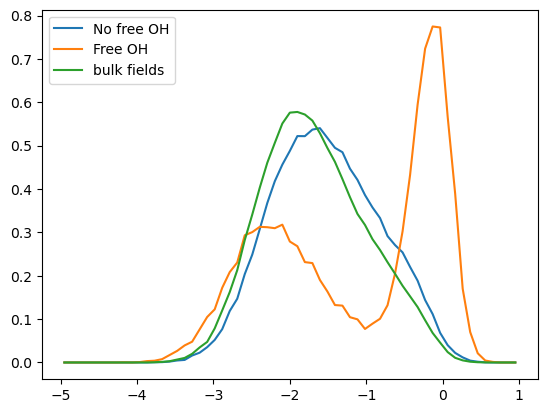

In [5]:


      
    
probfields = compute_fields(vs, vals, allfields)


np.save("amoeba_interface_fields.npy", probfields)

0
1
2
3
4
5
6
7
8
9


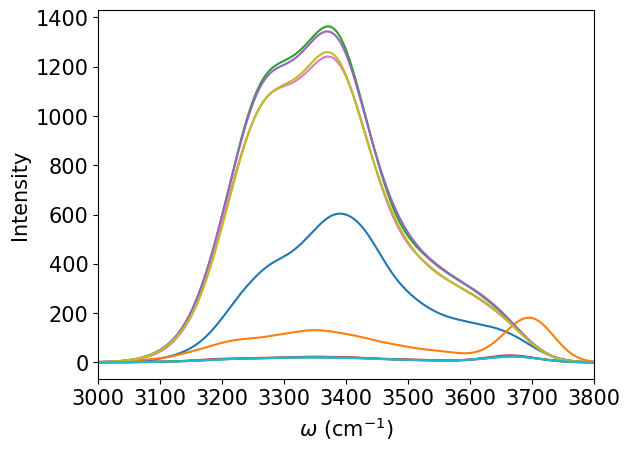

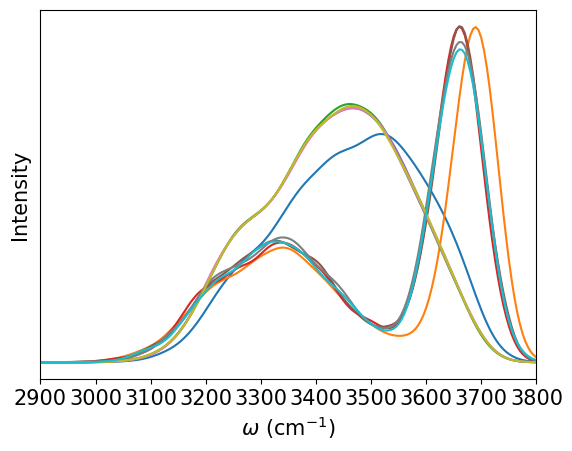

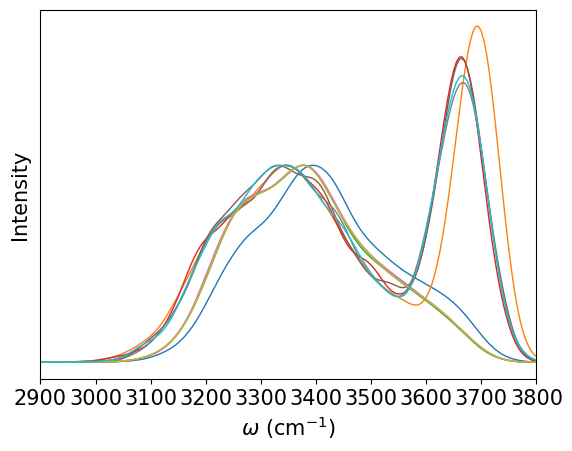

In [6]:
combos = sort_spectra(vs, vals, allfreqs, allacts)

2900.0


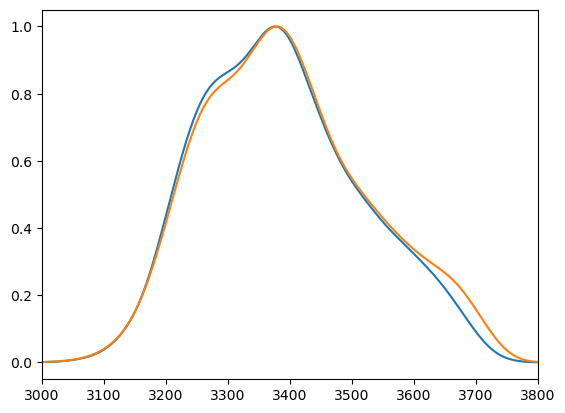

In [7]:

collect = []

collect.append(combos[0][0])

for i in range(3):
    collect.append(combos[2*i][3] + combos[2*i+1][3])# Spectra by distance


collect.append(combos[6][3] + combos[7][3] + combos[8][3] + combos[9][3]) #Bulk
collect.append(1*combos[0][3] + 
               1*combos[1][3] + 
               combos[2][3] + 
               combos[3][3] + 
               1*combos[4][3] + 
               1*combos[5][3])#Interface


collect = np.array(collect)

plt.xlim(3000, 3800)
collect[1:] = (collect[1:].T / np.sum(collect[1:, 300:], axis=1)).T
print(collect[0][400])


for i in range(4, 6):
    plt.plot(collect[0], collect[i]/np.max(collect[i]))
    

np.save('amoeba_spectra_by_distance.npy', collect)




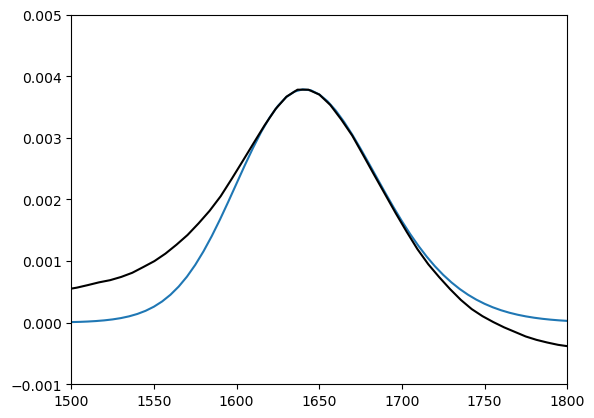

In [8]:
# Bend spectra
arrH2O = np.load("../ramans/H2O_Raman.npy")

aniso = []

aniso.append(combos[0][0])

aniso.append(combos[6][2] + combos[7][2] + combos[8][2] + combos[9][2])
aniso = np.array(aniso)
aniso[1] = aniso[1] / np.sum(aniso[1][300:])

plt.plot(aniso[0],aniso[1])

plt.xlim(1500, 1800)
plt.plot(arrH2O[:,0], (arrH2O[:,7] - 1.2e-5)*2.05e2, c='black')

plt.ylim(-0.001, 0.005)

np.save("amoeba_param.npy", aniso)

[1.49873811e-03 1.36289582e-02 5.88773426e-03 3.23007918e+03
 3.38627179e+03 3.66921112e+03 4.98778610e+01 1.68715738e+02
 7.87073383e+01]
Free OH peak area = 0.16331086647144305


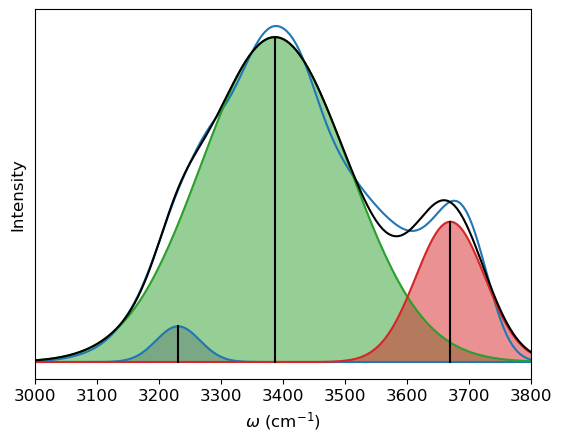

In [9]:
fs = 12
#Spectra of just edge

from scipy.optimize import curve_fit

plt.plot(collect[0], collect[1], c='C0')

curve = lambda freq, h1, h2, h3, f1, f2, f3, w1, w2, w3: (1*h1*np.exp(-((freq - f1)/w1)**2)
                                              + h2*np.exp(-((freq - f2)/w2)**2)
                                              + h3*np.exp(-((freq - f3)/w3)**2))



plt.xlim(3000, 3800)

param, cov = curve_fit(curve, collect[0][300:], collect[1][300:], maxfev= 10000, p0 = [0.000, 0.01, 0.005,
                                                    3200, 3400, 3600, 
                                                    20, 150, 50])




print(param)
xx = collect[0]
alterparam = np.copy(param)
alterparam[1:3] = 0
yy = curve(xx, *alterparam)

plt.plot(xx, yy)
plt.fill_between(xx, yy, 0, color='C4', alpha = 0.5)
yy2 = np.copy(yy)

alterparam = np.copy(param)
alterparam[[0, 2]] = 0
yy = curve(xx, *alterparam)

yy1 = np.copy(yy)
plt.plot(xx, yy, c='C2')
plt.fill_between(xx, yy, 0, color='C2', alpha = 0.5)


alterparam = np.copy(param)
alterparam[:2] = 0
yy = curve(xx, *alterparam)

plt.plot(xx, yy, c='C3')
plt.fill_between(xx, yy, 0, color='C3', alpha = 0.5)


plt.xlabel('$\omega$ (cm$^{-1}$)', size=fs)
plt.ylabel('Intensity', size=fs)
plt.xticks(size=fs)
plt.yticks([], size=fs)
plt.plot(xx, yy1 + yy2 + yy, c='black')

plt.plot([param[4]]*2, [0, np.max(yy1)], c='black')
plt.plot([param[5]]*2, [0, np.max(yy)], c='black')
plt.plot([param[3]]*2, [0, np.max(yy2)], c='black')


peak_areas = []

for i in range(3):
    peak_areas.append(param[i]*np.abs(param[6+i]))
    
peak_areas = np.array(peak_areas)
print("Free OH peak area =", peak_areas[2] / (peak_areas[0] + peak_areas[1] + peak_areas[2]))


np.save('amoeba2A_param.npy', param)
np.save("amoeba2A.npy", np.array([collect[0], collect[1]]))






2400.0
0.9999999999999999 0.9999999999999999


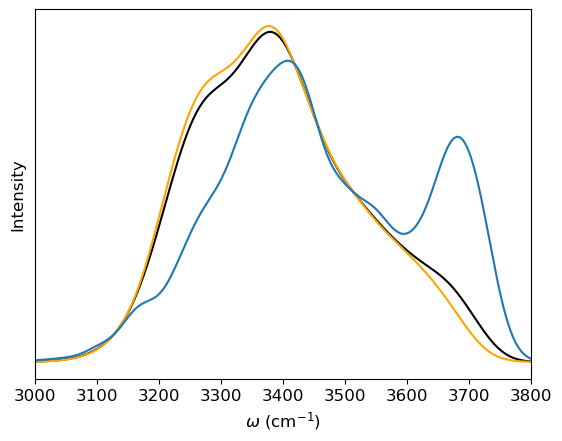

In [10]:
# SC spectra 
    
plt.plot(collect[0], collect[5], c='black') # Interface
plt.plot(collect[0], collect[4], c='orange') #Bulk


xs = 0.88 #amount subtracted
sc = (collect[5] - xs*collect[4]) /(1-xs)
plt.plot(collect[0], sc)
plt.xlim(3000, 3800)



plt.xlabel('$\omega$ (cm$^{-1}$)', size=fs)
plt.ylabel('Intensity', size=fs)
plt.xticks(size=fs)
plt.yticks([], size=fs)


noshift_spectra = np.array([collect[0], collect[4], collect[5], sc])

np.save("amoeba_no_shiftspectra", noshift_spectra)
print(collect[0][300])

print(np.sum(collect[5][300:]), np.sum(collect[4][300:]))

[0.00000000e+00 1.27737555e-02 9.34670273e-03 3.20000000e+03
 3.40028505e+03 3.68042907e+03 2.00000000e+01 1.71451010e+02
 6.72652036e+01]
1.5485763135829098
0.08837948385737812
Free OH peak area = 0.22304245432954736
# of waters with a free OH = 0.4460849086590947


/Users/alacour/miniconda3/envs/open/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


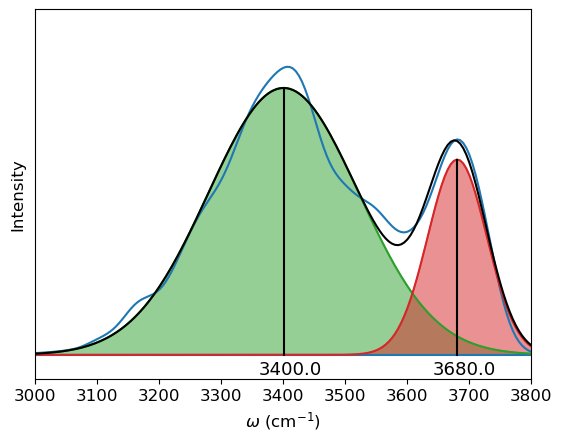

In [11]:
#Fitting SC spectra

from scipy.optimize import curve_fit

plt.plot(collect[0], sc, c='C0')

curve = lambda freq, h1, h2, h3, f1, f2, f3, w1, w2, w3: (0*h1*np.exp(-((freq - f1)/w1)**2)
                                              + h2*np.exp(-((freq - f2)/w2)**2)
                                              + h3*np.exp(-((freq - f3)/w3)**2))



plt.xlim(3000, 3800)

param, cov = curve_fit(curve, collect[0][300:], sc[300:],  maxfev= 10000, p0 = [0.000, 0.01, 0.005,
                                                    3200, 3400, 3600, 
                                                    20, 150, 50])





print(param)
xx = collect[0]
alterparam = np.copy(param)
alterparam[1:3] = 0
yy = curve(xx, *alterparam)

plt.plot(xx, yy)
plt.fill_between(xx, yy, 0, color='C4', alpha = 0.5)
yy2 = np.copy(yy)

alterparam = np.copy(param)
alterparam[[0, 2]] = 0
yy = curve(xx, *alterparam)

yy1 = np.copy(yy)
plt.plot(xx, yy, c='C2')
plt.fill_between(xx, yy, 0, color='C2', alpha = 0.5)


alterparam = np.copy(param)
alterparam[:2] = 0
yy = curve(xx, *alterparam)

plt.plot(xx, yy, c='C3')

plt.fill_between(xx, yy, 0, color='C3', alpha = 0.5)


plt.xlabel('$\omega$ (cm$^{-1}$)', size=fs)
plt.ylabel('Intensity', size=fs)
plt.xticks(size=fs)
plt.yticks([], size=fs)
plt.plot(xx, yy1 + yy2 + yy, c='black')

plt.plot([param[4]]*2, [0, np.max(yy1)], c='black')
plt.plot([param[5]]*2, [0, np.max(yy)], c='black')
plt.plot([param[3]]*2, [0, np.max(yy2)], c='black')


plt.text(param[4]-40, -np.max(sc)/15, str(np.round(param[4])), fontsize=13)
plt.text(param[5]-40, -np.max(sc)/15, str(np.round(param[5])), fontsize=13)
#plt.text(param[3]-40, -np.max(sc)/15, str(np.round(param[3])), fontsize=13)



plt.ylim(-np.max(sc)/12, np.max(sc)*1.2)
print(np.sum(np.abs(sc - np.average(sc))))
print(np.sum(np.abs(sc - yy - yy1 - yy2)))

peak_areas = []

for i in range(3):
    peak_areas.append(param[i]*np.abs(param[6+i]))
    
peak_areas = np.array(peak_areas)
first_param = np.copy(param)

np.save('amoeba_noshift_sc_param.npy', param)
np.save("amoeba_noshift_sc.npy", np.array([collect[0], sc]))

print("Free OH peak area =", peak_areas[2] / (peak_areas[1] + peak_areas[2]))
print("# of waters with a free OH =", 2*peak_areas[2] / (peak_areas[0] + peak_areas[1] + peak_areas[2]))





In [12]:
projs = [
         '../ramans/amoeba/edgedoubles',
         '../ramans/amoeba/edgeones925',
         '../ramans/amoeba/centerdoubles',
         '../ramans/amoeba/centerones925']

vals, allacts, allfreqs, allfields, alleig = load_data(projs)

../ramans/amoeba/edgedoubles 00150512cd135b9f23469dbb652fa4fb 1230 6
a
0 6
../ramans/amoeba/edgedoubles 001b411013226d4d49e9ad18c5eb835c 265 6
a
0 6
../ramans/amoeba/edgedoubles 0020104fa0a96f6a25856b864447385e 1745 2
a
0 2
../ramans/amoeba/edgedoubles 0071e04a4705214ae45a2370d633aeee 355 -2
a
0 -2
../ramans/amoeba/edgedoubles 007a125e7c950649f3698b12b5b5304f 1635 -2
a
0 -2
../ramans/amoeba/edgedoubles 00a10ce5361d456d60f6f9526032299c 980 6
a
0 6
../ramans/amoeba/edgedoubles 00a4a992265983fabfca52dadbb1feb2 1275 2
a
0 2
../ramans/amoeba/edgedoubles 00f3414060eb4a72a8d88083c6c30456 525 -2
a
0 -2
../ramans/amoeba/edgedoubles 01388a4e594112a3ba423f4ac7755409 1005 2
a
0 2
../ramans/amoeba/edgedoubles 01644ba491409ffc5537281569ef773f 1465 2
a
0 2
../ramans/amoeba/edgedoubles 018d639caf0df5f1fbaaef909c1b7f98 675 -2
a
0 -2
../ramans/amoeba/edgedoubles 019c97ccd755d6a30f97b169904b4c07 260 2
a
0 2
../ramans/amoeba/edgedoubles 01cef57e3292fa28af0972e91b039cbe 665 6
a
0 6
../ramans/amoeba/edgedou

0 -2
../ramans/amoeba/edgedoubles 19663b481499a73176be5e5cca286970 605 6
a
0 6
../ramans/amoeba/edgedoubles 19f4aed3926583cb029e1f3b3e130729 1150 2
a
0 2
../ramans/amoeba/edgedoubles 1a0e76b4c2f253cd42980c57da429e83 1110 -2
a
0 -2
../ramans/amoeba/edgedoubles 1a95e6d4465de97f9fc1646452b651e8 530 2
a
0 2
../ramans/amoeba/edgedoubles 1b72798ab4da2fabec65fd64fc08a2ab 1445 2
a
0 2
../ramans/amoeba/edgedoubles 1c32d182169ea5e5f55d325debac965d 1195 -2
a
0 -2
../ramans/amoeba/edgedoubles 1c7370f3845e81493f80948c41c71413 1315 -2
a
0 -2
../ramans/amoeba/edgedoubles 1c9d6cc0f4c6b5db5cc2cbd059191ab8 580 6
a
0 6
../ramans/amoeba/edgedoubles 1d0bad516ca3e104f609a547c007cc9d 595 -2
a
0 -2
../ramans/amoeba/edgedoubles 1d0e3b66ab1f9158e6d9380e6e6af59f 10 6
a
0 6
../ramans/amoeba/edgedoubles 1d63082b5247687e0620701d6a278f98 1420 2
a
0 2
../ramans/amoeba/edgedoubles 1e231294aeed50f1e89d8a4d915c3785 705 -2
a
0 -2
../ramans/amoeba/edgedoubles 1e4553214acf36ababe95aaba2bd152a 1785 2
a
0 2
../ramans/amoeba/

0 6
../ramans/amoeba/edgedoubles 318aea35728ed27f066a9885f432cc40 670 2
a
0 2
../ramans/amoeba/edgedoubles 31972380f8cac3b3a4dabcd4941b6bdc 520 6
a
0 6
../ramans/amoeba/edgedoubles 31dcffcd23eebd8103497e68d3fabba2 885 -2
a
0 -2
../ramans/amoeba/edgedoubles 329a2260bebed4c5b67e9545ce7fc104 1180 -2
a
0 -2
../ramans/amoeba/edgedoubles 32bdfda0860c3262942451f0152199ec 1155 -2
a
0 -2
../ramans/amoeba/edgedoubles 330d646091166590b7631b0a85fc2aff 865 6
a
0 6
../ramans/amoeba/edgedoubles 332a43d66d6678f70c904e4e7741c56c 1025 2
a
0 2
../ramans/amoeba/edgedoubles 3356d2a41ef8e798a0ce81b4d8217c98 900 2
a
0 2
../ramans/amoeba/edgedoubles 336c94fdb1b474957b53809179200c7b 1350 6
a
0 6
../ramans/amoeba/edgedoubles 33beb94a30e206364afb5d03359b3067 1495 -2
a
0 -2
../ramans/amoeba/edgedoubles 33c5c8cee8478997017eea91f4ba6ab6 1470 6
a
0 6
../ramans/amoeba/edgedoubles 34305522eddbcaa65d73500d115bd71e 1625 6
a
0 6
../ramans/amoeba/edgedoubles 34757eb37a31a1552d2713de18eddef4 1895 6
a
0 6
../ramans/amoeba/e

0 6
../ramans/amoeba/edgedoubles 47b5271ab8b72badf34f2e3fe01e24a6 1960 6
a
0 6
../ramans/amoeba/edgedoubles 47d7a4ca4c7ee56af3a8131e5766694c 350 -2
a
0 -2
../ramans/amoeba/edgedoubles 48d986be6fd19d43b1ee3c297cb8836b 1435 2
a
0 2
../ramans/amoeba/edgedoubles 48de65a6c8455877b70b95a1211ebabc 110 6
a
0 6
../ramans/amoeba/edgedoubles 48ecff8e877afac0cdad6cd88e773568 465 2
a
0 2
../ramans/amoeba/edgedoubles 4927fb54de42cf8c28bd6d8b9cbcf8fe 910 6
a
0 6
../ramans/amoeba/edgedoubles 494dd0e616789e88f6f5c604206defa2 220 2
a
0 2
../ramans/amoeba/edgedoubles 495402f62eab3084ac0452abe491220c 1615 6
a
0 6
../ramans/amoeba/edgedoubles 49ef8dee7a674baa209e29dc29f1786c 185 -2
a
0 -2
../ramans/amoeba/edgedoubles 4a0723aaf5aff3ae411fa541a2ae5467 1060 2
a
0 2
../ramans/amoeba/edgedoubles 4b1ca681f4d6bcc3a7fb739874d722c1 1660 6
a
0 6
../ramans/amoeba/edgedoubles 4b4977c9206c96bd7ba1e8406bdb8c94 1800 6
a
0 6
../ramans/amoeba/edgedoubles 4b6b3dbd7e9c950cd86bd1a88d2a86ab 1615 -2
a
0 -2
../ramans/amoeba/edge

0 -2
../ramans/amoeba/edgedoubles 62df18147a9dfeb5f9b74e8e3c0d1e80 1075 -2
a
0 -2
../ramans/amoeba/edgedoubles 62df93aacd8b7ed4ee6dfe8ded275f94 1840 6
a
0 6
../ramans/amoeba/edgedoubles 630b3b04611c4dafbee210e6b0fb735d 1340 2
a
0 2
../ramans/amoeba/edgedoubles 6326d265681211477923e3712c4a2756 705 2
a
0 2
../ramans/amoeba/edgedoubles 63448906ebfb6c95ddf36793f638a0b5 1875 2
a
0 2
../ramans/amoeba/edgedoubles 6399b0e405a6de0ce5385b84e7b773d3 875 -2
a
0 -2
../ramans/amoeba/edgedoubles 63b06456e4f0c3778bb50d0809c9d3c3 815 6
a
0 6
../ramans/amoeba/edgedoubles 642348371e42ca2ac437cd1373b2ecca 645 2
a
0 2
../ramans/amoeba/edgedoubles 643405c955655ef2eab7bd8b4530f7f8 1130 6
a
0 6
../ramans/amoeba/edgedoubles 64533acd53213857e0857f33fbfcec95 790 -2
a
0 -2
../ramans/amoeba/edgedoubles 646edbf6e47c6e8617fce1f03e6c684c 330 6
a
0 6
../ramans/amoeba/edgedoubles 648087d8125c1ba76736cd7195443e9c 1760 6
a
0 6
../ramans/amoeba/edgedoubles 649e3c29bcba6881a91f7b65aeb3b85a 860 -2
a
0 -2
../ramans/amoeba/ed

0 6
../ramans/amoeba/edgedoubles 78bb8662fe70f2fe3e42260acee2e6ee 370 2
a
0 2
../ramans/amoeba/edgedoubles 7904ac9276854e9e874be39d1c22bbc6 1580 2
a
0 2
../ramans/amoeba/edgedoubles 795ee4607899bbed7d690b9ce7675bac 1295 -2
a
0 -2
../ramans/amoeba/edgedoubles 79c59543a93e8756269530384aeec9a2 580 -2
a
0 -2
../ramans/amoeba/edgedoubles 79f8049477b11a06c63ac7fda7907537 1120 6
a
0 6
../ramans/amoeba/edgedoubles 7a091fe8e95db830310c1c0640971832 305 6
a
0 6
../ramans/amoeba/edgedoubles 7a4e338b182dbd2aef5cb83de152590b 1430 -2
a
0 -2
../ramans/amoeba/edgedoubles 7a999c97fd4808da13edc32d14ea1ae5 905 6
a
0 6
../ramans/amoeba/edgedoubles 7ab0b76ece47ffe7c2be70941fb458df 1435 6
a
0 6
../ramans/amoeba/edgedoubles 7ab25b29596aee9d5ae6021f97d5522b 1260 2
a
0 2
../ramans/amoeba/edgedoubles 7abe12e0ba8aacbe46c9e39f0b2a6de6 750 6
a
0 6
../ramans/amoeba/edgedoubles 7b026429a718d9769b0f3872e3ebf498 1475 -2
a
0 -2
../ramans/amoeba/edgedoubles 7b06058dbc7a21c3233a6997908cb193 655 -2
a
0 -2
../ramans/amoeba/

../ramans/amoeba/edgedoubles 908158f801cf6c85605dfbbcd5bf78a8 1775 -2
a
0 -2
../ramans/amoeba/edgedoubles 909451f32a1ecba78731d4695b686af4 1460 2
a
0 2
../ramans/amoeba/edgedoubles 9102bbf1776a277259dd9db5b271e438 390 -2
a
0 -2
../ramans/amoeba/edgedoubles 911bec9dea6cd64805beddbf667348ec 995 -2
a
0 -2
../ramans/amoeba/edgedoubles 912cd1886fda73d111b62a8394dadcfe 0 -2
a
0 -2
../ramans/amoeba/edgedoubles 91ce2383d62a2d6480fdb198bf3f7760 1665 2
a
0 2
../ramans/amoeba/edgedoubles 9207e92a6f688e02d41f6a847ac712ec 1460 6
a
0 6
../ramans/amoeba/edgedoubles 92313492315128c573509e584f815ece 1120 -2
a
0 -2
../ramans/amoeba/edgedoubles 924db57d2112f50c57f087996c5aee86 1210 2
a
0 2
../ramans/amoeba/edgedoubles 927e2b338af21f6cdac5b36e5ece7f59 330 2
a
0 2
../ramans/amoeba/edgedoubles 92886f18932094642001d7aaf16f5983 1740 6
a
0 6
../ramans/amoeba/edgedoubles 929298c3c47235580f0af5c64f6264fa 1280 -2
a
0 -2
../ramans/amoeba/edgedoubles 92b1868bb1dc4857cba0cb76769e1abe 1410 -2
a
0 -2
../ramans/amoeba/

0 6
../ramans/amoeba/edgedoubles a78e900fec82cd66d53632704d1ad6e9 120 6
a
0 6
../ramans/amoeba/edgedoubles a7a2aae6c9d2f4c49af01532484292b6 70 6
a
0 6
../ramans/amoeba/edgedoubles a7ae913cc5fd5c099bdf58484187da86 995 2
a
0 2
../ramans/amoeba/edgedoubles a80d7d4e33f4d9414ae4b27d7ab91342 185 2
a
0 2
../ramans/amoeba/edgedoubles a894e36866c60ff27a941ac04f3885ca 1730 -2
a
0 -2
../ramans/amoeba/edgedoubles a8a90dd7f369115d25c2ac5d7e1f5f3b 880 -2
a
0 -2
../ramans/amoeba/edgedoubles aa4e761421cf5eed0b154598bf9c355c 565 2
a
0 2
../ramans/amoeba/edgedoubles aa6cb661084b8d6bec76b2518334a634 310 6
a
0 6
../ramans/amoeba/edgedoubles aa72314fd309885cffc542f52093f022 805 -2
a
0 -2
../ramans/amoeba/edgedoubles ab298f25839166e4d0ebef403d0a7e67 1845 2
a
0 2
../ramans/amoeba/edgedoubles abc5a1ce231cda45c7d4a8c9ac457e1c 1055 6
a
0 6
../ramans/amoeba/edgedoubles ac469657f01b01950a594b69ecb65d66 895 2
a
0 2
../ramans/amoeba/edgedoubles ac496d910095071bf6b6f95d2455ac81 190 6
a
0 6
../ramans/amoeba/edgedoubl

0 -2
../ramans/amoeba/edgedoubles c0303ac5d0f11fc6143ec2666df50601 295 -2
a
0 -2
../ramans/amoeba/edgedoubles c0669dd92795f892d260c98547a84fdc 945 -2
a
0 -2
../ramans/amoeba/edgedoubles c07abf0fa1f96355e23f021c213a0ceb 1380 -2
a
0 -2
../ramans/amoeba/edgedoubles c0a45900a3abfa596ee79e24ba95feaa 1725 -2
a
0 -2
../ramans/amoeba/edgedoubles c0baf672b391df1f992865879b4329b3 1745 -2
a
0 -2
../ramans/amoeba/edgedoubles c0dc3af79f0273da6c0d64c042af285c 1450 2
a
0 2
../ramans/amoeba/edgedoubles c0e4a269eec79cb224462cc9e8361c9c 20 -2
a
0 -2
../ramans/amoeba/edgedoubles c108a6e03175c90653041079821d5fd2 1555 -2
a
0 -2
../ramans/amoeba/edgedoubles c11793fddfe3b826705588323827ad1d 1300 -2
a
0 -2
../ramans/amoeba/edgedoubles c15096ba42a8c0b5cbbe6140a457f241 1635 6
a
0 6
../ramans/amoeba/edgedoubles c155754fcb7e55af08e8e4ae491371bf 935 -2
a
0 -2
../ramans/amoeba/edgedoubles c1ca16daf10938fc0d016f37d8fc785b 1230 -2
a
0 -2
../ramans/amoeba/edgedoubles c1efaa8596ec7e2cb7985dc4f201c9ba 1475 2
a
0 2
../ra

0 6
../ramans/amoeba/edgedoubles d6aa42c0b8b842d9b7c4d47bbef5d244 1515 6
a
0 6
../ramans/amoeba/edgedoubles d7b43c7b12a98ce801d2599daadf3f77 265 -2
a
0 -2
../ramans/amoeba/edgedoubles d7bef94934ccd4d1cca07f9b3c391c64 1815 2
a
0 2
../ramans/amoeba/edgedoubles d7f5658e0d20977ec369384df3a0d973 840 2
a
0 2
../ramans/amoeba/edgedoubles d80e85c4996bfb9ec619c7b1aa66ade7 1635 2
a
0 2
../ramans/amoeba/edgedoubles d825690a3fc71dedf4a33fefd86d2e34 525 2
a
0 2
../ramans/amoeba/edgedoubles d841fa5401040caa7aace5611de8f86d 1015 -2
a
0 -2
../ramans/amoeba/edgedoubles d88629dccf914b1341fc407c2ffde14d 230 -2
a
0 -2
../ramans/amoeba/edgedoubles d8d6e269c22d04c5bb25a89d3919690a 395 -2
a
0 -2
../ramans/amoeba/edgedoubles d98eae0bdd9b159f4ef6935b04c389cc 1860 2
a
0 2
../ramans/amoeba/edgedoubles da3b1213c156698da84e047e67e33606 1360 6
a
0 6
../ramans/amoeba/edgedoubles da5573ea9b2cc5f716b7318360389366 765 2
a
0 2
../ramans/amoeba/edgedoubles da7655accf730bdb2dfa6421e3399489 1115 6
a
0 6
../ramans/amoeba/ed

0 6
../ramans/amoeba/edgedoubles f358e6353041c5fbb03df36ca10e3bc2 810 2
a
0 2
../ramans/amoeba/edgedoubles f367a505d88b777324d1572d89d22175 1690 2
a
0 2
../ramans/amoeba/edgedoubles f385828389446ba411535b4cd34c593c 1630 -2
a
0 -2
../ramans/amoeba/edgedoubles f38c21ac397ad7f117fe843feb036008 1755 -2
a
0 -2
../ramans/amoeba/edgedoubles f3d7a2b2d2bd50a6b99f5705d99965a4 1400 6
a
0 6
../ramans/amoeba/edgedoubles f3e53e217b0cca497002cf9ea433f1a7 1060 6
a
0 6
../ramans/amoeba/edgedoubles f3ed0fc0068eda150d1c9e43ef34c27e 125 -2
a
0 -2
../ramans/amoeba/edgedoubles f474eafe1810e334b618d37f27707832 1105 -2
a
0 -2
../ramans/amoeba/edgedoubles f48f5d4b51ceead0c961ebde42aaba0c 1780 6
a
0 6
../ramans/amoeba/edgedoubles f499c566621e9438de0c848b2a429893 1135 2
a
0 2
../ramans/amoeba/edgedoubles f4e5319b78d1c00d24fb1c8e06f69773 975 6
a
0 6
../ramans/amoeba/edgedoubles f50f2adb918df2022474f08f856c9528 1150 -2
a
0 -2
../ramans/amoeba/edgedoubles f518042c1e88a2c2a94220dcbeceb132 1200 6
a
0 6
../ramans/amoe

1 106
../ramans/amoeba/edgeones925 086959922e03ea9b0838e89221c0f18f 1440 6
a
1 106
../ramans/amoeba/edgeones925 08ad0399a99ad08e05b274a386427437 1795 2
a
1 102
../ramans/amoeba/edgeones925 08b14f3a16a6d5c947b514273c6d7f47 1315 2
a
1 102
../ramans/amoeba/edgeones925 08caac4931b94e4e86af7a18dfdbbda0 1025 6
a
1 106
../ramans/amoeba/edgeones925 08fbb633c7931199d131a095da5fdba8 1495 6
a
1 106
../ramans/amoeba/edgeones925 0912b9f1a9c7acacac560499fe78a2f3 725 -2
a
1 98
../ramans/amoeba/edgeones925 09aec858844834eb3bc921e935e69e53 680 2
a
1 102
../ramans/amoeba/edgeones925 0a1fad71ee9327da261bf56033d57399 1680 6
a
1 106
../ramans/amoeba/edgeones925 0a405e65a3c122d5da3a641a4db758df 1770 -2
a
1 98
../ramans/amoeba/edgeones925 0a626d435aea3fed82145b8372111b13 1005 -2
a
1 98
../ramans/amoeba/edgeones925 0a97602d48dfae3cae518f93279513e5 1575 -2
a
1 98
../ramans/amoeba/edgeones925 0a9dead3ed23ebd366eb65abd54ce9bf 1530 -2
a
1 98
../ramans/amoeba/edgeones925 0ac9e8b1b0ee2a19f30df246378b3f43 905 2
a
1 

../ramans/amoeba/edgeones925 249c6afbefb5d94803f3229f22b68b5d 1760 2
a
1 102
../ramans/amoeba/edgeones925 24cc3656b166abd58f6bab1f5a52f588 405 -2
a
1 98
../ramans/amoeba/edgeones925 252372456f3a1e43253b4c19d69d7f35 1290 -2
a
1 98
../ramans/amoeba/edgeones925 2564d7690a2041b9fc16bc6c71fdf938 1340 -2
a
1 98
../ramans/amoeba/edgeones925 25665cefbfad6804c4eca78ab346a130 755 6
a
1 106
../ramans/amoeba/edgeones925 2579b2983131a55d0835600c6597cf59 780 2
a
1 102
../ramans/amoeba/edgeones925 25cb69a16c88cb1ed6dc54e9bb01ed8f 535 -2
a
1 98
../ramans/amoeba/edgeones925 2610bf0eaa00dd54328114c804d5f041 530 6
a
1 106
../ramans/amoeba/edgeones925 261588bcc271d8b8c9f532f8bf5f7e54 925 6
a
1 106
../ramans/amoeba/edgeones925 2648bc7f1fe6aca15c1351c1cbd74ee7 1030 6
a
1 106
../ramans/amoeba/edgeones925 268a2cb7c7d01ed1484c6898c554e37f 765 -2
a
1 98
../ramans/amoeba/edgeones925 26943dc1929ee7476c1a9c44f6a2080a 785 -2
a
1 98
../ramans/amoeba/edgeones925 26a20a93d5cfdef3cb20c07937a61e14 1740 -2
a
1 98
../rama

../ramans/amoeba/edgeones925 3dda1bbb4e6b1d2a1dde4bb4ed037a7f 1455 6
a
1 106
../ramans/amoeba/edgeones925 3ddb785e5d88f3ffbe795ca210dbfa33 1845 6
a
1 106
../ramans/amoeba/edgeones925 3de564462b61072e66047798c61ad190 160 6
a
1 106
../ramans/amoeba/edgeones925 3def658c5df9af68f951f31072e1c621 770 -2
a
1 98
../ramans/amoeba/edgeones925 3e0461f733c8fb9c080acb6e6cab5d4d 1215 2
a
1 102
../ramans/amoeba/edgeones925 3e1ecb0deefdd6736d278710688f5d19 160 -2
a
1 98
../ramans/amoeba/edgeones925 3e540d49d8ab5583e2bc1617da8a94dd 1665 -2
a
1 98
../ramans/amoeba/edgeones925 3ee792f2e8dd50623ab788be1e06de62 1195 2
a
1 102
../ramans/amoeba/edgeones925 3ef436c807222fa4e66edbd9c2100918 1980 2
a
1 102
../ramans/amoeba/edgeones925 3ef79cb07e3dbb6dcc5d06380d3c1ca5 1240 2
a
1 102
../ramans/amoeba/edgeones925 3f521e5a2d426aebca60932583f45d3d 1865 2
a
1 102
../ramans/amoeba/edgeones925 3f703e3f2ad1a21feb4b29888a740666 1595 6
a
1 106
../ramans/amoeba/edgeones925 3f9bf16e77661ec508d9d958bafe3779 1250 -2
a
1 98
..

../ramans/amoeba/edgeones925 540e92b90045e07b04615be17be8f5e9 60 6
a
1 106
../ramans/amoeba/edgeones925 54118ab6d2839e922e79f4399add60d0 285 -2
a
1 98
../ramans/amoeba/edgeones925 542bb64a7554546ca2a69c735399c520 545 2
a
1 102
../ramans/amoeba/edgeones925 54db9c95f3d35d22326be14ba4132b46 1790 6
a
1 106
../ramans/amoeba/edgeones925 54e57d904365e672f7bad6149fdc2bb9 230 2
a
1 102
../ramans/amoeba/edgeones925 551aad17ede4b6ff1184cb887cf960e6 1900 -2
a
1 98
../ramans/amoeba/edgeones925 5524104fb521b30d71c22b780e675795 1415 -2
a
1 98
../ramans/amoeba/edgeones925 557fc39bcd7b1fa40c0d4a0ae811a7d4 195 6
a
1 106
../ramans/amoeba/edgeones925 55aff47ba15bf596b73d600e35ad7d7e 1910 2
a
1 102
../ramans/amoeba/edgeones925 56187c5e6aa3fa5c6ea74eacae4721bc 1540 -2
a
1 98
../ramans/amoeba/edgeones925 5627c298005409ac36a961aece5ea79d 1830 -2
a
1 98
../ramans/amoeba/edgeones925 5672ffe00f3e5f79bc00d4ffdfcf9d11 165 2
a
1 102
../ramans/amoeba/edgeones925 56b58da34c07795a3bbea01e65dcc546 1365 -2
a
1 98
../ram

1 102
../ramans/amoeba/edgeones925 703fe698d26c84e980f53cd31e574e9f 1375 2
a
1 102
../ramans/amoeba/edgeones925 7057bfb7e8e1439a875d750d168693e4 475 2
a
1 102
../ramans/amoeba/edgeones925 717b8748ce3b11877fc8d72b5e65c7ac 1550 6
a
1 106
../ramans/amoeba/edgeones925 719506b5b2103cc42a3dc54f3a548f08 1925 6
a
1 106
../ramans/amoeba/edgeones925 71f86164c7cfaea276e1853b4309e1cd 35 6
a
1 106
../ramans/amoeba/edgeones925 7219d4984022f8c99853e64f77440951 1550 -2
a
1 98
../ramans/amoeba/edgeones925 7258423d71896dbc1928c08d39ae865c 1275 -2
a
1 98
../ramans/amoeba/edgeones925 7262de0b93bc635f3c9c2d4878136e93 1995 6
a
1 106
../ramans/amoeba/edgeones925 7284c0397f7ae674747b22e0b2aaf64b 830 -2
a
1 98
../ramans/amoeba/edgeones925 72ad6969282c7e03c8950e3caa0e9936 820 6
a
1 106
../ramans/amoeba/edgeones925 72eb5da14311c1d9c6bef1782054abba 940 6
a
1 106
../ramans/amoeba/edgeones925 72fe4af073c2e093510cde7de98e8fad 1985 6
a
1 106
../ramans/amoeba/edgeones925 730e3de4e17f35e201c606f3394ea0d0 925 -2
a
1 98


1 106
../ramans/amoeba/edgeones925 882f17172a23210df7f8ea291bfc671e 740 -2
a
1 98
../ramans/amoeba/edgeones925 88434c2ef2311ff6de5ddaac207d007f 265 2
a
1 102
../ramans/amoeba/edgeones925 88d06c65bdf37b90ba061dc32620ff0b 1810 6
a
1 106
../ramans/amoeba/edgeones925 899c0263e0445defea86a3fa474c0b11 115 2
a
1 102
../ramans/amoeba/edgeones925 89f4d42c50eb3048061d6d3eb2b81f07 90 -2
a
1 98
../ramans/amoeba/edgeones925 8a0820cc1e903e9e5cc143cba9df0a31 1010 6
a
1 106
../ramans/amoeba/edgeones925 8a21302f1d8c3877c11d1374be2bc30a 1125 -2
a
1 98
../ramans/amoeba/edgeones925 8a56f95c1cf0746bc1193c3368b46756 320 -2
a
1 98
../ramans/amoeba/edgeones925 8a88a5e44c45f7564b6e63f4692cb934 425 6
a
1 106
../ramans/amoeba/edgeones925 8af6700000d6a5b3a115b1154dd53b26 260 6
a
1 106
../ramans/amoeba/edgeones925 8b057b25e86882111f8081577394ead8 1820 -2
a
1 98
../ramans/amoeba/edgeones925 8b2c744600af9a1ebdc05decc806742a 835 6
a
1 106
../ramans/amoeba/edgeones925 8b8719c32182fb1e58012c35b80abddb 1410 2
a
1 102
..

../ramans/amoeba/edgeones925 a2dc90f1585ef649552b2cc44791ab48 1350 2
a
1 102
../ramans/amoeba/edgeones925 a2eb226a548a6cf45d0200ea7de4152f 610 6
a
1 106
../ramans/amoeba/edgeones925 a30b53eea62e19eb804e95581b51c4a8 1535 2
a
1 102
../ramans/amoeba/edgeones925 a33475bf442e67a47471bf7bd79bf8da 385 -2
a
1 98
../ramans/amoeba/edgeones925 a371469956f16bb3a0499cb5900f0d61 1790 -2
a
1 98
../ramans/amoeba/edgeones925 a3b86402d1588799b26b6b8111305d56 1135 -2
a
1 98
../ramans/amoeba/edgeones925 a3bfff752db790012bdc87094729facb 1810 2
a
1 102
../ramans/amoeba/edgeones925 a3d9fda15fd1c7bf3e9ce22ed49bdf62 320 2
a
1 102
../ramans/amoeba/edgeones925 a483f9baa85bc434b2f4b9387180328f 75 -2
a
1 98
../ramans/amoeba/edgeones925 a5428a482c065c5b04805f472ef74456 1305 6
a
1 106
../ramans/amoeba/edgeones925 a554710ffb2ec23fc74d6d9b47477318 485 2
a
1 102
../ramans/amoeba/edgeones925 a56ce2aa78b3747b183e91c7b5324d92 570 6
a
1 106
../ramans/amoeba/edgeones925 a581014482653dce40a6c497c4951bc3 1410 6
a
1 106
../ram

../ramans/amoeba/edgeones925 ba54eeec5c2e69892422308596dd279f 1095 -2
a
1 98
../ramans/amoeba/edgeones925 ba96a699d5269aae370901b1d573daeb 270 6
a
1 106
../ramans/amoeba/edgeones925 baea3a582914b1c439808c607372236a 200 -2
a
1 98
../ramans/amoeba/edgeones925 bb61bb2f02d03fd7690e1124a6657757 95 -2
a
1 98
../ramans/amoeba/edgeones925 bb84c071dce73b0190b356862e5cceef 1175 2
a
1 102
../ramans/amoeba/edgeones925 bbdc542d2adc73e52542fe69f87d3cab 1055 2
a
1 102
../ramans/amoeba/edgeones925 bc0f8296de34909cd6ac35af94e9e93f 690 -2
a
1 98
../ramans/amoeba/edgeones925 bc156bc1845fac6ec3c4d4b1b651717a 80 2
a
1 102
../ramans/amoeba/edgeones925 bc30bf207e15a6e218cf6984524cd0f7 615 -2
a
1 98
../ramans/amoeba/edgeones925 bc530649c4a70b5cf5cd1cb3777f1ce1 1750 2
a
1 102
../ramans/amoeba/edgeones925 bc7c11425e144890f089e6986cbca9e1 1645 -2
a
1 98
../ramans/amoeba/edgeones925 bc9b08dc900517570d3600c8b80b37c1 55 6
a
1 106
../ramans/amoeba/edgeones925 bc9e6bec71bbc0f24ad78e1384c9abc4 1520 6
a
1 106
../ramans

../ramans/amoeba/edgeones925 d3942a627bce622c56382a08ee107acb 370 6
a
1 106
../ramans/amoeba/edgeones925 d3a53cc81fe4aaa77545f105f911b54b 915 -2
a
1 98
../ramans/amoeba/edgeones925 d3b8e8f5eeb806cf442d565741dcf9e1 1690 6
a
1 106
../ramans/amoeba/edgeones925 d3e97f69c8dd1b22c8052007881841db 420 6
a
1 106
../ramans/amoeba/edgeones925 d40d7e3406bda1251e6c90b757391105 1485 6
a
1 106
../ramans/amoeba/edgeones925 d457b3e4ada8bc54d4ee770ae70e681c 1735 2
a
1 102
../ramans/amoeba/edgeones925 d513aba202a73781fd551163d5171d0f 685 6
a
1 106
../ramans/amoeba/edgeones925 d5297d52dffbdb81e5f79ecb2c3c8199 1450 6
a
1 106
../ramans/amoeba/edgeones925 d5477bcd31c049cb95627ab117cc2b73 240 6
a
1 106
../ramans/amoeba/edgeones925 d551badc29a062691d231be77c061d92 510 6
a
1 106
../ramans/amoeba/edgeones925 d5d73ea40da7de8d74ed047ee75711bc 1570 -2
a
1 98
../ramans/amoeba/edgeones925 d5f87cba17a95bce1716d2aec324c3ea 690 2
a
1 102
../ramans/amoeba/edgeones925 d612cafd6aa7eb68dafa3ac8a6f96fc6 375 2
a
1 102
../rama

../ramans/amoeba/edgeones925 f0053310c12c0f24c9579919381e7b7a 1430 2
a
1 102
../ramans/amoeba/edgeones925 f03dc58f4be58a01c4ff1ce3ff1f6fd9 835 2
a
1 102
../ramans/amoeba/edgeones925 f04d811cf0caad882c0108bb9f88680a 1330 6
a
1 106
../ramans/amoeba/edgeones925 f059b355892d7c0bb010d51763fe8177 1390 6
a
1 106
../ramans/amoeba/edgeones925 f0aa8e3a7b58818cfd9e8266961e888b 635 -2
a
1 98
../ramans/amoeba/edgeones925 f0bde0b7ab75a11c842ad99f6be424c6 460 6
a
1 106
../ramans/amoeba/edgeones925 f109decca5dd0d68a1c751bde92a1466 1660 2
a
1 102
../ramans/amoeba/edgeones925 f12e394fef421508a49f657fb3cc12da 940 -2
a
1 98
../ramans/amoeba/edgeones925 f1ab9e82df693a2608f8aa865805bc7c 1905 6
a
1 106
../ramans/amoeba/edgeones925 f1b368dd2f1d90def3bb75314db60f8b 430 2
a
1 102
../ramans/amoeba/edgeones925 f1ba8812d967d751ee36bd9a398113c3 1810 -2
a
1 98
../ramans/amoeba/edgeones925 f1d6169353930a0afea8ba13ee6430be 170 -2
a
1 98
../ramans/amoeba/edgeones925 f24a0ca2fb6fb3c0de0d02ff6d4b9914 1590 6
a
1 106
../ra

2 200
../ramans/amoeba/centerdoubles 07330bbfc5e6d8571a0e668a1579a04f 1060 0
a
2 200
../ramans/amoeba/centerdoubles 074c9ff67936434927e3024c4311b722 655 -4
a
2 196
../ramans/amoeba/centerdoubles 080cb3de0e527507f57ddd39ba21c982 1495 0
a
2 200
../ramans/amoeba/centerdoubles 085d6b6d2aac5dc5b77c514daf79f1ec 1280 0
a
2 200
../ramans/amoeba/centerdoubles 09043ae7ea59cc4e32451674e91ab615 1380 0
a
2 200
../ramans/amoeba/centerdoubles 09aae0c05172b29041d61715ac800810 705 -4
a
2 196
../ramans/amoeba/centerdoubles 09acea0ff27db7a567ff36f4be8873b5 1500 0
a
2 200
../ramans/amoeba/centerdoubles 09b5adef176753421968c3ac29ad7a8a 35 -4
a
2 196
../ramans/amoeba/centerdoubles 0a09ad70234e8da3427f78e2328343fc 40 -4
a
2 196
../ramans/amoeba/centerdoubles 0a8d331ba97d1c974663d93a3bff63c5 1470 -4
a
2 196
../ramans/amoeba/centerdoubles 0b26e82f13f43129b7c051f23b02aabc 1590 -4
a
2 196
../ramans/amoeba/centerdoubles 0b6256f62e0dc12c777097002f8f826b 265 0
a
2 200
../ramans/amoeba/centerdoubles 0b69a9af4de54926

../ramans/amoeba/centerdoubles 26d3751dea78270438c20e2acb83cacc 1075 0
a
2 200
../ramans/amoeba/centerdoubles 271aad48a5c41ac3095b75210d791ad7 660 -4
a
2 196
../ramans/amoeba/centerdoubles 2742e396dbe4cf04bf2a42b78849a979 1610 -4
a
2 196
../ramans/amoeba/centerdoubles 27b970c21398086333895ddf7af60869 1315 -4
a
2 196
../ramans/amoeba/centerdoubles 27fc0bd8c0f55c4208a5e58f5cb73a4e 1410 0
a
2 200
../ramans/amoeba/centerdoubles 28162c79515b830943557479018d97f2 990 0
a
2 200
../ramans/amoeba/centerdoubles 2826713f8de96fe504caa4fe3d9840d9 55 0
a
2 200
../ramans/amoeba/centerdoubles 2842b60406702e884ffb07d20541ae3d 1455 0
a
2 200
../ramans/amoeba/centerdoubles 28a99a04165f981fa69b010d5a7cb193 1675 -4
a
2 196
../ramans/amoeba/centerdoubles 294048aa6b8b02ecde59525a75deb398 225 0
a
2 200
../ramans/amoeba/centerdoubles 296d6737a405123c64124235d933cd5c 480 0
a
2 200
../ramans/amoeba/centerdoubles 2991018ce5727433f67a45cf4a7e2d3a 1745 -4
a
2 196
../ramans/amoeba/centerdoubles 2a6c91eb5694d7baf0f0ce

2 196
../ramans/amoeba/centerdoubles 48976d2165c66aec1eb94fc289e2026b 1380 -4
a
2 196
../ramans/amoeba/centerdoubles 489e68ba9af4e4e20e1615316ba86fc1 1785 0
a
2 200
../ramans/amoeba/centerdoubles 49e1088f2f53faacd92fa2c0375f4c54 1465 -4
a
2 196
../ramans/amoeba/centerdoubles 49fec7c813c19566e482455655964ee0 1090 0
a
2 200
../ramans/amoeba/centerdoubles 4a531a285d345ba9cec90dd4c129640e 1230 0
a
2 200
../ramans/amoeba/centerdoubles 4adba741630c2e449c22635c6cedc17d 715 -4
a
2 196
../ramans/amoeba/centerdoubles 4af3908956b254a94b496e85260d2029 1230 -4
a
2 196
../ramans/amoeba/centerdoubles 4b0a686ac50826e764544a8765408501 1725 -4
a
2 196
../ramans/amoeba/centerdoubles 4b85eb7cc6126ec7adeddd1396fb874b 950 0
a
2 200
../ramans/amoeba/centerdoubles 4bf9f9f78b56007cbed23d0295ec06e2 30 -4
a
2 196
../ramans/amoeba/centerdoubles 4c20dac373993672e3641f644c49e763 1055 0
a
2 200
../ramans/amoeba/centerdoubles 4c598f16716c931b484831d87b03391b 1350 0
a
2 200
../ramans/amoeba/centerdoubles 4c7eacb8c30c6

2 196
../ramans/amoeba/centerdoubles 6895b9610897fefbecfb210bbb60e4ee 1980 0
a
2 200
../ramans/amoeba/centerdoubles 68dc189e348382d956fdf118bfea7190 1440 0
a
2 200
../ramans/amoeba/centerdoubles 69808f42a56b36383dffdc03dd5a12dc 770 -4
a
2 196
../ramans/amoeba/centerdoubles 6a1d88ac681a55f7d577152436524f99 1645 0
a
2 200
../ramans/amoeba/centerdoubles 6a30b325c550326c7d6f680ff7b0705a 535 0
a
2 200
../ramans/amoeba/centerdoubles 6a9e0c44d4676eafa81558f4531a5a0f 220 0
a
2 200
../ramans/amoeba/centerdoubles 6b40b6de8023ce2601afbcfbbe953388 955 0
a
2 200
../ramans/amoeba/centerdoubles 6ba6b5373f988547636ecaf240745c88 865 0
a
2 200
../ramans/amoeba/centerdoubles 6bd6e3c3ae07cc8381cc1baa23a82cc0 490 0
a
2 200
../ramans/amoeba/centerdoubles 6bda5505e1ea19ca5c78679f8aa92f99 1600 0
a
2 200
../ramans/amoeba/centerdoubles 6c5d0aceb26bffa22e7c8166c0dbfe1d 1310 -4
a
2 196
../ramans/amoeba/centerdoubles 6cacfb190c7af6ed85a0c3bdd7221c07 1530 -4
a
2 196
../ramans/amoeba/centerdoubles 6cba402d791ea9a148

2 196
../ramans/amoeba/centerdoubles 8fb5196d50771340f98b7f90d963d0ed 1070 -4
a
2 196
../ramans/amoeba/centerdoubles 8ff18f683ea117e682c562a2d4eba4c6 435 -4
a
2 196
../ramans/amoeba/centerdoubles 906282f4f7c8fdb91c7fb6907b35c957 1135 -4
a
2 196
../ramans/amoeba/centerdoubles 9072e12d7467a52cfa4101b65ea4054d 1000 0
a
2 200
../ramans/amoeba/centerdoubles 90ae5c12268eb5f310855260fced5b46 835 -4
a
2 196
../ramans/amoeba/centerdoubles 90e72c8dfcebea100b5cdc37e70a0f02 1400 0
a
2 200
../ramans/amoeba/centerdoubles 90fd5305b332b8c228563c928ed3f258 775 0
a
2 200
../ramans/amoeba/centerdoubles 9112dbc215ebdd4915dc8e6365401284 135 0
a
2 200
../ramans/amoeba/centerdoubles 91f57700fd5b0c7132d989ad6eb584cc 1925 0
a
2 200
../ramans/amoeba/centerdoubles 9210fb4da789236846fb7aafceb50e45 1545 0
a
2 200
../ramans/amoeba/centerdoubles 9269eb473bac620893e599540342f099 1775 -4
a
2 196
../ramans/amoeba/centerdoubles 936b23c3525e8921e72a8a3f243b7bb4 1505 0
a
2 200
../ramans/amoeba/centerdoubles 93a456a561fd3a

2 200
../ramans/amoeba/centerdoubles b43bef0f55fcc488c73843aa5a760fc0 1675 0
a
2 200
../ramans/amoeba/centerdoubles b57d5af44b1864935228ae7af2529ce8 1220 -4
a
2 196
../ramans/amoeba/centerdoubles b5b1b1c6e7f1c286eed278badad550bd 820 -4
a
2 196
../ramans/amoeba/centerdoubles b5dc1b7812ba86fdd5b0d8336d2eade7 1340 -4
a
2 196
../ramans/amoeba/centerdoubles b5f3db1c42d8f143b0300fd5192fd185 465 -4
a
2 196
../ramans/amoeba/centerdoubles b677b6e28923af4d226448feeca3306d 890 -4
a
2 196
../ramans/amoeba/centerdoubles b73f8d5f94f043a6122a7c163582df2f 800 0
a
2 200
../ramans/amoeba/centerdoubles b780b72cc1b8b0e0c9423ea0251a8ab8 95 -4
a
2 196
../ramans/amoeba/centerdoubles b8efe69a84974d0910df902610e756db 60 0
a
2 200
../ramans/amoeba/centerdoubles b92d96cc0850e65def74f2a6bb09cf17 900 0
a
2 200
../ramans/amoeba/centerdoubles b95f55e8a37fe85fd9cef2da7182c608 1560 0
a
2 200
../ramans/amoeba/centerdoubles baaf3d694f2369958d593b55863d8a13 895 0
a
2 200
../ramans/amoeba/centerdoubles bb425a5bcd8d29ce032

../ramans/amoeba/centerdoubles d74eca04b693d72b66a9a8ab487c21f1 495 -4
a
2 196
../ramans/amoeba/centerdoubles d80d4222f7961e3ce133441712e2c866 625 0
a
2 200
../ramans/amoeba/centerdoubles d85046357658c84b4a5288337825074e 675 -4
a
2 196
../ramans/amoeba/centerdoubles d86bacbefdb8c0c4cfb544301cd51ac5 1120 0
a
2 200
../ramans/amoeba/centerdoubles d88fcec528e9575eaa04a11d15d4d1c1 220 -4
a
2 196
../ramans/amoeba/centerdoubles d8b08c7bb5ffa85f5a06bf38530c7c9e 700 -4
a
2 196
../ramans/amoeba/centerdoubles d95d4aa5e430d7cd37583935bf372400 1000 -4
a
2 196
../ramans/amoeba/centerdoubles d95da123b7208416f59389b51a0a8b41 1595 -4
a
2 196
../ramans/amoeba/centerdoubles d9d9de2c08368c720c51594895cc148a 1530 0
a
2 200
../ramans/amoeba/centerdoubles da1900baf3d4597d7e3c871aaba478d4 315 -4
a
2 196
../ramans/amoeba/centerdoubles da45e64fd2c9bc1f5224b2a9539a4992 100 0
a
2 200
../ramans/amoeba/centerdoubles da5cf587fff6dc13a5c48f6b61cfc5ac 1575 0
a
2 200
../ramans/amoeba/centerdoubles da77ffa13df7b0bd26716

2 200
../ramans/amoeba/centerdoubles f77be831cf989794f5d6d13c9b7a8165 1085 0
a
2 200
../ramans/amoeba/centerdoubles f78d26fa599d5b5c2053ad0ab5ca9969 1670 0
a
2 200
../ramans/amoeba/centerdoubles f7c155112dd376735b1e4daaf694654c 1245 -4
a
2 196
../ramans/amoeba/centerdoubles f8098afa5e8d5b17967f01c6413dc1eb 905 0
a
2 200
../ramans/amoeba/centerdoubles f81180a7f1cad531c53160f7a750e186 1015 -4
a
2 196
../ramans/amoeba/centerdoubles f8505e8a1083108788f108e121d0dcdc 1095 0
a
2 200
../ramans/amoeba/centerdoubles f8b04db202ee36ab0d80fb25ed549425 135 -4
a
2 196
../ramans/amoeba/centerdoubles f8b6c1d3e21dd04d49d9f23ed56ce55d 1460 -4
a
2 196
../ramans/amoeba/centerdoubles f975ba4e9165a8b2cb331d4c52ad53ab 960 0
a
2 200
../ramans/amoeba/centerdoubles fa32765bfdfebbfe46a7ef83e68b0c1c 600 0
a
2 200
../ramans/amoeba/centerdoubles fa7796be7a49d3c882b9f6b0f2bc1b4f 750 -4
a
2 196
../ramans/amoeba/centerdoubles fab5ab0ac6e3288bc79c1c9f26d6858e 1605 0
a
2 200
../ramans/amoeba/centerdoubles fc0035548e9ff46

../ramans/amoeba/centerones925 1a5a1e072511577d81a4b331a47952d9 150 -4
a
3 296
../ramans/amoeba/centerones925 1a8a3df8d1c9b9ea254199027e1dae7c 1810 -4
a
3 296
../ramans/amoeba/centerones925 1a947d57f53ad2d0edb944b8dc4f0b28 680 0
a
3 300
../ramans/amoeba/centerones925 1b29f6ff671939b52dfdaad42608d8a5 360 0
a
3 300
../ramans/amoeba/centerones925 1b43df6a7bbec63aefe3a6f1522c8109 345 0
a
3 300
../ramans/amoeba/centerones925 1b92fc119a458ea9348f3635e49bd77a 1775 0
a
3 300
../ramans/amoeba/centerones925 1c0ba0c15ae9842c17867e72a4d8c952 130 -4
a
3 296
../ramans/amoeba/centerones925 1cf62d28dbd7a4d528525df10e5f7460 1040 0
a
3 300
../ramans/amoeba/centerones925 1d334dc3d8f1459ca6211da4837c353f 580 0
a
3 300
../ramans/amoeba/centerones925 1dce017688bee2c7b453a00b1ed19650 1190 -4
a
3 296
../ramans/amoeba/centerones925 1e0aa15df6d5731c6bb35ed85f09bd44 370 0
a
3 300
../ramans/amoeba/centerones925 1e5ef7af4f0dcb5e917e19bb3a216dde 45 -4
a
3 296
../ramans/amoeba/centerones925 1e70fd13f2af02b17bca92ffa

../ramans/amoeba/centerones925 3fdd6ab6d693ac246a325290a5271098 255 0
a
3 300
../ramans/amoeba/centerones925 4047c3cf7c8070c18c6fdb32b7bca7c2 270 -4
a
3 296
../ramans/amoeba/centerones925 4066a3ffbbd088d18a9cd7a5b9424627 1490 0
a
3 300
../ramans/amoeba/centerones925 40d3a801333fa5ce3b406a4083decfed 1635 -4
a
3 296
../ramans/amoeba/centerones925 40effd7158899c28b6a89e6a0b322092 1300 -4
../ramans/amoeba/centerones925 41cdf4eec97415e5631d44c463a7eac1 1555 -4
a
3 296
../ramans/amoeba/centerones925 4260feca57bb2f2780844018a84feba3 1655 0
a
3 300
../ramans/amoeba/centerones925 42768a4e4061207654bfa26048641967 200 0
a
3 300
../ramans/amoeba/centerones925 431201978ecc4d04e6bf8ecb0aaa74a4 1355 0
a
3 300
../ramans/amoeba/centerones925 4380897ac5be80278915a804e2718ed8 985 0
a
3 300
../ramans/amoeba/centerones925 438c8c7acf046167f367e719b919ff08 1790 0
a
3 300
../ramans/amoeba/centerones925 43945eaa90c199259900211a9fdd35bb 1625 -4
a
3 296
../ramans/amoeba/centerones925 43ae864d7786ae2a4530e4ebea5d

../ramans/amoeba/centerones925 65b0e82ea51267856f618ba20cbfb537 525 0
a
3 300
../ramans/amoeba/centerones925 65f0f83cc97d8c0199431ab3dabe41c8 175 -4
a
3 296
../ramans/amoeba/centerones925 6626e3b7108700a3420c32e840d30c94 395 -4
a
3 296
../ramans/amoeba/centerones925 662f42865e4484ba468988d3d7ab8f06 585 0
../ramans/amoeba/centerones925 66b2c24714e61c18e143a5cfec2d29cd 1995 -4
a
3 296
../ramans/amoeba/centerones925 66f19e11b89852f2e38577e0793d95da 280 -4
a
3 296
../ramans/amoeba/centerones925 67dbcaa79ecbd80c7beb6b7077e890c9 275 0
a
3 300
../ramans/amoeba/centerones925 684c49a00b394a4f599df89024c6eba3 320 -4
a
3 296
../ramans/amoeba/centerones925 687449ec58b947c12ba7b4f10dcba923 725 0
a
3 300
../ramans/amoeba/centerones925 688baae69656000b4b4cb63d92a667e0 1970 -4
a
3 296
../ramans/amoeba/centerones925 6895b9610897fefbecfb210bbb60e4ee 1980 0
a
3 300
../ramans/amoeba/centerones925 68dc189e348382d956fdf118bfea7190 1440 0
a
3 300
../ramans/amoeba/centerones925 69808f42a56b36383dffdc03dd5a12d

../ramans/amoeba/centerones925 8d15d2dad70a1cae945b7b89f789970e 505 0
a
3 300
../ramans/amoeba/centerones925 8d1847af20b3a63e431c4dcf28557ab7 1105 -4
a
3 296
../ramans/amoeba/centerones925 8d81236102f71edf456f0e3153195bf1 1405 -4
a
3 296
../ramans/amoeba/centerones925 8d97da39015af04ee4dbdc778d822de1 1430 -4
a
3 296
../ramans/amoeba/centerones925 8e38a4d5c48925194573db5e4d76270f 1695 -4
a
3 296
../ramans/amoeba/centerones925 8e5818e1394714f905dd17770df02647 1845 0
a
3 300
../ramans/amoeba/centerones925 8f09bacbbde0ea7ed4a688ffcbb588c5 1650 -4
a
3 296
../ramans/amoeba/centerones925 8f50a2ac4c00b1ec45f50de216d83c04 1805 -4
a
3 296
../ramans/amoeba/centerones925 8fb5196d50771340f98b7f90d963d0ed 1070 -4
a
3 296
../ramans/amoeba/centerones925 8ff18f683ea117e682c562a2d4eba4c6 435 -4
a
3 296
../ramans/amoeba/centerones925 906282f4f7c8fdb91c7fb6907b35c957 1135 -4
a
3 296
../ramans/amoeba/centerones925 9072e12d7467a52cfa4101b65ea4054d 1000 0
a
3 300
../ramans/amoeba/centerones925 90ae5c12268eb5

3 296
../ramans/amoeba/centerones925 b8efe69a84974d0910df902610e756db 60 0
a
3 300
../ramans/amoeba/centerones925 b92d96cc0850e65def74f2a6bb09cf17 900 0
a
3 300
../ramans/amoeba/centerones925 b95f55e8a37fe85fd9cef2da7182c608 1560 0
a
3 300
../ramans/amoeba/centerones925 baaf3d694f2369958d593b55863d8a13 895 0
a
3 300
../ramans/amoeba/centerones925 bb425a5bcd8d29ce0320f10f82fda770 1485 0
a
3 300
../ramans/amoeba/centerones925 bb479f7ad3bc3980fdbd5d6f56c0666b 355 -4
a
3 296
../ramans/amoeba/centerones925 bb5cbd528a7958606d52f6059c8174e7 1890 -4
a
3 296
../ramans/amoeba/centerones925 bbcbf33f5975942dd7d8dcfbd1b7b3f5 1290 -4
a
3 296
../ramans/amoeba/centerones925 bc8be7a7cddfb6f90b8b55fd84f30e21 1930 -4
a
3 296
../ramans/amoeba/centerones925 bd329fb0819672c2143e73b71a7ba54f 1895 0
a
3 300
../ramans/amoeba/centerones925 bd758b2434302bbb9a72db0df537bcf3 750 0
a
3 300
../ramans/amoeba/centerones925 bd87b0fc78ef553f44bcc76c851c6e4d 1710 -4
a
3 296
../ramans/amoeba/centerones925 bdce12672b215584

3 296
../ramans/amoeba/centerones925 db5a7a674280be4c6152ed5c16efbf2f 520 0
a
3 300
../ramans/amoeba/centerones925 db72d0b067842b21a2cafb5d8d0c5928 115 -4
a
3 296
../ramans/amoeba/centerones925 dbc86a3cb0349202c22052bfb87be4cb 845 0
a
3 300
../ramans/amoeba/centerones925 dc81c7dc5e817600022cabd47f5662d1 1440 -4
a
3 296
../ramans/amoeba/centerones925 dc88fea57c2a58ed2ba03c8cc620c38f 1425 0
a
3 300
../ramans/amoeba/centerones925 dcd2bb9b4fafc2c9b020ba212a130f82 1275 0
a
3 300
../ramans/amoeba/centerones925 dcdfd3253daded54b155c9456f7569e7 25 0
a
3 300
../ramans/amoeba/centerones925 dd08a61183733d9c5b1652b49dc30233 1760 -4
a
3 296
../ramans/amoeba/centerones925 ddb62dabd29357b5a400167fdab6fd21 1295 0
a
3 300
../ramans/amoeba/centerones925 deeaa614f5149dbb6cca4bee7e965eff 5 -4
a
3 296
../ramans/amoeba/centerones925 df0802fc9d3c271387376c469ba962db 730 0
a
3 300
../ramans/amoeba/centerones925 e089719f388ebd4ca4b54fad6eb3743e 1015 0
a
3 300
../ramans/amoeba/centerones925 e095ee841e0000ea4684

../ramans/amoeba/centerones925 fc2ec4edb1bee1d05b232d0c3fa515bb 1870 -4
a
3 296
../ramans/amoeba/centerones925 fc61dfe1fc8ce4e83f7ee5a87739136c 1280 -4
a
3 296
../ramans/amoeba/centerones925 fcb99ce5773bd837f9e3454859843965 1750 -4
a
3 296
../ramans/amoeba/centerones925 fe500e32e0d66f5d066dd85fd56b74a0 50 -4
a
3 296
../ramans/amoeba/centerones925 fec3e3c8c7e9ee0878b4b4f2332368c2 1630 -4
a
3 296
../ramans/amoeba/centerones925 ff55c92e19c4b53d425d083f3f431b0f 1890 0
a
3 300


0
1
2
3
4
5
6
7
8
9


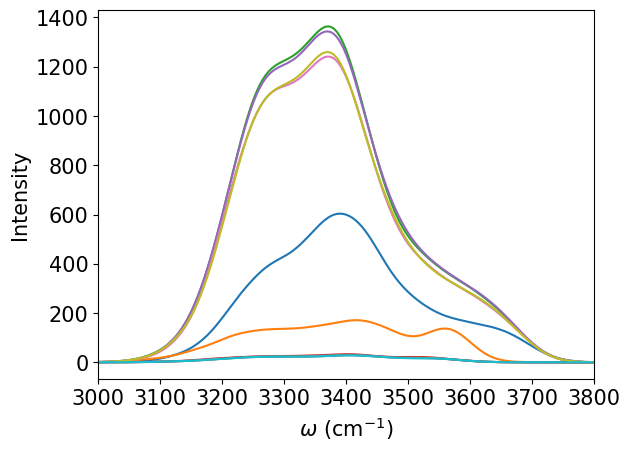

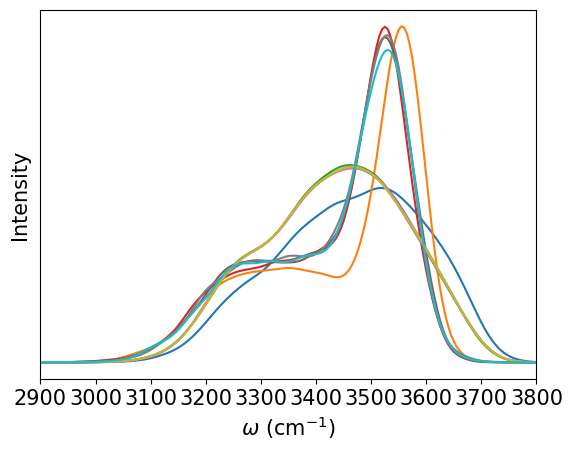

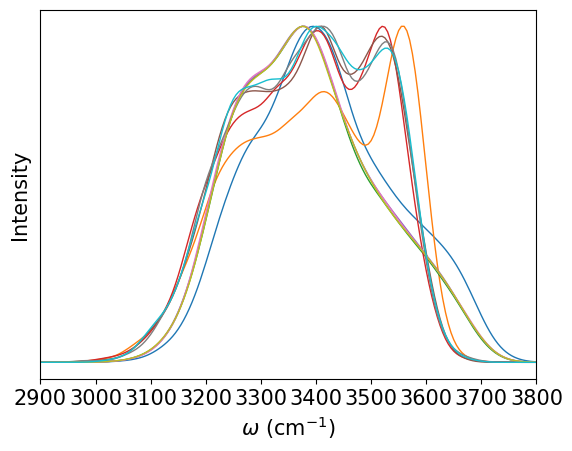

In [13]:


vs = [
      -2,
      98,
      2,
      102,
     6,
     106,
     196,
     296,
     200,
     300
        ]

combos = sort_spectra(vs, vals, allfreqs, allacts)

2900.0


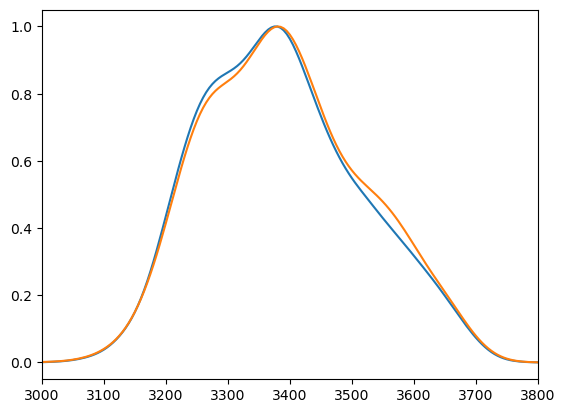

In [14]:

collect = []

collect.append(combos[0][0])

for i in range(3):
    collect.append(combos[2*i][3] + combos[2*i+1][3])# Spectra by distance


collect.append(combos[6][3] + combos[7][3] + combos[8][3] + combos[9][3]) #Bulk
collect.append(combos[0][3] + 
               combos[1][3] + 
               combos[2][3] + 
               combos[3][3] + 
               combos[4][3] + 
               combos[5][3])#Interface


collect = np.array(collect)

plt.xlim(3000, 3800)
collect[1:] = (collect[1:].T / np.sum(collect[1:, 300:], axis=1)).T
print(collect[0][400])


for i in range(4, 6):
    plt.plot(collect[0], collect[i]/np.max(collect[i]))
    





2400.0
1.0 1.0000000000000002


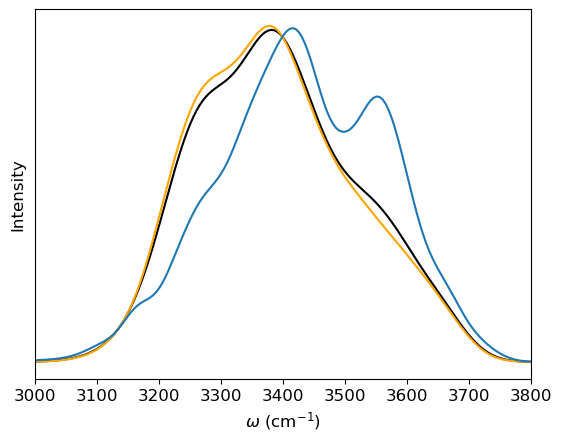

In [15]:
# SC spectra 
    
plt.plot(collect[0], collect[5], c='black') # Interface
plt.plot(collect[0], collect[4], c='orange') #Bulk


xs = 0.88 #amount subtracted
sc = (collect[5] - xs*collect[4]) /(1-xs)
plt.plot(collect[0], sc)
plt.xlim(3000, 3800)



plt.xlabel('$\omega$ (cm$^{-1}$)', size=fs)
plt.ylabel('Intensity', size=fs)
plt.xticks(size=fs)
plt.yticks([], size=fs)


noshift_spectra = np.array([collect[0], collect[4], collect[5], sc])

print(collect[0][300])

print(np.sum(collect[5][300:]), np.sum(collect[4][300:]))

[0.00000000e+00 1.38608571e-02 4.52603191e-03 3.20000000e+03
 3.41593884e+03 3.57817625e+03 2.00000000e+01 1.86726938e+02
 5.06947970e+01]
1.577613792687964
0.08833426422266503


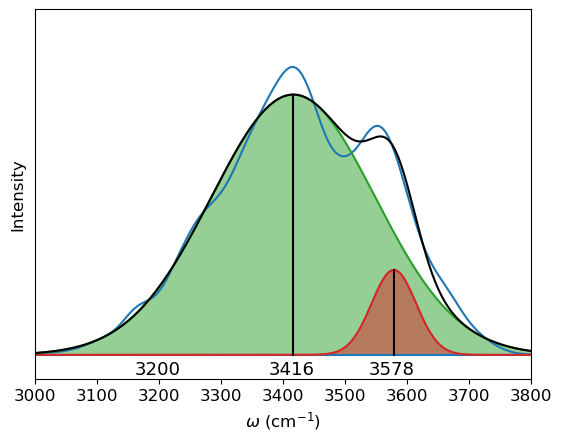

In [16]:
from scipy.optimize import curve_fit

plt.plot(collect[0], sc, c='C0')




curve = lambda freq, h1, h2, h3, f1, f2, f3, w1, w2, w3: (0*h1*np.exp(-((freq - f1)/w1)**2) # Removing First Peak
                                              + h2*np.exp(-((freq - f2)/w2)**2)
                                              + h3*np.exp(-((freq - f3)/w3)**2))



plt.xlim(3000, 3800)



param, cov = curve_fit(curve, collect[0][:], sc[:], maxfev= 10000, p0 = [0.000, 0.01, 0.005,
                                                    3200, 3400, 3600, 
                                                    20, 150, 50])





print(param)
xx = collect[0]
alterparam = np.copy(param)
alterparam[1:3] = 0
yy = curve(xx, *alterparam)
plt.plot(xx, yy)


plt.fill_between(xx, yy, 0, color='C4', alpha = 0.5)
yy2 = np.copy(yy)

alterparam = np.copy(param)
alterparam[[0, 2]] = 0
yy = curve(xx, *alterparam)

yy1 = np.copy(yy)
plt.plot(xx, yy, c='C2')
plt.fill_between(xx, yy, 0, color='C2', alpha = 0.5)


alterparam = np.copy(param)
alterparam[:2] = 0
yy = curve(xx, *alterparam)

plt.plot(xx, yy, c='C3')

plt.fill_between(xx, yy, 0, color='C3', alpha = 0.5)


plt.xlabel('$\omega$ (cm$^{-1}$)', size=fs)
plt.ylabel('Intensity', size=fs)
plt.xticks(size=fs)
plt.yticks([], size=fs)
plt.plot(xx, yy1 + yy2 + yy, c='black')

plt.plot([param[4]]*2, [0, np.max(yy1)], c='black')
plt.plot([param[5]]*2, [0, np.max(yy)], c='black')
plt.plot([param[3]]*2, [0, np.max(yy2)], c='black')


plt.text(param[4]-40, -np.max(sc)/15, str(int(np.round(param[4], 0))), fontsize=13)
plt.text(param[5]-40, -np.max(sc)/15, str(int(np.round(param[5], 0))), fontsize=13)
plt.text(param[3]-40, -np.max(sc)/15, str(int(np.round(param[3], 0))), fontsize=13)



plt.ylim(-np.max(sc)/12, np.max(sc)*1.2)
print(np.sum(np.abs(sc - np.average(sc))))
print(np.sum(np.abs(sc - yy - yy1 - yy2)))

np.save('amoeba_sc_param.npy', param)


np.save("amoeba_shift_sc.npy", np.array([collect[0], sc]))





In [17]:
#SPCE model

projs = ['../ramans/spce/edgedoubles',
         '../ramans/spce/edgeones',
         '../ramans/spce/centerdoubles',
         '../ramans/spce/centerones']


vals, allacts, allfreqs, allfields, alleig = load_data(projs)

../ramans/spce/edgedoubles 005dc6cb602d66ee732fe6fb0758bb56 252 2
a
0 2
../ramans/spce/edgedoubles 00a52023fe46d2c08f8407d5e805144c 112 2
a
0 2
../ramans/spce/edgedoubles 00c36cbecb735464022dd29c6b322091 78 6
a
0 6
../ramans/spce/edgedoubles 0184287dfa9cb1589940c7aaacf18ae9 218 2
a
0 2
../ramans/spce/edgedoubles 01f3a7c7ff1fbd92b8d32dd3208bce37 264 6
a
0 6
../ramans/spce/edgedoubles 0221f58bd89fccdf353729f5a6d82c58 346 -2
a
0 -2
../ramans/spce/edgedoubles 02f73afe8e2532a3a529c7618eec5149 396 6
a
0 6
../ramans/spce/edgedoubles 03adde2fe39616e7b63fde96adc9789e 246 -2
a
0 -2
../ramans/spce/edgedoubles 03f5a3b015950861c2cb34cdd7d3a4f8 88 -2
a
0 -2
../ramans/spce/edgedoubles 044e89acbbb16dba25f0853ce9f70080 412 -2
a
0 -2
../ramans/spce/edgedoubles 051a0aeff3828f2de43164d6cb5940ac 316 6
a
0 6
../ramans/spce/edgedoubles 05f8fc64d858f6583d1367cf32fe428b 94 2
a
0 2
../ramans/spce/edgedoubles 06ba8c9dc01c07126245ad465cb9b40f 298 2
a
0 2
../ramans/spce/edgedoubles 070b6349faefb3239c0715e623cbf410

0 2
../ramans/spce/edgedoubles 3a1783d196bd7ed0e6de2a3d1d306a72 64 -2
a
0 -2
../ramans/spce/edgedoubles 3a7685bf762079c753590f6efaa57430 136 2
a
0 2
../ramans/spce/edgedoubles 3a99531e7078ab36c9004ea3065ecf4d 314 2
a
0 2
../ramans/spce/edgedoubles 3b4de8b4ebf59794ef7dce50b1a07b96 328 -2
a
0 -2
../ramans/spce/edgedoubles 3bbbb9d532ce72853284d6c1a68fb27c 234 -2
a
0 -2
../ramans/spce/edgedoubles 3c40abadfdfcb3d883fd7833f31cb706 410 -2
a
0 -2
../ramans/spce/edgedoubles 3c4766160f50edf6b6be0d0e76643c8e 44 6
a
0 6
../ramans/spce/edgedoubles 3c9352acdf6e494de32d2e4e3721a2d4 116 2
a
0 2
../ramans/spce/edgedoubles 3cb1d3c32612ddcbaa172f65cbcfce54 68 6
a
0 6
../ramans/spce/edgedoubles 3cc1199c09fb02f200db7063673a1ab2 402 2
a
0 2
../ramans/spce/edgedoubles 3cd1e86f10cd352ab5703e2886a746f1 290 -2
a
0 -2
../ramans/spce/edgedoubles 3cdefd606b1e4e172f8e251eb2491443 238 6
a
0 6
../ramans/spce/edgedoubles 3ce690499588ab16bda080e35cbdaced 6 -2
a
0 -2
../ramans/spce/edgedoubles 3cf625fb94809cece31bc25303

../ramans/spce/edgedoubles 64f709079a6b41e73e114efb43f8515e 140 -2
a
0 -2
../ramans/spce/edgedoubles 65179da4aaa724afb0ccc20c1748d9cb 398 2
a
0 2
../ramans/spce/edgedoubles 65aa6045a8f00cdf26daa93c32bdd639 402 6
a
0 6
../ramans/spce/edgedoubles 65cf90bf9d2dc973d462891ddf7cb0a7 268 2
a
0 2
../ramans/spce/edgedoubles 65e1408d15dae6c7321c36cc67f53dfa 250 -2
a
0 -2
../ramans/spce/edgedoubles 665d5e34562f6e5918c40f923b937ccb 408 -2
a
0 -2
../ramans/spce/edgedoubles 66de2324d18b7a1e49914e778690002b 164 -2
a
0 -2
../ramans/spce/edgedoubles 6734527feb2c0d83899b9389e58fcab8 342 2
a
0 2
../ramans/spce/edgedoubles 675f74eccfb7c36555a9af46b52fa727 376 6
a
0 6
../ramans/spce/edgedoubles 68bc2a6e8a2fbabb99b9625d0bd84b9a 228 2
a
0 2
../ramans/spce/edgedoubles 69306c7b2f30bf36f980a97f18c7c212 328 2
a
0 2
../ramans/spce/edgedoubles 6957d0ffd933e5655cb734648e6f3b64 308 2
a
0 2
../ramans/spce/edgedoubles 69657fac057145b9f407c0611c0cc4da 352 2
a
0 2
../ramans/spce/edgedoubles 6b145c1073fb4d50bc64af2cfdf84

../ramans/spce/edgedoubles 925db90f641a29a59b97db4113f5062c 138 6
a
0 6
../ramans/spce/edgedoubles 926e6cbad86ff5f3f88e9ce88ba0b89d 30 -2
a
0 -2
../ramans/spce/edgedoubles 92a4eb002a76732293530fcf909bd058 146 -2
a
0 -2
../ramans/spce/edgedoubles 92be7ad07ad165b009fe7fc84ac79001 50 -2
a
0 -2
../ramans/spce/edgedoubles 93025813d5fd43094ce3d3be592d4baf 186 2
a
0 2
../ramans/spce/edgedoubles 938b223dfc4c824eb3f73b1594b73791 188 2
a
0 2
../ramans/spce/edgedoubles 93fe40658143f8949eb0c2c853516a2f 270 2
a
0 2
../ramans/spce/edgedoubles 946959dcff31a3a8700f5f20eb435cdf 368 2
a
0 2
../ramans/spce/edgedoubles 94a4876f94d138b1c28aabcc02ebb8ea 90 6
a
0 6
../ramans/spce/edgedoubles 950cfa517e317b9a465170092691771e 174 6
a
0 6
../ramans/spce/edgedoubles 956f9da1a5a3f54f1b5074483e57c816 128 6
a
0 6
../ramans/spce/edgedoubles 95ee965bf1eba9cb2de9784418b22616 30 2
a
0 2
../ramans/spce/edgedoubles 9602b30b25a273b15628f770f37d6680 18 -2
a
0 -2
../ramans/spce/edgedoubles 96675f559a651e5e103e67003ada8c04 2

0 -2
../ramans/spce/edgedoubles bdcfe77776f9942f86c3df68824b48a2 0 -2
a
0 -2
../ramans/spce/edgedoubles be454c59718f6779df5343d6c7f2943b 150 6
a
0 6
../ramans/spce/edgedoubles beb57a79212c74034cf0a19072c00c0e 326 -2
a
0 -2
../ramans/spce/edgedoubles bec4beb327586f59f39826144a5e5638 66 -2
a
0 -2
../ramans/spce/edgedoubles bf88ef838e4eb3d643774ae1e3c8afae 372 2
a
0 2
../ramans/spce/edgedoubles c02e87050d47ee78ab00086964ba8d30 300 6
a
0 6
../ramans/spce/edgedoubles c0664ae4cf67408ca103839f4eda79da 370 6
a
0 6
../ramans/spce/edgedoubles c0783ea34b8ff08eeae7807aeccf8868 202 6
a
0 6
../ramans/spce/edgedoubles c07f0060f9c04a4db431eb1760952777 224 -2
a
0 -2
../ramans/spce/edgedoubles c088c58106cc3b2af34517a477ae0696 214 6
a
0 6
../ramans/spce/edgedoubles c0962598071491b8f3eb5479ec3ed788 76 -2
a
0 -2
../ramans/spce/edgedoubles c10e0f047081cbd921fc96f6e6ffb753 186 6
a
0 6
../ramans/spce/edgedoubles c15036c9c4334aa7f8fa554940339860 106 6
a
0 6
../ramans/spce/edgedoubles c20f1a67980773e14d4425616c

0 2
../ramans/spce/edgedoubles ec7bdec9cc53f5337d7755588d54902e 360 6
a
0 6
../ramans/spce/edgedoubles ec96032c8925ed22de908e91547b1447 222 2
a
0 2
../ramans/spce/edgedoubles ecb0bd653504cc9bf7a8683e559c71b0 316 -2
a
0 -2
../ramans/spce/edgedoubles ed45afe7f48da3725be6fbf558328120 86 6
a
0 6
../ramans/spce/edgedoubles ed9594a875ba381f7b6a4b12286d91db 242 -2
a
0 -2
../ramans/spce/edgedoubles ee0e217582a7dd902eb2dad220b74682 266 2
a
0 2
../ramans/spce/edgedoubles ee9f80e183cd9d9c382a60f8f58ac2cc 392 6
a
0 6
../ramans/spce/edgedoubles ef686003e2eee25a09887b9310d86ae2 206 6
a
0 6
../ramans/spce/edgedoubles ef72be07907b32b091501d3fdc14de79 390 6
a
0 6
../ramans/spce/edgedoubles efb535cf4421492475e38f04835e97c0 134 6
a
0 6
../ramans/spce/edgedoubles efc3a047e9386268c552955f9ea361e4 286 2
a
0 2
../ramans/spce/edgedoubles f075b4277be82607b77f3fae4d3d4a92 72 -2
a
0 -2
../ramans/spce/edgedoubles f11ee8ff066dcbabf8c5233f02b4a38f 258 6
a
0 6
../ramans/spce/edgedoubles f134b40cf6ee3bfed880557552c7b

1 98
../ramans/spce/edgeones 248f9bb7eba59de357c9e4e8cde17c55 402 -2
a
1 98
../ramans/spce/edgeones 24e71d59f9d6ab5a214ef2da8fc0ee35 314 6
a
1 106
../ramans/spce/edgeones 2564046a469eb871825ecc6c452215c2 362 2
a
1 102
../ramans/spce/edgeones 2571d3096f98a6ccd001f9dae4c7a9a0 220 -2
a
1 98
../ramans/spce/edgeones 26269398d9dc485921939de7edaa9c14 358 6
a
1 106
../ramans/spce/edgeones 27955af798095deee90d4267e1f4e4fc 48 -2
a
1 98
../ramans/spce/edgeones 285c0f5d54e6d82481aa2cafef679b73 174 -2
a
1 98
../ramans/spce/edgeones 2aa69359cbe608df7047f6b8c9e5324b 362 6
a
1 106
../ramans/spce/edgeones 2ac860efb8d273e19c2bf272cd5f84bb 148 6
a
1 106
../ramans/spce/edgeones 2bea14813eefe9275cab94c463b797d5 292 -2
a
1 98
../ramans/spce/edgeones 2c57650ea4d94953be8693c32df1dd71 242 6
a
1 106
../ramans/spce/edgeones 2d5e2c582a9ea1c2837f81a178c61c52 394 -2
a
1 98
../ramans/spce/edgeones 2e5c14d397f2f56994102f51d2486a35 412 6
a
1 106
../ramans/spce/edgeones 2f2a3557513e19020968c733bd10eed0 222 -2
a
1 98
..

1 102
../ramans/spce/edgeones 5866b002310ac17e2913994bb5279dfa 28 2
a
1 102
../ramans/spce/edgeones 5964130c5e97875fa2fbcb8f86abec37 52 6
a
1 106
../ramans/spce/edgeones 599a8362272dea03b27589daab5f91d0 244 2
a
1 102
../ramans/spce/edgeones 59a224afe59187d71934e53dc3609ac9 360 2
a
1 102
../ramans/spce/edgeones 59a25d731e674eacc51330093d319e05 144 -2
a
1 98
../ramans/spce/edgeones 5a311108fd64b55b77c6b3433b43e7f4 278 -2
a
1 98
../ramans/spce/edgeones 5a4c9b1920bd1f8c1a5990d466986e01 100 -2
a
1 98
../ramans/spce/edgeones 5a4f01f4a7ab712298d5f2965c2bb142 98 2
a
1 102
../ramans/spce/edgeones 5a6740153088aa87bcefcb347daecc81 336 6
a
1 106
../ramans/spce/edgeones 5a69528ed69f2b07605d880a4c6f911b 120 2
a
1 102
../ramans/spce/edgeones 5a86023a207d27a171caf3a11feaf256 310 6
a
1 106
../ramans/spce/edgeones 5a8d78f242b3f08357bcb0622698e7d0 212 2
a
1 102
../ramans/spce/edgeones 5a95ebb794e2dc43895cd2659a0e4ad9 102 6
a
1 106
../ramans/spce/edgeones 5af030d6e950109993fade8d94aee1f6 102 -2
a
1 98
../

1 98
../ramans/spce/edgeones 8ab1a33a8e4ad4f39fe46ccc3fd2dab6 80 -2
a
1 98
../ramans/spce/edgeones 8b086fb82d7d3a0dadab8d61d0f76233 362 -2
a
1 98
../ramans/spce/edgeones 8b3eb48a3dbff122a0cc5bc9ea1d3aa8 158 6
a
1 106
../ramans/spce/edgeones 8b8ea9d0e53ef5f0e24c16cd83e00ce9 284 6
a
1 106
../ramans/spce/edgeones 8bb64dee688b0261ef0513be2201c7c3 4 -2
a
1 98
../ramans/spce/edgeones 8bb789c3a4fb33e03a88a5f3fdaf05a6 338 -2
a
1 98
../ramans/spce/edgeones 8c50fd0c6fbafbb06f78a369ecf37957 310 2
a
1 102
../ramans/spce/edgeones 8c540785a20cdbd60d4e374c0cea09ba 170 6
a
1 106
../ramans/spce/edgeones 8cabaac5629a9def1390e5aea2804cf1 266 -2
a
1 98
../ramans/spce/edgeones 8d5dd7b42225cfc46c87d5d0e8558229 316 2
a
1 102
../ramans/spce/edgeones 8e372f46f8ff6607f2c543a97a198413 284 -2
a
1 98
../ramans/spce/edgeones 8e49274f341e3d1bfb476e74e0f7c763 322 2
a
1 102
../ramans/spce/edgeones 8e72250aeacee65110dfceaaf5bbee00 226 2
a
1 102
../ramans/spce/edgeones 8ea7de051939c217a9bb8a5341e0ee3f 90 2
a
1 102
../ra

1 102
../ramans/spce/edgeones b6ae74199b342111d73f0d257477f066 58 2
a
1 102
../ramans/spce/edgeones b750843f7a24502f7e6c3fb680cbe4b3 136 6
a
1 106
../ramans/spce/edgeones b7556a3f0d7589aabf32eb96584bb0fc 268 6
a
1 106
../ramans/spce/edgeones b844c1f289ade829f8a7086d91447e6b 246 6
a
1 106
../ramans/spce/edgeones b85a13700afe4075c7bfcac179bbcd4e 60 6
a
1 106
../ramans/spce/edgeones b8c9fa0932bc09bafd74dfa4419f3d7f 88 2
a
1 102
../ramans/spce/edgeones b904f975e2152ca2df5402248ecd45bf 198 2
a
1 102
../ramans/spce/edgeones b999a14dfc42a0bdc662675b9cc85aea 396 2
a
1 102
../ramans/spce/edgeones ba29a51f9c850358eda80bfd5f25491c 262 -2
a
1 98
../ramans/spce/edgeones ba96f9c980ef0a61bc26d2cc6e528167 50 6
a
1 106
../ramans/spce/edgeones bbb48701abb13e567ca7b3f135495b48 64 2
a
1 102
../ramans/spce/edgeones bc848657a2e889bb3a0135d6e3fefb92 196 -2
a
1 98
../ramans/spce/edgeones bd217d3993e9b8d758d5ed89d3acdf98 190 6
a
1 106
../ramans/spce/edgeones bd36329ae6586bd1bd79eb2690a9a2e4 300 -2
a
1 98
../ra

../ramans/spce/edgeones e85d49d81464fcfa62f5dc56aa77f0e8 322 -2
a
1 98
../ramans/spce/edgeones e8fc123954a3639004ba5f31d772f0d4 114 -2
a
1 98
../ramans/spce/edgeones e91d471c0a4c03b75dde75e045ad7c9a 182 6
a
1 106
../ramans/spce/edgeones e92639619dc232d9b56b829f00cb9538 410 2
a
1 102
../ramans/spce/edgeones e994d3b616e713632aa7c07d98dcb9bf 50 2
a
1 102
../ramans/spce/edgeones e9ccf50900eedd21d0ce1ffe783fc5fa 208 -2
a
1 98
../ramans/spce/edgeones ea2762dd1e22b2e365adf9ceea1c6593 176 -2
a
1 98
../ramans/spce/edgeones ea593ef6397266d05388992d9469e87c 348 -2
a
1 98
../ramans/spce/edgeones eae608cdebf1dd5fcf21a44c6354191e 108 -2
a
1 98
../ramans/spce/edgeones eb283bf3dfa82b42c14d94017d9a990a 166 2
a
1 102
../ramans/spce/edgeones ebccd9a0b5ed390b15c4feace536a500 304 -2
a
1 98
../ramans/spce/edgeones ec48b3721d923809109fb67412e23f00 0 2
a
1 102
../ramans/spce/edgeones ec7bdec9cc53f5337d7755588d54902e 360 6
a
1 106
../ramans/spce/edgeones ec96032c8925ed22de908e91547b1447 222 2
a
1 102
../ramans

2 197.0
../ramans/spce/centerdoubles 0a53bf950a400439c0bc2a0fab8305d1 96 -9
a
2 191
../ramans/spce/centerdoubles 0a8be5748116e58723dd4041f5dbd98f 381 3.0
a
2 203.0
../ramans/spce/centerdoubles 0a8d339d455f94ac0ade8f4cdb6fafcb 141 3.0
a
2 203.0
../ramans/spce/centerdoubles 0a9674137ecb3b3768c8b27cf81a0ab9 357 3.0
a
2 203.0
../ramans/spce/centerdoubles 0ac3ae42d5ba80eb9cd636ec09d40ef8 349 -9
a
2 191
../ramans/spce/centerdoubles 0b17dcf3279c06a2f442f2f1fbbb07a8 175 -9
a
2 191
../ramans/spce/centerdoubles 0b9b1a943754e360157c20ba60af46bc 325 -9
a
2 191
../ramans/spce/centerdoubles 0ba045878698190f1b0fcf31bb234bd5 118 3.0
a
2 203.0
../ramans/spce/centerdoubles 0bca3fbd5b9d989692c3f20b87e439b2 73 -9
a
2 191
../ramans/spce/centerdoubles 0bd07a836931bab0ac039e9bb0188c76 222 -9
a
2 191
../ramans/spce/centerdoubles 0be7961734ed699962283ef535a35237 151 -9
a
2 191
../ramans/spce/centerdoubles 0c1bd9941c2b73fd1544c1b831abd592 372 -9
a
2 191
../ramans/spce/centerdoubles 0c6bd27b162dbd5fa1c73db9583f5

a
2 203.0
../ramans/spce/centerdoubles 1f7cfe7490a5fe9cb3f3eb4622dd941c 12 3.0
a
2 203.0
../ramans/spce/centerdoubles 1f96dbc40b02485c883aa3b374bdb8e1 347 3.0
a
2 203.0
../ramans/spce/centerdoubles 1fa1678257cc51d505738a551f385a6e 3 -9
a
2 191
../ramans/spce/centerdoubles 1fd89232408a262c570d1fc7878d242a 315 -9
a
2 191
../ramans/spce/centerdoubles 1ffc2c4ec5c63b6e8aa16dd8def34010 16 3.0
a
2 203.0
../ramans/spce/centerdoubles 20670f53aa70c8423cd610cda84842f6 109 3.0
a
2 203.0
../ramans/spce/centerdoubles 208eb46313bfa3421a7e12975a4cd3c9 32 -3.0
a
2 197.0
../ramans/spce/centerdoubles 208f56de8fdbbee9839209d32924224f 247 -3.0
a
2 197.0
../ramans/spce/centerdoubles 209459fa02fe27f72f1c5562f080b997 404 -3.0
a
2 197.0
../ramans/spce/centerdoubles 210ebf20ec8ba46480f3acb179a43a37 165 -9
a
2 191
../ramans/spce/centerdoubles 21202de49668d650e68d4261830b1e88 328 -3.0
a
2 197.0
../ramans/spce/centerdoubles 2157c789c3b3b05ea47c18b7dec5e44d 380 -9
a
2 191
../ramans/spce/centerdoubles 219abba6de7b7e

2 191
../ramans/spce/centerdoubles 33787ace189f40bb55faeb5a4ffb8d44 248 -9
a
2 191
../ramans/spce/centerdoubles 3385aa394a74d04fe4037b2a1a5dbed0 128 3.0
a
2 203.0
../ramans/spce/centerdoubles 33ae8df9003113fb32f8399804b94a6b 163 -9
a
2 191
../ramans/spce/centerdoubles 33f802b7ca15c90f275eb2f851e46b2a 369 3.0
a
2 203.0
../ramans/spce/centerdoubles 3407afa18783daa6eb8174e1a8ffe65e 145 3.0
a
2 203.0
../ramans/spce/centerdoubles 340bc363cc1b7b23d5e63465019bbfea 307 -3.0
a
2 197.0
../ramans/spce/centerdoubles 344d7f99bec16762257fb60422bd15b8 57 -3.0
a
2 197.0
../ramans/spce/centerdoubles 345a1b992a4f63923c348a299f40ba57 300 3.0
a
2 203.0
../ramans/spce/centerdoubles 356d4a0630e1e68eeffec1e3746c0f1a 181 -3.0
a
2 197.0
../ramans/spce/centerdoubles 3599e692ab7577ba96066175d778729e 37 -3.0
a
2 197.0
../ramans/spce/centerdoubles 35d9cb7d975b8e7276786ebadc3da74e 6 -9
a
2 191
../ramans/spce/centerdoubles 35e0277943cb3f259ee48f11cac3a494 165 -3.0
a
2 197.0
../ramans/spce/centerdoubles 360f514e8a9f6

2 191
../ramans/spce/centerdoubles 49747170d02e0f595f8b197be154240d 237 -3.0
a
2 197.0
../ramans/spce/centerdoubles 4997996e49d8ee25a28085aed3334a74 232 3.0
a
2 203.0
../ramans/spce/centerdoubles 49c8ae43d40b74f40c5c230affad4256 103 -3.0
a
2 197.0
../ramans/spce/centerdoubles 49dfa74c8f7e285168b69d1b6aad634a 288 3.0
a
2 203.0
../ramans/spce/centerdoubles 4a085d97f004d076d1c6134c2f4388ac 130 -3.0
a
2 197.0
../ramans/spce/centerdoubles 4a0874a5b7d2668578f63b89479fa6ba 299 -3.0
a
2 197.0
../ramans/spce/centerdoubles 4a5ad71e8a6814d32653981cb086fb15 353 3.0
a
2 203.0
../ramans/spce/centerdoubles 4acdea9d0d5db404327edf92d88e2d42 38 3.0
a
2 203.0
../ramans/spce/centerdoubles 4ad22389a72cc3cd616d69472919c4b7 104 -3.0
a
2 197.0
../ramans/spce/centerdoubles 4aeabe1bf922d73761beca8aff0e0b41 133 3.0
a
2 203.0
../ramans/spce/centerdoubles 4aeb8f60a6092e1ef8feeda2ff3dd42e 171 -9
a
2 191
../ramans/spce/centerdoubles 4b0d8c0d4ff1b8ec3a5a44014f2da8de 393 3.0
a
2 203.0
../ramans/spce/centerdoubles 4b1a

2 203.0
../ramans/spce/centerdoubles 60589b91d28d01bc939cabc383363594 269 -9
a
2 191
../ramans/spce/centerdoubles 607302d238e9c9d4222025ae01549a2e 292 -9
a
2 191
../ramans/spce/centerdoubles 60a6106fc7afb5e187e9ad98e93e05b3 69 -3.0
a
2 197.0
../ramans/spce/centerdoubles 60d429f6f59e3255819b41f6ad9c477c 332 3.0
a
2 203.0
../ramans/spce/centerdoubles 61031e79a2cf97eb18b8dcaa6e79550a 17 -3.0
a
2 197.0
../ramans/spce/centerdoubles 611a1753656945567d5b75a9e210d6ff 290 3.0
a
2 203.0
../ramans/spce/centerdoubles 6156e4e5b7b9b1d5a4aa89e8d84143ad 7 -3.0
a
2 197.0
../ramans/spce/centerdoubles 615bac0e9738ddf2f8aa834f72f3b0ce 189 -9
a
2 191
../ramans/spce/centerdoubles 6180a5edff661fa36bfc4caf603df21c 254 -3.0
a
2 197.0
../ramans/spce/centerdoubles 61cc70daae0528f6d746c29b5067cd18 116 3.0
a
2 203.0
../ramans/spce/centerdoubles 61deb92e4b72aa714305c853a6341ded 320 3.0
a
2 203.0
../ramans/spce/centerdoubles 62116215306647b761bd83e8e10ee23f 195 3.0
a
2 203.0
../ramans/spce/centerdoubles 6239abff9260

2 203.0
../ramans/spce/centerdoubles 768960beaf5cd9438a01827461fdb609 156 -9
a
2 191
../ramans/spce/centerdoubles 769829d813d608f8b58bcee7862a14dd 277 -3.0
a
2 197.0
../ramans/spce/centerdoubles 76aeef6909d1ec7db59f22e620395a4b 241 3.0
a
2 203.0
../ramans/spce/centerdoubles 77564adadf414be2dcfda56bdcb24892 118 -3.0
a
2 197.0
../ramans/spce/centerdoubles 779846c1892ed77b5f4484df1824b688 61 -9
a
2 191
../ramans/spce/centerdoubles 77a69f8ac13ed3cf2d9eaa0f9b759174 72 -3.0
a
2 197.0
../ramans/spce/centerdoubles 77c9aad5e923536c2e7cc0eecaa67373 235 3.0
a
2 203.0
../ramans/spce/centerdoubles 77db1faa1dd3fd0964e4a9e9de917dbc 223 -9
a
2 191
../ramans/spce/centerdoubles 780e17b322f8606817e32144da11237f 296 3.0
a
2 203.0
../ramans/spce/centerdoubles 7838dccc4e3db56d346927abaa6cb99c 27 -9
a
2 191
../ramans/spce/centerdoubles 784f92a773e847f253143b747dafb667 263 -9
a
2 191
../ramans/spce/centerdoubles 787169dc03177dd29b94dfb992741ce4 279 3.0
a
2 203.0
../ramans/spce/centerdoubles 78c1ee33e40bc1f0c7

2 203.0
../ramans/spce/centerdoubles 8bdbabeca9ba5bfa11d25d49495d108d 157 -3.0
a
2 197.0
../ramans/spce/centerdoubles 8becfcb752e527996ebf9e8813480f4c 89 3.0
a
2 203.0
../ramans/spce/centerdoubles 8bedf8dab597438881dc8097910d823d 105 -3.0
a
2 197.0
../ramans/spce/centerdoubles 8c2e7c79bcbd0176cf8da45c7ece48bc 371 -9
a
2 191
../ramans/spce/centerdoubles 8c5eaf57f12a58d11ee16e07464f3767 229 -9
a
2 191
../ramans/spce/centerdoubles 8c61d24bc5d7b5d801f1fbf3bac7f54b 199 3.0
a
2 203.0
../ramans/spce/centerdoubles 8ca26b4028949b141f4ce069003aa847 159 -9
a
2 191
../ramans/spce/centerdoubles 8d286c6d860d99084dfc6500364723be 38 -3.0
a
2 197.0
../ramans/spce/centerdoubles 8d2d04e506fd17503db43e4ddc6a6240 325 3.0
a
2 203.0
../ramans/spce/centerdoubles 8d3416a66ee266fdd0d668f803c4d3ca 415 -3.0
a
2 197.0
../ramans/spce/centerdoubles 8d5d4d874065d7150705d647d68399c1 12 -9
a
2 191
../ramans/spce/centerdoubles 8d835dea01778e5a72d91a7d9529c3db 72 3.0
a
2 203.0
../ramans/spce/centerdoubles 8de9efe5c4bd050

../ramans/spce/centerdoubles a0b09c1e1f97dc82040b1bf42f8204ff 416 3.0
a
2 203.0
../ramans/spce/centerdoubles a0bcd0361894d9cbdd437fe8e1855183 310 -9
a
2 191
../ramans/spce/centerdoubles a11a88fd40efc9d55cd3f7b6d0036786 229 3.0
a
2 203.0
../ramans/spce/centerdoubles a12349a35cfc5ffb4d956988ec540eb8 120 3.0
a
2 203.0
../ramans/spce/centerdoubles a15286db20b1806e7cd14517913a0179 180 -9
a
2 191
../ramans/spce/centerdoubles a1a5b4adba268914af013b983d3b10ed 85 -3.0
a
2 197.0
../ramans/spce/centerdoubles a28ce681f5e2f789fa07e7912911cc98 178 3.0
a
2 203.0
../ramans/spce/centerdoubles a2e1ae15053fd9dad2f704a53ae2532b 232 -9
a
2 191
../ramans/spce/centerdoubles a2e1dce5c4596904608801388b8b6b04 333 -9
a
2 191
../ramans/spce/centerdoubles a314510e4862b95e2224499ad44c8440 193 -3.0
a
2 197.0
../ramans/spce/centerdoubles a33df7798b041851c6f705a1d6937357 98 3.0
a
2 203.0
../ramans/spce/centerdoubles a3c4f94b685293008d4142a37cc12fec 71 3.0
a
2 203.0
../ramans/spce/centerdoubles a3c5e3e7f6cbadf00ee32233

2 203.0
../ramans/spce/centerdoubles b85bd348828d19810b8654c4901213d4 349 -3.0
a
2 197.0
../ramans/spce/centerdoubles b8704643dff781fab83a017f4b39aee8 64 -3.0
a
2 197.0
../ramans/spce/centerdoubles b895abf76f8ba88b9051795523b5d4f2 261 -9
a
2 191
../ramans/spce/centerdoubles b9010f4b49691b5bc0ac597c5d4ea948 165 3.0
a
2 203.0
../ramans/spce/centerdoubles b908007b2bd338e00ed2f091261b9c4b 68 -9
a
2 191
../ramans/spce/centerdoubles b931ea5480f15e3a4a14e0be1d1e46f6 367 -3.0
a
2 197.0
../ramans/spce/centerdoubles b947bf731bc3de3d0dc3a3f5641247d5 127 -9
a
2 191
../ramans/spce/centerdoubles b97a1a589aab7d6dfe41443344ad3b94 294 3.0
a
2 203.0
../ramans/spce/centerdoubles b9974fac262eae862d46f6ffaa8c799e 114 -9
a
2 191
../ramans/spce/centerdoubles ba0761855833e431f16f7d419e1a88d6 376 -9
a
2 191
../ramans/spce/centerdoubles ba345bfbff28cd5a8e7455b39ba05f46 81 -9
a
2 191
../ramans/spce/centerdoubles ba6065154cd961bff6976cc0e70063a1 126 3.0
a
2 203.0
../ramans/spce/centerdoubles ba66a706e8fc357c6ede3

2 191
../ramans/spce/centerdoubles ccab522d27a46356ef4e67d93ad520b9 392 3.0
a
2 203.0
../ramans/spce/centerdoubles cd4f148e4b49e5e960884ef27ce13c51 375 -3.0
a
2 197.0
../ramans/spce/centerdoubles cd6f8a045887b0add5aba6ad4a1432f9 35 -3.0
a
2 197.0
../ramans/spce/centerdoubles cd828ddfb9cee6dd7ddf1d4ddbada616 405 -3.0
a
2 197.0
../ramans/spce/centerdoubles cd8f72cacf2b537ad629da50a0fc3c07 353 -9
a
2 191
../ramans/spce/centerdoubles cda38b6115e41a40faaf2ddefbc4e4f6 301 -9
a
2 191
../ramans/spce/centerdoubles cda63505f90e44625c0a43e4da7ebc2a 266 -9
a
2 191
../ramans/spce/centerdoubles ce3a25f8e043eb8a25fc96e3648b07e7 156 -3.0
a
2 197.0
../ramans/spce/centerdoubles ce558ac248763c912aa11ffd9dc686fe 78 3.0
a
2 203.0
../ramans/spce/centerdoubles cebb3f4f810963f10d248a225299192a 85 3.0
a
2 203.0
../ramans/spce/centerdoubles ced8eea87f054f8245b6c9dc8b590c17 352 3.0
a
2 203.0
../ramans/spce/centerdoubles cf121d13d843be63ab74898c6bef7e02 2 -3.0
a
2 197.0
../ramans/spce/centerdoubles cf2b64f0c46818

2 203.0
../ramans/spce/centerdoubles e50233df5e39f2be78301e24359efcf8 341 -3.0
a
2 197.0
../ramans/spce/centerdoubles e55e01e3488adeed06ab5209eab479f2 364 -3.0
a
2 197.0
../ramans/spce/centerdoubles e59e4eb4cbac25c35c7dc633859a0797 53 -9
a
2 191
../ramans/spce/centerdoubles e5bb4d8023bbb604c480e7e50fa52cee 111 -9
a
2 191
../ramans/spce/centerdoubles e5e7add37895d1a2367dde1c9fa854ec 71 -3.0
a
2 197.0
../ramans/spce/centerdoubles e601ee5d74b044dd52870a15ef0b21e9 388 3.0
a
2 203.0
../ramans/spce/centerdoubles e60aef0c787c66bf8e36fc9077b11e3d 356 3.0
a
2 203.0
../ramans/spce/centerdoubles e63be3e557956359defe52dbe5f2d96f 63 -3.0
a
2 197.0
../ramans/spce/centerdoubles e699a55b278645d1edd5ba3e1e3afd3d 99 -9
a
2 191
../ramans/spce/centerdoubles e6b4964f127c96bda2f2388c8a3fdeaf 308 -3.0
a
2 197.0
../ramans/spce/centerdoubles e6d1c8e15c311a7be696836f53676d89 74 3.0
a
2 203.0
../ramans/spce/centerdoubles e6e137547e2b9bbdd32868a70e8a320b 360 -3.0
a
2 197.0
../ramans/spce/centerdoubles e6ee482aa71

../ramans/spce/centerdoubles f99dadbad44aea26287c5cd1c242d8b7 264 -3.0
a
2 197.0
../ramans/spce/centerdoubles f9ab3cb4360b027f8673aadac4daad89 322 -3.0
a
2 197.0
../ramans/spce/centerdoubles fa19b45d8c5f3290e8efea3ddb463b46 357 -3.0
a
2 197.0
../ramans/spce/centerdoubles fa7eaf6a2d06407e5cfa27ed344c118c 83 -3.0
a
2 197.0
../ramans/spce/centerdoubles faad1b5c6f52d67afa641492e10b5989 194 -3.0
a
2 197.0
../ramans/spce/centerdoubles fac5b687a01c3a068ef90900bdeee483 59 -3.0
a
2 197.0
../ramans/spce/centerdoubles face99605813df5802141b50479710cf 189 3.0
a
2 203.0
../ramans/spce/centerdoubles fad538207f99bac2e27fac37176c7583 370 -9
a
2 191
../ramans/spce/centerdoubles fae3decda8df0253ef7bb70d7b31e362 297 3.0
a
2 203.0
../ramans/spce/centerdoubles fae74e46b9afafff6e893bb0a770c6d7 227 -9
a
2 191
../ramans/spce/centerdoubles fb090308b6dbbd95be7ea04aa65c6ee0 344 -3.0
a
2 197.0
../ramans/spce/centerdoubles fb16bab990b70e1d6e88f1ee5ae67462 106 3.0
a
2 203.0
../ramans/spce/centerdoubles fb1faa4cc6e2

3 297
../ramans/spce/centerones 0d9c40cad045680c3a8cbd928cbd4416 206 -3
a
3 297
../ramans/spce/centerones 0dda98e40ae4710f695a4cf0ebcf7ab4 7 -9
a
3 291
../ramans/spce/centerones 0df19fc0bec63fd92c71a914e72838d1 348 -9
a
3 291
../ramans/spce/centerones 0e4760b8ebaa7e364e316b02c242d85c 304 -9
a
3 291
../ramans/spce/centerones 0e5d2588b48a660545bd6bb20544492f 362 -9
a
3 291
../ramans/spce/centerones 0e783993b3de26b3523866f6f918d7cb 182 -9
a
3 291
../ramans/spce/centerones 0e7e975f5155e0ec10822f0ac85c84f5 381 -3
a
3 297
../ramans/spce/centerones 0ea779023441b0b8c2ad79389c24e5a0 402 -3
a
3 297
../ramans/spce/centerones 0ec8be508d4d53ed05977092db2ae829 171 3
a
3 303
../ramans/spce/centerones 0f10f4e6008c1b06e3bc543848315a9d 265 -9
a
3 291
../ramans/spce/centerones 0f74764c4f2b2534424bc4cee00c8d8e 184 3
a
3 303
../ramans/spce/centerones 0f9af36093ac2147eef443b4bc0c2d58 343 -9
a
3 291
../ramans/spce/centerones 0fd61483100fa1b1173466be7243369c 37 -3
a
3 297
../ramans/spce/centerones 0fe6d7f0c05

3 303
../ramans/spce/centerones 26b5fd6f10f75d31359561056c61b4b9 150 -9
a
3 291
../ramans/spce/centerones 26d451bf4f8c524dc9387bd928aa2625 283 -9
a
3 291
../ramans/spce/centerones 271062dbe0962317d43d8dcf5c6876b3 6 -3
a
3 297
../ramans/spce/centerones 27119106207bbe5de14e0a9edaf61710 46 -3
a
3 297
../ramans/spce/centerones 27382f05b799c32b657c9220ac07d30e 411 -9
a
3 291
../ramans/spce/centerones 2746fc9a8f00264e5a67af67f802b4f3 234 3
a
3 303
../ramans/spce/centerones 276f267c0945be71b866fd9194785823 132 3
a
3 303
../ramans/spce/centerones 2771ce4cb37c723c17b79f23af496c38 353 3
a
3 303
../ramans/spce/centerones 27811c37af5beb5a7cfb6d5114113025 408 -9
a
3 291
../ramans/spce/centerones 27db4436f899f7b6f35137a41fbb154f 297 -3
a
3 297
../ramans/spce/centerones 27e685b80618b8e2b134711fd72620c6 15 3
a
3 303
../ramans/spce/centerones 2809b903397b680217a58e192a4ea52a 224 -3
a
3 297
../ramans/spce/centerones 2826e5de1d4dd1d20ce7a0761d4af230 314 3
a
3 303
../ramans/spce/centerones 287aa9d2fbe37c3

../ramans/spce/centerones 3f0d9df51df562bb26c6ab6b6bd06e69 345 -9
a
3 291
../ramans/spce/centerones 3f6047c471e8c8519d8af5f2fa5aa7da 39 -9
a
3 291
../ramans/spce/centerones 3f7580f4afd98697686658a59f2c0ad9 60 -3
a
3 297
../ramans/spce/centerones 3f7990b79c0843ecbd6daeffdb3adb8d 0 3
a
3 303
../ramans/spce/centerones 3f88fed6ed161edb19c2403bc44f66a0 284 3
a
3 303
../ramans/spce/centerones 3fedb15e2a9500fb3ee73d84f35bc0d5 249 -9
a
3 291
../ramans/spce/centerones 4015ffc5f9c9feccb5aa6c34c3391faf 105 -9
a
3 291
../ramans/spce/centerones 4026fe549585089b2731dcad089c97f2 37 -9
a
3 291
../ramans/spce/centerones 40b47463624941762a3962ec494c5c3d 396 3
a
3 303
../ramans/spce/centerones 40fcf260635967e30f94380b3c6fa623 354 -3
a
3 297
../ramans/spce/centerones 4136690edcc1b2b079a10d9c5b246c09 123 3
a
3 303
../ramans/spce/centerones 416c3e31eb82ac157f0c572f48bb6837 340 -9
a
3 291
../ramans/spce/centerones 41fcbff4f2ada8fd558c60ac00b7defa 150 3
a
3 303
../ramans/spce/centerones 41fce0be5bcc20819e39e5

3 291
../ramans/spce/centerones 59e19352e96c09737b351eb3f69accc2 203 3
a
3 303
../ramans/spce/centerones 59efe42c949605af66d44d4911f0b5d5 216 -3
a
3 297
../ramans/spce/centerones 5a3a32934446760718a439b692a38870 84 -9
a
3 291
../ramans/spce/centerones 5a581da7c918742443ce0137c3f5c9e4 144 -9
a
3 291
../ramans/spce/centerones 5abfe50aa96e9cfcd4ebd9dd7dc4941f 373 -9
a
3 291
../ramans/spce/centerones 5af462ae38c216c574bf044251766e78 179 -3
a
3 297
../ramans/spce/centerones 5b2111dcf8c63f12db621db59612ec81 402 -9
a
3 291
../ramans/spce/centerones 5b2e593afeabe31e7ada5210c2b12f87 271 3
a
3 303
../ramans/spce/centerones 5b3b463510ea33844a3c2f1216688d61 305 -9
a
3 291
../ramans/spce/centerones 5b44c1d6024adfe74a1467a5251d8f7d 312 3
a
3 303
../ramans/spce/centerones 5b58fea606db8f360bd98aa227e5e550 359 -9
a
3 291
../ramans/spce/centerones 5b9ffb0f081b9e49ff673da1e5439cff 338 -9
a
3 291
../ramans/spce/centerones 5bb02c41bd207805e164927a3bf6e137 189 3
a
3 303
../ramans/spce/centerones 5bfad022fb1

3 297
../ramans/spce/centerones 72ec4fd7c70eb5112d6a85d00abcc684 66 -3
a
3 297
../ramans/spce/centerones 733cc0894ff35c1d58947f8ea9e99c95 211 -9
a
3 291
../ramans/spce/centerones 73510ce5cd69488670b90d0da5f4dd97 118 -9
a
3 291
../ramans/spce/centerones 738bd2880cf6f8d103883577a9070c31 101 -3
a
3 297
../ramans/spce/centerones 740a1c3ba544536d5870a6941bcd447f 18 -9
a
3 291
../ramans/spce/centerones 7433b669270ab841597b7ce4e9df4b58 237 -9
a
3 291
../ramans/spce/centerones 74603ebb756df9290f2ed04fbc11e185 188 -3
a
3 297
../ramans/spce/centerones 74948d652c8b3546d62eb1429ca4c733 76 3
a
3 303
../ramans/spce/centerones 74ba1335b4f1e999beca0eada551e7f6 195 -9
a
3 291
../ramans/spce/centerones 754518635305fcffb7f0e18294ee9ae6 104 -9
a
3 291
../ramans/spce/centerones 755ea4d8ee5fd17d91300971a624f8af 150 -3
a
3 297
../ramans/spce/centerones 756c835ed17e5c660da0a3fea034fcee 9 -9
a
3 291
../ramans/spce/centerones 759dcc9914cc419ac0d6c355a7539353 320 -3
a
3 297
../ramans/spce/centerones 763869836bd3

3 297
../ramans/spce/centerones 8828c4dce2d9a910670b6141fd854823 29 -3
a
3 297
../ramans/spce/centerones 882bc7dea9a5da1196e142492dfe9588 133 -3
a
3 297
../ramans/spce/centerones 8893424fb49eb7744f50a260b73267fe 129 -9
a
3 291
../ramans/spce/centerones 88ba8ca6724b04b1f74d47d19255c4ba 221 -9
a
3 291
../ramans/spce/centerones 890669e773cbd686190c6e3b84fa28b2 403 3
a
3 303
../ramans/spce/centerones 89a67870990e8b9e5d06b5a5d3474c5d 292 -3
a
3 297
../ramans/spce/centerones 8a5b4fa68bfe135de5dbc0ef68dbb362 86 -3
a
3 297
../ramans/spce/centerones 8a63ca0e5ae5be5807faba217aa25cfb 64 3
a
3 303
../ramans/spce/centerones 8a7d3429d540c621d77d49a307dc2414 176 -9
a
3 291
../ramans/spce/centerones 8a85ccb2200dd8cd44b683cc353ee450 392 -9
a
3 291
../ramans/spce/centerones 8ace61ce5c26890c70334cd92e9181c0 65 3
a
3 303
../ramans/spce/centerones 8ace843181f430895f4934c40932fcfe 173 -3
a
3 297
../ramans/spce/centerones 8ad6072b52d0b2be6e8548f0ad8e5515 384 -9
a
3 291
../ramans/spce/centerones 8af19da687a93

../ramans/spce/centerones 9fccdfb6d3e5cc80acc4aa134173d30b 281 -9
a
3 291
../ramans/spce/centerones a014e77faec88077fbbebd4641acfacf 244 -3
a
3 297
../ramans/spce/centerones a0757c23c22c867e3d57f6552ac878f8 342 -9
a
3 291
../ramans/spce/centerones a0bcd0361894d9cbdd437fe8e1855183 310 -9
a
3 291
../ramans/spce/centerones a0d91aa27fb13e4f906ecff0cba497a2 158 3
a
3 303
../ramans/spce/centerones a10b8057124aceab71bde60c7048736b 259 3
a
3 303
../ramans/spce/centerones a15286db20b1806e7cd14517913a0179 180 -9
a
3 291
../ramans/spce/centerones a16152086628f05c534fb16681b83020 47 -3
a
3 297
../ramans/spce/centerones a22c22672d3d5fefdb7b80e9c16f2632 57 -3
a
3 297
../ramans/spce/centerones a285c06da1534ac194dc7558fb7933f0 73 3
a
3 303
../ramans/spce/centerones a2ce41d531f2121cd0bc58f6c0bdc704 286 3
a
3 303
../ramans/spce/centerones a2e1ae15053fd9dad2f704a53ae2532b 232 -9
a
3 291
../ramans/spce/centerones a2e1dce5c4596904608801388b8b6b04 333 -9
a
3 291
../ramans/spce/centerones a2f3bb849e1e6edc0f6

3 291
../ramans/spce/centerones b8cdc727b9833115b4d6966a985f0700 84 -3
a
3 297
../ramans/spce/centerones b8e670c3a65edd74bc5ebfd130512230 230 3
a
3 303
../ramans/spce/centerones b908007b2bd338e00ed2f091261b9c4b 68 -9
a
3 291
../ramans/spce/centerones b947bf731bc3de3d0dc3a3f5641247d5 127 -9
a
3 291
../ramans/spce/centerones b95182ecdceefa197d2c3e2f17a56653 367 -3
a
3 297
../ramans/spce/centerones b9974fac262eae862d46f6ffaa8c799e 114 -9
a
3 291
../ramans/spce/centerones b9b0314bd03acc11d5d890d313007b57 287 -3
a
3 297
../ramans/spce/centerones b9f49856129c384c5f586a419d92d674 374 -3
a
3 297
../ramans/spce/centerones ba0761855833e431f16f7d419e1a88d6 376 -9
a
3 291
../ramans/spce/centerones ba2937ee125f06aba2fbb29cfd5d21e3 349 -3
a
3 297
../ramans/spce/centerones ba3148723ffac91b1d4e63db672ecd6d 316 3
a
3 303
../ramans/spce/centerones ba345bfbff28cd5a8e7455b39ba05f46 81 -9
a
3 291
../ramans/spce/centerones ba999a862807c64d0d7769a28b155fa7 278 3
a
3 303
../ramans/spce/centerones bae612a7687f

3 303
../ramans/spce/centerones cd67f29a1763f972d2d9b4c7da18a713 144 3
a
3 303
../ramans/spce/centerones cd8f72cacf2b537ad629da50a0fc3c07 353 -9
a
3 291
../ramans/spce/centerones cda38b6115e41a40faaf2ddefbc4e4f6 301 -9
a
3 291
../ramans/spce/centerones cda63505f90e44625c0a43e4da7ebc2a 266 -9
a
3 291
../ramans/spce/centerones ce2e7259f23ca764cc5e7d8dc5ca71aa 3 3
a
3 303
../ramans/spce/centerones ce505d1cf6ec9a04c092736d049bc438 17 -3
a
3 297
../ramans/spce/centerones ce81154c3e161e86fcd4843494b4b6a9 369 -3
a
3 297
../ramans/spce/centerones cec1f0dc6bd74bd2d442ce5428214438 370 3
a
3 303
../ramans/spce/centerones cec750d583277c2e1921e0d3f2f8b819 355 3
a
3 303
../ramans/spce/centerones ceca321870bb5b0fabe3e3d79276c590 311 -3
a
3 297
../ramans/spce/centerones ced3756c47a918814121ef13c6b04d61 73 -3
a
3 297
../ramans/spce/centerones cedcce75157d43cd5b5233bed95fa07e 63 3
a
3 303
../ramans/spce/centerones cf2b64f0c4681889cd5b4a3c79eab463 257 -9
a
3 291
../ramans/spce/centerones cf3bfb3bab09a15f

../ramans/spce/centerones e53df56f79f949213754250bf05fbdac 251 3
a
3 303
../ramans/spce/centerones e59c46f02a57112101da9b494d2819c9 204 3
a
3 303
../ramans/spce/centerones e59e4eb4cbac25c35c7dc633859a0797 53 -9
a
3 291
../ramans/spce/centerones e5bb4d8023bbb604c480e7e50fa52cee 111 -9
a
3 291
../ramans/spce/centerones e5d6fa9de3072faae0404bf1c48d6f9b 105 3
a
3 303
../ramans/spce/centerones e5fb0661b72c133f5e954ef01246f239 91 3
a
3 303
../ramans/spce/centerones e61a2c24c83f3ac6fb603e07ff71623f 72 -3
a
3 297
../ramans/spce/centerones e6395e47e36f84c812a24c260abc10f0 330 3
a
3 303
../ramans/spce/centerones e67393e7a581017222247532ed54ee4a 103 3
a
3 303
../ramans/spce/centerones e67e89435c7111d617bdb20a523fdcdd 383 -3
a
3 297
../ramans/spce/centerones e699a55b278645d1edd5ba3e1e3afd3d 99 -9
a
3 291
../ramans/spce/centerones e715459b4f231a2b150e88050c101aff 19 -9
a
3 291
../ramans/spce/centerones e74ba335c311a5a36e92ba9235e24d5e 192 -3
a
3 297
../ramans/spce/centerones e78a87146f5cc2d821eca64

../ramans/spce/centerones fe2c429dd7ddda2f67bb158677415c38 396 -9
a
3 291
../ramans/spce/centerones fe3d0157369f6f8b9c382a392fb4560b 67 -3
a
3 297
../ramans/spce/centerones fe3f66d6e14f681eaa00f01795f59a8f 239 3
a
3 303
../ramans/spce/centerones fecb72e07eeea31b9ca05ebd48ebc790 255 3
a
3 303
../ramans/spce/centerones ff1936e0de9aae55d531d8a8f8b9886f 108 -3
a
3 297
../ramans/spce/centerones ff4c7bc92b10f5d330280abf733ca15b 267 3
a
3 303
../ramans/spce/centerones ffdfcf6a219a7216a455f5d86f85ca8d 323 3
a
3 303
../ramans/spce/centerones ffe63d172aa4e3cdd8c4536a1b5081ba 207 3
a
3 303


In [18]:
vs = [
      -2,
      98,
      2,
      102,
     6,
      106,
    191,
    291,
    197,
    297,
    203,
    303
        ]

compute_free_OHs(vs, vals, allfields)

-2
98
2
102
6
106
191
291
197
297
203
303
0.2535018099242305
0.031629944252721
0.03164556962025317
0.03230153882529112
0.03190953785644051


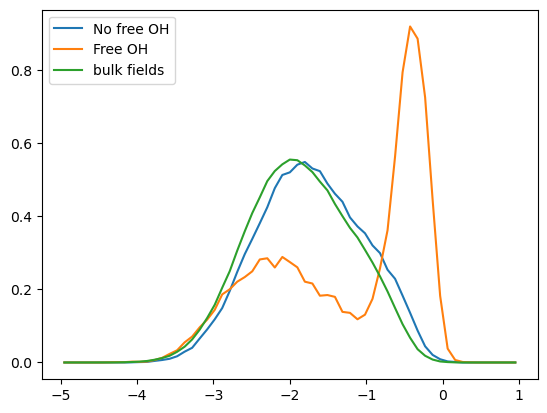

In [19]:
probfields = compute_fields(vs, vals, allfields)


np.save("spce_interface_fields.npy", probfields)

0
1
2
3
4
5
6
7
8
9
10
11


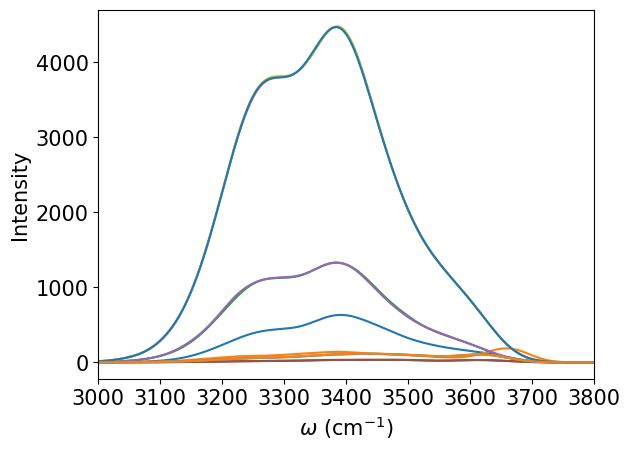

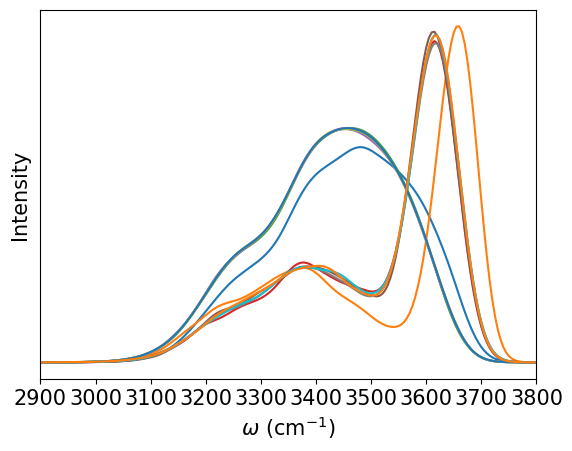

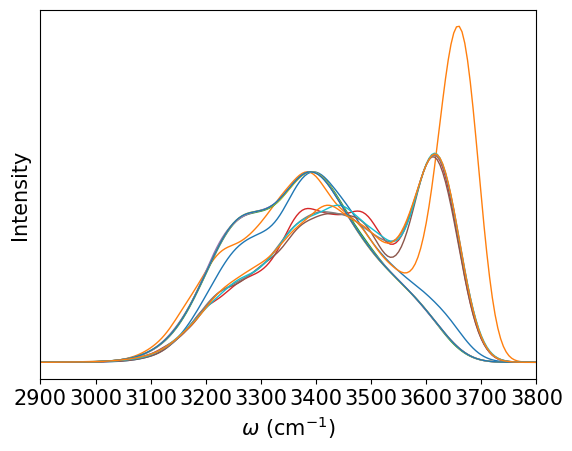

In [20]:
combos = sort_spectra(vs, vals, allfreqs, allacts)

2900.0


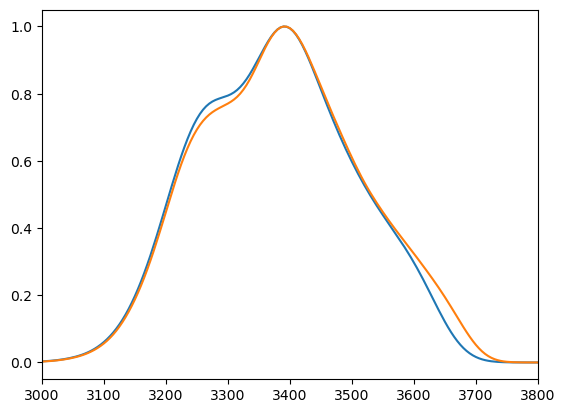

In [21]:
#SPCE spectra by distance
collect = []

collect.append(combos[0][0])

for i in range(3):
    collect.append(combos[2*i][3] + combos[2*i+1][3])# Spectra by distance


collect.append(combos[6][3] + combos[7][3] + combos[8][3] + combos[9][3] + combos[10][3] +combos[11][3]) #Bulk
collect.append(1*combos[0][3] + 
               1*combos[1][3] + 
               combos[2][3] + 
               combos[3][3] + 
               1*combos[4][3] + 
               1*combos[5][3])#Interface


collect = np.array(collect)

plt.xlim(3000, 3800)
collect[1:] = (collect[1:].T / np.sum(collect[1:, 300:], axis=1)).T
print(collect[0][400])


for i in range(4, 6):
    plt.plot(collect[0], collect[i]/np.max(collect[i]))
    

np.save('spce_spectra_by_distance.npy', collect)




[2.85312092e-03 1.40969786e-02 5.54720228e-03 3.22391707e+03
 3.39971175e+03 3.64386459e+03 6.21622124e+01 1.64086053e+02
 6.08773631e+01]
Free OH peak area = 0.11940537419034757


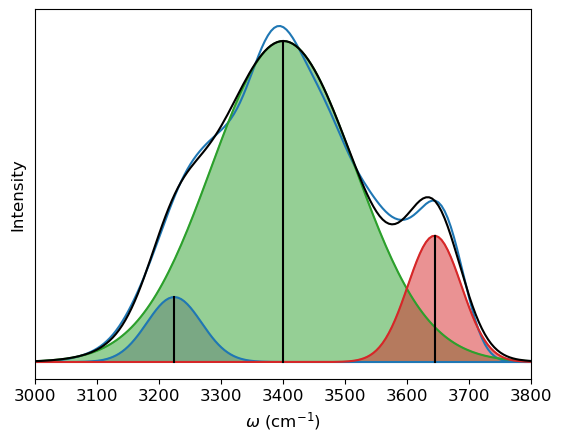

In [22]:
fs = 12
#Spectra of just edge

from scipy.optimize import curve_fit

plt.plot(collect[0], collect[1], c='C0')

curve = lambda freq, h1, h2, h3, f1, f2, f3, w1, w2, w3: (1*h1*np.exp(-((freq - f1)/w1)**2)
                                              + h2*np.exp(-((freq - f2)/w2)**2)
                                              + h3*np.exp(-((freq - f3)/w3)**2))



plt.xlim(3000, 3800)

param, cov = curve_fit(curve, collect[0][300:], collect[1][300:], maxfev= 10000, p0 = [0.000, 0.01, 0.005,
                                                    3200, 3400, 3600, 
                                                    20, 150, 50])



print(param)
xx = collect[0]
alterparam = np.copy(param)
alterparam[1:3] = 0
yy = curve(xx, *alterparam)

plt.plot(xx, yy)
plt.fill_between(xx, yy, 0, color='C4', alpha = 0.5)
yy2 = np.copy(yy)

alterparam = np.copy(param)
alterparam[[0, 2]] = 0
yy = curve(xx, *alterparam)

yy1 = np.copy(yy)
plt.plot(xx, yy, c='C2')
plt.fill_between(xx, yy, 0, color='C2', alpha = 0.5)


alterparam = np.copy(param)
alterparam[:2] = 0
yy = curve(xx, *alterparam)

plt.plot(xx, yy, c='C3')
plt.fill_between(xx, yy, 0, color='C3', alpha = 0.5)


plt.xlabel('$\omega$ (cm$^{-1}$)', size=fs)
plt.ylabel('Intensity', size=fs)
plt.xticks(size=fs)
plt.yticks([], size=fs)
plt.plot(xx, yy1 + yy2 + yy, c='black')

plt.plot([param[4]]*2, [0, np.max(yy1)], c='black')
plt.plot([param[5]]*2, [0, np.max(yy)], c='black')
plt.plot([param[3]]*2, [0, np.max(yy2)], c='black')


peak_areas = []

for i in range(3):
    peak_areas.append(param[i]*np.abs(param[6+i]))
    
peak_areas = np.array(peak_areas)
print("Free OH peak area =", peak_areas[2] / (peak_areas[0] + peak_areas[1] + peak_areas[2]))


np.save('spce2A_param.npy', param)


np.save("spce2A.npy", np.array([collect[0], collect[1]]))






2400.0
1.0000000000000002 1.0


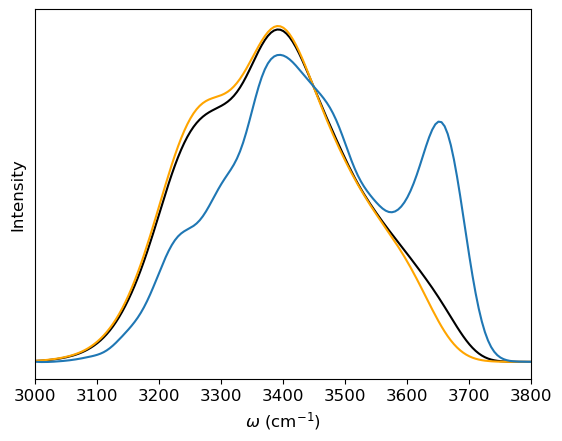

In [23]:
# SC spectra 
    
plt.plot(collect[0], collect[5], c='black') # Interface
plt.plot(collect[0], collect[4], c='orange') #Bulk


xs = 0.88 #amount subtract
sc = (collect[5] - xs*collect[4]) /(1-xs)
plt.plot(collect[0], sc)
plt.xlim(3000, 3800)



plt.xlabel('$\omega$ (cm$^{-1}$)', size=fs)
plt.ylabel('Intensity', size=fs)
plt.xticks(size=fs)
plt.yticks([], size=fs)


noshift_spectra = np.array([collect[0], collect[4], collect[5], sc])

np.save("spce_no_shiftspectra", noshift_spectra)
print(collect[0][300])

print(np.sum(collect[5][300:]), np.sum(collect[4][300:]))

[2.27117857e-03 1.37753082e-02 9.58741434e-03 3.21616028e+03
 3.41464957e+03 3.65141475e+03 5.14591895e+01 1.58627203e+02
 5.48275193e+01]
Free OH peak area = 0.18589684583337637


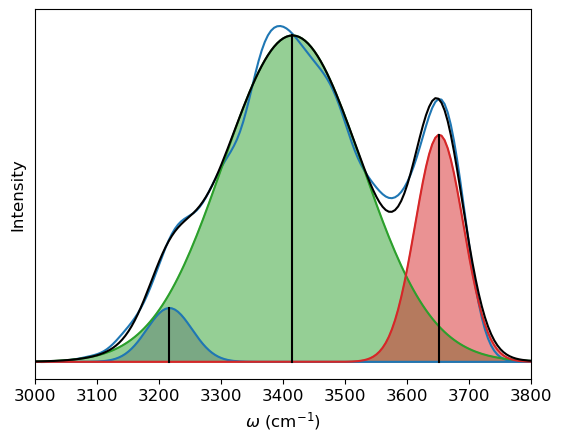

In [24]:
fs = 12
#Spectra of just edge

from scipy.optimize import curve_fit

plt.plot(collect[0], sc, c='C0')

curve = lambda freq, h1, h2, h3, f1, f2, f3, w1, w2, w3: (1*h1*np.exp(-((freq - f1)/w1)**2)
                                              + h2*np.exp(-((freq - f2)/w2)**2)
                                              + h3*np.exp(-((freq - f3)/w3)**2))



plt.xlim(3000, 3800)

param, cov = curve_fit(curve, collect[0][300:], sc[300:], maxfev= 10000, p0 = [0.000, 0.01, 0.005,
                                                    3200, 3400, 3700, 
                                                    50, 150, 50])




print(param)
xx = collect[0]
alterparam = np.copy(param)
alterparam[1:3] = 0
yy = curve(xx, *alterparam)

plt.plot(xx, yy)
plt.fill_between(xx, yy, 0, color='C4', alpha = 0.5)
yy2 = np.copy(yy)

alterparam = np.copy(param)
alterparam[[0, 2]] = 0
yy = curve(xx, *alterparam)

yy1 = np.copy(yy)
plt.plot(xx, yy, c='C2')
plt.fill_between(xx, yy, 0, color='C2', alpha = 0.5)


alterparam = np.copy(param)
alterparam[:2] = 0
yy = curve(xx, *alterparam)

plt.plot(xx, yy, c='C3')
plt.fill_between(xx, yy, 0, color='C3', alpha = 0.5)


plt.xlabel('$\omega$ (cm$^{-1}$)', size=fs)
plt.ylabel('Intensity', size=fs)
plt.xticks(size=fs)
plt.yticks([], size=fs)
plt.plot(xx, yy1 + yy2 + yy, c='black')

plt.plot([param[4]]*2, [0, np.max(yy1)], c='black')
plt.plot([param[5]]*2, [0, np.max(yy)], c='black')
plt.plot([param[3]]*2, [0, np.max(yy2)], c='black')


peak_areas = []

for i in range(3):
    peak_areas.append(param[i]*np.abs(param[6+i]))
    
peak_areas = np.array(peak_areas)
print("Free OH peak area =", peak_areas[2] / (peak_areas[0] + peak_areas[1] + peak_areas[2]))


np.save('spce_noshift_sc_param.npy', param)
np.save("spce_noshift_sc.npy", np.array([collect[0], sc]))






In [25]:
#SPCE model

projs = ['../ramans/spce/edgedoubles',
         '../ramans/spce/edgeones675',
         '../ramans/spce/centerdoubles',
         '../ramans/spce/centerones675']

vals, allacts, allfreqs, allfields, alleig = load_data(projs)

../ramans/spce/edgedoubles 005dc6cb602d66ee732fe6fb0758bb56 252 2
a
0 2
../ramans/spce/edgedoubles 00a52023fe46d2c08f8407d5e805144c 112 2
a
0 2
../ramans/spce/edgedoubles 00c36cbecb735464022dd29c6b322091 78 6
a
0 6
../ramans/spce/edgedoubles 0184287dfa9cb1589940c7aaacf18ae9 218 2
a
0 2
../ramans/spce/edgedoubles 01f3a7c7ff1fbd92b8d32dd3208bce37 264 6
a
0 6
../ramans/spce/edgedoubles 0221f58bd89fccdf353729f5a6d82c58 346 -2
a
0 -2
../ramans/spce/edgedoubles 02f73afe8e2532a3a529c7618eec5149 396 6
a
0 6
../ramans/spce/edgedoubles 03adde2fe39616e7b63fde96adc9789e 246 -2
a
0 -2
../ramans/spce/edgedoubles 03f5a3b015950861c2cb34cdd7d3a4f8 88 -2
a
0 -2
../ramans/spce/edgedoubles 044e89acbbb16dba25f0853ce9f70080 412 -2
a
0 -2
../ramans/spce/edgedoubles 051a0aeff3828f2de43164d6cb5940ac 316 6
a
0 6
../ramans/spce/edgedoubles 05f8fc64d858f6583d1367cf32fe428b 94 2
a
0 2
../ramans/spce/edgedoubles 06ba8c9dc01c07126245ad465cb9b40f 298 2
a
0 2
../ramans/spce/edgedoubles 070b6349faefb3239c0715e623cbf410

0 -2
../ramans/spce/edgedoubles 3a7685bf762079c753590f6efaa57430 136 2
a
0 2
../ramans/spce/edgedoubles 3a99531e7078ab36c9004ea3065ecf4d 314 2
a
0 2
../ramans/spce/edgedoubles 3b4de8b4ebf59794ef7dce50b1a07b96 328 -2
a
0 -2
../ramans/spce/edgedoubles 3bbbb9d532ce72853284d6c1a68fb27c 234 -2
a
0 -2
../ramans/spce/edgedoubles 3c40abadfdfcb3d883fd7833f31cb706 410 -2
a
0 -2
../ramans/spce/edgedoubles 3c4766160f50edf6b6be0d0e76643c8e 44 6
a
0 6
../ramans/spce/edgedoubles 3c9352acdf6e494de32d2e4e3721a2d4 116 2
a
0 2
../ramans/spce/edgedoubles 3cb1d3c32612ddcbaa172f65cbcfce54 68 6
a
0 6
../ramans/spce/edgedoubles 3cc1199c09fb02f200db7063673a1ab2 402 2
a
0 2
../ramans/spce/edgedoubles 3cd1e86f10cd352ab5703e2886a746f1 290 -2
a
0 -2
../ramans/spce/edgedoubles 3cdefd606b1e4e172f8e251eb2491443 238 6
a
0 6
../ramans/spce/edgedoubles 3ce690499588ab16bda080e35cbdaced 6 -2
a
0 -2
../ramans/spce/edgedoubles 3cf625fb94809cece31bc253034aa3de 92 2
a
0 2
../ramans/spce/edgedoubles 3db690da74d9b26bfb4796a63ed

../ramans/spce/edgedoubles 64633794d0c24a31dd3161aa1b8e1caf 318 -2
a
0 -2
../ramans/spce/edgedoubles 64e19f60aa940633c3447c3ce9d505f9 164 6
a
0 6
../ramans/spce/edgedoubles 64f709079a6b41e73e114efb43f8515e 140 -2
a
0 -2
../ramans/spce/edgedoubles 65179da4aaa724afb0ccc20c1748d9cb 398 2
a
0 2
../ramans/spce/edgedoubles 65aa6045a8f00cdf26daa93c32bdd639 402 6
a
0 6
../ramans/spce/edgedoubles 65cf90bf9d2dc973d462891ddf7cb0a7 268 2
a
0 2
../ramans/spce/edgedoubles 65e1408d15dae6c7321c36cc67f53dfa 250 -2
a
0 -2
../ramans/spce/edgedoubles 665d5e34562f6e5918c40f923b937ccb 408 -2
a
0 -2
../ramans/spce/edgedoubles 66de2324d18b7a1e49914e778690002b 164 -2
a
0 -2
../ramans/spce/edgedoubles 6734527feb2c0d83899b9389e58fcab8 342 2
a
0 2
../ramans/spce/edgedoubles 675f74eccfb7c36555a9af46b52fa727 376 6
a
0 6
../ramans/spce/edgedoubles 68bc2a6e8a2fbabb99b9625d0bd84b9a 228 2
a
0 2
../ramans/spce/edgedoubles 69306c7b2f30bf36f980a97f18c7c212 328 2
a
0 2
../ramans/spce/edgedoubles 6957d0ffd933e5655cb734648e6

0 2
../ramans/spce/edgedoubles 925db90f641a29a59b97db4113f5062c 138 6
a
0 6
../ramans/spce/edgedoubles 926e6cbad86ff5f3f88e9ce88ba0b89d 30 -2
a
0 -2
../ramans/spce/edgedoubles 92a4eb002a76732293530fcf909bd058 146 -2
a
0 -2
../ramans/spce/edgedoubles 92be7ad07ad165b009fe7fc84ac79001 50 -2
a
0 -2
../ramans/spce/edgedoubles 93025813d5fd43094ce3d3be592d4baf 186 2
a
0 2
../ramans/spce/edgedoubles 938b223dfc4c824eb3f73b1594b73791 188 2
a
0 2
../ramans/spce/edgedoubles 93fe40658143f8949eb0c2c853516a2f 270 2
a
0 2
../ramans/spce/edgedoubles 946959dcff31a3a8700f5f20eb435cdf 368 2
a
0 2
../ramans/spce/edgedoubles 94a4876f94d138b1c28aabcc02ebb8ea 90 6
a
0 6
../ramans/spce/edgedoubles 950cfa517e317b9a465170092691771e 174 6
a
0 6
../ramans/spce/edgedoubles 956f9da1a5a3f54f1b5074483e57c816 128 6
a
0 6
../ramans/spce/edgedoubles 95ee965bf1eba9cb2de9784418b22616 30 2
a
0 2
../ramans/spce/edgedoubles 9602b30b25a273b15628f770f37d6680 18 -2
a
0 -2
../ramans/spce/edgedoubles 96675f559a651e5e103e67003ada8c

../ramans/spce/edgedoubles bdcfe77776f9942f86c3df68824b48a2 0 -2
a
0 -2
../ramans/spce/edgedoubles be454c59718f6779df5343d6c7f2943b 150 6
a
0 6
../ramans/spce/edgedoubles beb57a79212c74034cf0a19072c00c0e 326 -2
a
0 -2
../ramans/spce/edgedoubles bec4beb327586f59f39826144a5e5638 66 -2
a
0 -2
../ramans/spce/edgedoubles bf88ef838e4eb3d643774ae1e3c8afae 372 2
a
0 2
../ramans/spce/edgedoubles c02e87050d47ee78ab00086964ba8d30 300 6
a
0 6
../ramans/spce/edgedoubles c0664ae4cf67408ca103839f4eda79da 370 6
a
0 6
../ramans/spce/edgedoubles c0783ea34b8ff08eeae7807aeccf8868 202 6
a
0 6
../ramans/spce/edgedoubles c07f0060f9c04a4db431eb1760952777 224 -2
a
0 -2
../ramans/spce/edgedoubles c088c58106cc3b2af34517a477ae0696 214 6
a
0 6
../ramans/spce/edgedoubles c0962598071491b8f3eb5479ec3ed788 76 -2
a
0 -2
../ramans/spce/edgedoubles c10e0f047081cbd921fc96f6e6ffb753 186 6
a
0 6
../ramans/spce/edgedoubles c15036c9c4334aa7f8fa554940339860 106 6
a
0 6
../ramans/spce/edgedoubles c20f1a67980773e14d4425616cea585

0 2
../ramans/spce/edgedoubles ecb0bd653504cc9bf7a8683e559c71b0 316 -2
a
0 -2
../ramans/spce/edgedoubles ed45afe7f48da3725be6fbf558328120 86 6
a
0 6
../ramans/spce/edgedoubles ed9594a875ba381f7b6a4b12286d91db 242 -2
a
0 -2
../ramans/spce/edgedoubles ee0e217582a7dd902eb2dad220b74682 266 2
a
0 2
../ramans/spce/edgedoubles ee9f80e183cd9d9c382a60f8f58ac2cc 392 6
a
0 6
../ramans/spce/edgedoubles ef686003e2eee25a09887b9310d86ae2 206 6
a
0 6
../ramans/spce/edgedoubles ef72be07907b32b091501d3fdc14de79 390 6
a
0 6
../ramans/spce/edgedoubles efb535cf4421492475e38f04835e97c0 134 6
a
0 6
../ramans/spce/edgedoubles efc3a047e9386268c552955f9ea361e4 286 2
a
0 2
../ramans/spce/edgedoubles f075b4277be82607b77f3fae4d3d4a92 72 -2
a
0 -2
../ramans/spce/edgedoubles f11ee8ff066dcbabf8c5233f02b4a38f 258 6
a
0 6
../ramans/spce/edgedoubles f134b40cf6ee3bfed880557552c7bccb 200 2
a
0 2
../ramans/spce/edgedoubles f27585e963bd6345ef7028dcacd6d836 160 6
a
0 6
../ramans/spce/edgedoubles f3416bc53f6e8898cb3dc2232c690

../ramans/spce/edgeones675 27955af798095deee90d4267e1f4e4fc 48 -2
a
1 98
../ramans/spce/edgeones675 285c0f5d54e6d82481aa2cafef679b73 174 -2
a
1 98
../ramans/spce/edgeones675 2aa69359cbe608df7047f6b8c9e5324b 362 6
a
1 106
../ramans/spce/edgeones675 2ac860efb8d273e19c2bf272cd5f84bb 148 6
a
1 106
../ramans/spce/edgeones675 2bea14813eefe9275cab94c463b797d5 292 -2
a
1 98
../ramans/spce/edgeones675 2c57650ea4d94953be8693c32df1dd71 242 6
a
1 106
../ramans/spce/edgeones675 2d5e2c582a9ea1c2837f81a178c61c52 394 -2
a
1 98
../ramans/spce/edgeones675 2e5c14d397f2f56994102f51d2486a35 412 6
a
1 106
../ramans/spce/edgeones675 2f2a3557513e19020968c733bd10eed0 222 -2
a
1 98
../ramans/spce/edgeones675 2f81b8789bd7669679ed4545fc90659a 298 6
a
1 106
../ramans/spce/edgeones675 300ca0c2d5ea6cb90d5c147b30bf3da2 34 2
a
1 102
../ramans/spce/edgeones675 301f873ab08709e85c2659eade58faad 314 -2
a
1 98
../ramans/spce/edgeones675 30399e77979bb136d3c24b2a7777bd5b 272 -2
a
1 98
../ramans/spce/edgeones675 305c1a2ca9abe

../ramans/spce/edgeones675 583ed559f826fc713d8e74973a7e2a6e 52 -2
a
1 98
../ramans/spce/edgeones675 585fd9b2fb91873a1d5214d998d3cacd 242 2
a
1 102
../ramans/spce/edgeones675 5866b002310ac17e2913994bb5279dfa 28 2
a
1 102
../ramans/spce/edgeones675 5964130c5e97875fa2fbcb8f86abec37 52 6
a
1 106
../ramans/spce/edgeones675 599a8362272dea03b27589daab5f91d0 244 2
a
1 102
../ramans/spce/edgeones675 59a224afe59187d71934e53dc3609ac9 360 2
a
1 102
../ramans/spce/edgeones675 59a25d731e674eacc51330093d319e05 144 -2
a
1 98
../ramans/spce/edgeones675 5a311108fd64b55b77c6b3433b43e7f4 278 -2
a
1 98
../ramans/spce/edgeones675 5a4c9b1920bd1f8c1a5990d466986e01 100 -2
a
1 98
../ramans/spce/edgeones675 5a4f01f4a7ab712298d5f2965c2bb142 98 2
a
1 102
../ramans/spce/edgeones675 5a6740153088aa87bcefcb347daecc81 336 6
a
1 106
../ramans/spce/edgeones675 5a69528ed69f2b07605d880a4c6f911b 120 2
a
1 102
../ramans/spce/edgeones675 5a86023a207d27a171caf3a11feaf256 310 6
a
1 106
../ramans/spce/edgeones675 5a8d78f242b3f08

../ramans/spce/edgeones675 868c269dfcd945b0deacc80d16843a4c 216 2
a
1 102
../ramans/spce/edgeones675 8757f808130de32083b789b7cdef4699 324 2
a
1 102
../ramans/spce/edgeones675 875a8b3a441def54f6849c9188b7907f 62 6
a
1 106
../ramans/spce/edgeones675 88553c72a1b4b7d427a507e8bfa8c8b3 124 6
a
1 106
../ramans/spce/edgeones675 88895ac098f114808202d40a4b4cd794 366 -2
a
1 98
../ramans/spce/edgeones675 898adabe310f4e00f665259113fc523f 146 2
a
1 102
../ramans/spce/edgeones675 8a58b24eb06a4084ddef86f1922a686e 368 -2
a
1 98
../ramans/spce/edgeones675 8a6c3d57cc2d1be03d22310db1e06555 96 -2
a
1 98
../ramans/spce/edgeones675 8ab1a33a8e4ad4f39fe46ccc3fd2dab6 80 -2
a
1 98
../ramans/spce/edgeones675 8b086fb82d7d3a0dadab8d61d0f76233 362 -2
a
1 98
../ramans/spce/edgeones675 8b3eb48a3dbff122a0cc5bc9ea1d3aa8 158 6
a
1 106
../ramans/spce/edgeones675 8b8ea9d0e53ef5f0e24c16cd83e00ce9 284 6
a
1 106
../ramans/spce/edgeones675 8bb64dee688b0261ef0513be2201c7c3 4 -2
a
1 98
../ramans/spce/edgeones675 8bb789c3a4fb33e0

../ramans/spce/edgeones675 b121346d640f5c130933d934bdbed9d6 276 6
a
1 106
../ramans/spce/edgeones675 b12b293adce3b023bc4393a4ecd499d9 358 -2
a
1 98
../ramans/spce/edgeones675 b18f89a01696cb97d956872919a61268 42 6
a
1 106
../ramans/spce/edgeones675 b2081174e6524b5bbcccac81aa37b68b 228 6
a
1 106
../ramans/spce/edgeones675 b217488ac771a0626a29e8e6526ac921 124 -2
a
1 98
../ramans/spce/edgeones675 b28b4457149c4e652738d03985927231 146 6
a
1 106
../ramans/spce/edgeones675 b2ccf81cb193f4f20f84054ee3632258 180 6
a
1 106
../ramans/spce/edgeones675 b3046a2032084b22337ef50568bb402c 214 -2
a
1 98
../ramans/spce/edgeones675 b31fb3cdb087c13d554c9f94544a7e37 22 -2
a
1 98
../ramans/spce/edgeones675 b3818ccd446877e60c023b62853c8de8 24 6
a
1 106
../ramans/spce/edgeones675 b38a358b33f9844bc448b323594ae1de 344 2
a
1 102
../ramans/spce/edgeones675 b40c8a058a7df43eba28a99c49648e33 200 6
a
1 106
../ramans/spce/edgeones675 b46bc3e5983b520b8e46b02f1208edfe 22 6
a
1 106
../ramans/spce/edgeones675 b4f3c46ffd9f21d

1 98
../ramans/spce/edgeones675 dd959d0877e92e123694c8fd78b8d403 372 6
a
1 106
../ramans/spce/edgeones675 de376ebf8cc8189bacc0e6a7545103c4 336 -2
a
1 98
../ramans/spce/edgeones675 de4043dc280b04fb92d9ce0760656008 42 -2
a
1 98
../ramans/spce/edgeones675 debe43d6351e9583a6c502c1906833a6 84 2
a
1 102
../ramans/spce/edgeones675 df18f37713a5528b2c41b21316b21542 80 2
a
1 102
../ramans/spce/edgeones675 dfaa64fcb771e5206c21bcafb458e087 142 6
a
1 106
../ramans/spce/edgeones675 e0129e813329e4429488e5bfa5253303 386 -2
a
1 98
../ramans/spce/edgeones675 e0608e71e1e33b9f094d0754825c2732 416 6
a
1 106
../ramans/spce/edgeones675 e0641e61b465821144706ece175eecb4 224 2
a
1 102
../ramans/spce/edgeones675 e08cac8877ae5310870a95a2fbac54cc 162 2
a
1 102
../ramans/spce/edgeones675 e0db28614e30bf3b851c2939b3701879 254 -2
a
1 98
../ramans/spce/edgeones675 e25253d47e2900eee34f9db489c418b4 292 6
a
1 106
../ramans/spce/edgeones675 e292a631a2591430c5f24448e69f2c69 366 6
a
1 106
../ramans/spce/edgeones675 e29cf254b

../ramans/spce/centerdoubles 06b36af8d58601fe640788f9c2451ec0 390 3.0
a
2 203.0
../ramans/spce/centerdoubles 06cb36599d3b158839a9755ed4bc8f79 183 3.0
a
2 203.0
../ramans/spce/centerdoubles 06d715d14a3d8c8f12289df7942481c0 301 -3.0
a
2 197.0
../ramans/spce/centerdoubles 070cdc9dc50c595a6082fe04668527ce 356 -3.0
a
2 197.0
../ramans/spce/centerdoubles 077490e98684426b42f2444312ec4dbf 358 -9
a
2 191
../ramans/spce/centerdoubles 0786431d786477e787452eeec2b0c735 285 -9
a
2 191
../ramans/spce/centerdoubles 0800130757114d45cdcde532156f2026 311 -9
a
2 191
../ramans/spce/centerdoubles 0800735c4ae5ad539879990e766f5845 4 -3.0
a
2 197.0
../ramans/spce/centerdoubles 0818349150cb2cffe914c783c910ea0c 212 -3.0
a
2 197.0
../ramans/spce/centerdoubles 08188160b2c9492f697e59ace2b65b26 149 -9
a
2 191
../ramans/spce/centerdoubles 081a6496f393f078e03bae33b4500830 306 -9
a
2 191
../ramans/spce/centerdoubles 0858c80675d17021cd4b9c2239925f69 279 -3.0
a
2 197.0
../ramans/spce/centerdoubles 0866f5b0226c47d750977b7

2 191
../ramans/spce/centerdoubles 1cd9921ba2e4013ead92d9a3755ee2fc 234 3.0
a
2 203.0
../ramans/spce/centerdoubles 1d1003cc769fc7c6f109e57fefd405e2 304 3.0
a
2 203.0
../ramans/spce/centerdoubles 1d2e590811a34f0a92c1041135e34a2e 135 -3.0
a
2 197.0
../ramans/spce/centerdoubles 1d4260d61fea2b54c6fe47fed0df613d 167 3.0
a
2 203.0
../ramans/spce/centerdoubles 1d959d66e337fe207bbe09792cd2ae13 290 -9
a
2 191
../ramans/spce/centerdoubles 1da76180d9e28874464f9553d01cd7d3 48 -3.0
a
2 197.0
../ramans/spce/centerdoubles 1daff96d1776a28abec0b64034e3cab2 258 -3.0
a
2 197.0
../ramans/spce/centerdoubles 1deff24b968b296033955759af0f6817 226 -9
a
2 191
../ramans/spce/centerdoubles 1e2bac3159891f97a2ea7e717b2d2545 116 -9
a
2 191
../ramans/spce/centerdoubles 1e5a6be649e3f833e25a4f65aed5cce8 273 -3.0
a
2 197.0
../ramans/spce/centerdoubles 1e6f6c84906a439fda05f31473ea9cb2 233 -9
a
2 191
../ramans/spce/centerdoubles 1e734bacb0791f3f03b61162b3d887f1 50 3.0
a
2 203.0
../ramans/spce/centerdoubles 1eedecebd1070cd

../ramans/spce/centerdoubles 30a0154815197bc2812afb129aa36edb 160 -9
a
2 191
../ramans/spce/centerdoubles 30cd14a246f03edb0c226b72a7d3fff4 415 3.0
a
2 203.0
../ramans/spce/centerdoubles 30d54b5bb810bf34092d348280133975 60 3.0
a
2 203.0
../ramans/spce/centerdoubles 30f3a34ea5cd27394137663fbb73ea9c 312 -9
a
2 191
../ramans/spce/centerdoubles 310e7a48a413bdf78b920d14abfda564 45 -3.0
a
2 197.0
../ramans/spce/centerdoubles 311914b5cf703ad0e7299fbcb7d59efe 87 3.0
a
2 203.0
../ramans/spce/centerdoubles 31606ef425a79a79f1d3d389b0678a95 361 -9
a
2 191
../ramans/spce/centerdoubles 317793ef62bac31c145ce35d50ec6719 65 3.0
a
2 203.0
../ramans/spce/centerdoubles 31a385dab088ee4e07b98980e366b8a1 94 3.0
a
2 203.0
../ramans/spce/centerdoubles 31aa8d9c3d63afa6cff983391d3b170b 249 -3.0
a
2 197.0
../ramans/spce/centerdoubles 31dd7716fe02b50296025ee285c0e9aa 284 -9
a
2 191
../ramans/spce/centerdoubles 3211049f65827714a549e4102fc2592f 39 -3.0
a
2 197.0
../ramans/spce/centerdoubles 324ca34a473b86ff8831361b17

../ramans/spce/centerdoubles 46249d3c6b4104a3a4cb23bcd4afe848 164 3.0
a
2 203.0
../ramans/spce/centerdoubles 462a3b97f8caadf49f1565cb7c474e60 374 -3.0
a
2 197.0
../ramans/spce/centerdoubles 465ec1a69479b780bbc2eabf76232b77 369 -9
a
2 191
../ramans/spce/centerdoubles 46e7c1897d448bdfd94af1a4f43f34ad 210 -9
a
2 191
../ramans/spce/centerdoubles 4757b617c598c5cb74649ca6d71176aa 379 3.0
a
2 203.0
../ramans/spce/centerdoubles 475e9abf08de8d77a6be0abd68d9e983 14 3.0
a
2 203.0
../ramans/spce/centerdoubles 4765300183497abcf75077c428d48960 103 -9
a
2 191
../ramans/spce/centerdoubles 47a230128cd02dd956bef5ed56a8d6b7 41 -3.0
a
2 197.0
../ramans/spce/centerdoubles 47b1854a2dbb1c422a14cfca4d2eb7fa 286 -9
a
2 191
../ramans/spce/centerdoubles 4836a1834eff76e251bb08d2a6eb2a98 155 -9
a
2 191
../ramans/spce/centerdoubles 485c3b0120953079d8398d12963ec76a 253 3.0
a
2 203.0
../ramans/spce/centerdoubles 4880628c62b923cfeab5a333119295c8 47 -3.0
a
2 197.0
../ramans/spce/centerdoubles 48c84e4a8505de09be86a5af6f

2 191
../ramans/spce/centerdoubles 5c55ad1532d6bfd0b6b89011b7da39ff 28 -3.0
a
2 197.0
../ramans/spce/centerdoubles 5cdc725e6368fd95350256b593981d6a 125 -9
a
2 191
../ramans/spce/centerdoubles 5d1a0d18922868220528975c8013e578 351 3.0
a
2 203.0
../ramans/spce/centerdoubles 5d1c41016746d39582bba801f418d27e 91 -3.0
a
2 197.0
../ramans/spce/centerdoubles 5dbe868accea4e01d904f7d924a236c6 96 -3.0
a
2 197.0
../ramans/spce/centerdoubles 5dd6eabfee57cfdf2aa443ea4d66417b 235 -3.0
a
2 197.0
../ramans/spce/centerdoubles 5e8bd68cac695fe0ea22c1b5427d7b47 239 -3.0
a
2 197.0
../ramans/spce/centerdoubles 5e9c08e163c974cdd585b3bd47dff44b 216 3.0
a
2 203.0
../ramans/spce/centerdoubles 5edca46e0888da4226fddb113304cacb 361 -3.0
a
2 197.0
../ramans/spce/centerdoubles 5f10af65fa4820d47a4c5e37efe1b170 323 3.0
a
2 203.0
../ramans/spce/centerdoubles 5f4ee4469ed7f24c60b04fec0c39f78a 8 -3.0
a
2 197.0
../ramans/spce/centerdoubles 5fd1a324043c77b8e4bf434f64d9d1ff 365 3.0
a
2 203.0
../ramans/spce/centerdoubles 601060

2 191
../ramans/spce/centerdoubles 7433b669270ab841597b7ce4e9df4b58 237 -9
a
2 191
../ramans/spce/centerdoubles 746f7de0ff406759aa45ca9f5e8da9cd 247 3.0
a
2 203.0
../ramans/spce/centerdoubles 7476170453740b18fb6270e3e7146ef9 200 3.0
a
2 203.0
../ramans/spce/centerdoubles 74ba1335b4f1e999beca0eada551e7f6 195 -9
a
2 191
../ramans/spce/centerdoubles 74e641e1b56120a763b1246779ff2125 27 3.0
a
2 203.0
../ramans/spce/centerdoubles 754518635305fcffb7f0e18294ee9ae6 104 -9
a
2 191
../ramans/spce/centerdoubles 756c835ed17e5c660da0a3fea034fcee 9 -9
a
2 191
../ramans/spce/centerdoubles 75c6f89e1dcca94c4c4f6b845491e55d 174 3.0
a
2 203.0
../ramans/spce/centerdoubles 76103d8e1a20ef094e102869cb8b84f6 210 -3.0
a
2 197.0
../ramans/spce/centerdoubles 76363225debba1ec62914d29ec499fdc 250 3.0
a
2 203.0
../ramans/spce/centerdoubles 768960beaf5cd9438a01827461fdb609 156 -9
a
2 191
../ramans/spce/centerdoubles 769829d813d608f8b58bcee7862a14dd 277 -3.0
a
2 197.0
../ramans/spce/centerdoubles 76aeef6909d1ec7db59f2

2 203.0
../ramans/spce/centerdoubles 8a7d3429d540c621d77d49a307dc2414 176 -9
a
2 191
../ramans/spce/centerdoubles 8a85ccb2200dd8cd44b683cc353ee450 392 -9
a
2 191
../ramans/spce/centerdoubles 8ad6072b52d0b2be6e8548f0ad8e5515 384 -9
a
2 191
../ramans/spce/centerdoubles 8b2cc930efe821dfaafc13c38f659e8c 235 -9
a
2 191
../ramans/spce/centerdoubles 8b46b8492efa23bf1e25d92bae5f2d17 359 -3.0
a
2 197.0
../ramans/spce/centerdoubles 8b4d0f700d98df73b7b1f0145bb0724e 101 -9
a
2 191
../ramans/spce/centerdoubles 8b7d515f3a91e7a9f57687a97ef39eed 144 3.0
a
2 203.0
../ramans/spce/centerdoubles 8b9e2ef1e0977363c3fdc700e38d97b4 0 -3.0
a
2 197.0
../ramans/spce/centerdoubles 8bbfb6f154102961bc04953424e0ab23 45 3.0
a
2 203.0
../ramans/spce/centerdoubles 8bdbabeca9ba5bfa11d25d49495d108d 157 -3.0
a
2 197.0
../ramans/spce/centerdoubles 8becfcb752e527996ebf9e8813480f4c 89 3.0
a
2 203.0
../ramans/spce/centerdoubles 8bedf8dab597438881dc8097910d823d 105 -3.0
a
2 197.0
../ramans/spce/centerdoubles 8c2e7c79bcbd0176cf

2 197.0
../ramans/spce/centerdoubles 9fb7cf0ce2a7cf7949a0a7db7cc787ce 375 -9
a
2 191
../ramans/spce/centerdoubles 9fccdfb6d3e5cc80acc4aa134173d30b 281 -9
a
2 191
../ramans/spce/centerdoubles a00253138c10e9943c6ec30ba6be6f00 69 3.0
a
2 203.0
../ramans/spce/centerdoubles a014ef82d3d6c3fc3dbed105fdf0a9dc 224 3.0
a
2 203.0
../ramans/spce/centerdoubles a0757c23c22c867e3d57f6552ac878f8 342 -9
a
2 191
../ramans/spce/centerdoubles a09b2f63d8848e7cb1d4f49a8331d771 50 -3.0
a
2 197.0
../ramans/spce/centerdoubles a0b09c1e1f97dc82040b1bf42f8204ff 416 3.0
a
2 203.0
../ramans/spce/centerdoubles a0bcd0361894d9cbdd437fe8e1855183 310 -9
a
2 191
../ramans/spce/centerdoubles a11a88fd40efc9d55cd3f7b6d0036786 229 3.0
a
2 203.0
../ramans/spce/centerdoubles a12349a35cfc5ffb4d956988ec540eb8 120 3.0
a
2 203.0
../ramans/spce/centerdoubles a15286db20b1806e7cd14517913a0179 180 -9
a
2 191
../ramans/spce/centerdoubles a1a5b4adba268914af013b983d3b10ed 85 -3.0
a
2 197.0
../ramans/spce/centerdoubles a28ce681f5e2f789fa0

2 197.0
../ramans/spce/centerdoubles b776df33a142bfa22fd5f3806d6becfa 146 -9
a
2 191
../ramans/spce/centerdoubles b781559a70495d0f60ab2a6d6f5d90f3 288 -3.0
a
2 197.0
../ramans/spce/centerdoubles b7a8cf874de2b93c89bce21e614d941e 271 3.0
a
2 203.0
../ramans/spce/centerdoubles b7ddcc262386a2069cffd74175a68087 88 3.0
a
2 203.0
../ramans/spce/centerdoubles b82d368280815cd6dfade2d6d79ab7e3 300 -3.0
a
2 197.0
../ramans/spce/centerdoubles b8346dadf05d4ecf7f281778f8759344 312 3.0
a
2 203.0
../ramans/spce/centerdoubles b85bd348828d19810b8654c4901213d4 349 -3.0
a
2 197.0
../ramans/spce/centerdoubles b8704643dff781fab83a017f4b39aee8 64 -3.0
a
2 197.0
../ramans/spce/centerdoubles b895abf76f8ba88b9051795523b5d4f2 261 -9
a
2 191
../ramans/spce/centerdoubles b9010f4b49691b5bc0ac597c5d4ea948 165 3.0
a
2 203.0
../ramans/spce/centerdoubles b908007b2bd338e00ed2f091261b9c4b 68 -9
a
2 191
../ramans/spce/centerdoubles b931ea5480f15e3a4a14e0be1d1e46f6 367 -3.0
a
2 197.0
../ramans/spce/centerdoubles b947bf731b

../ramans/spce/centerdoubles cc1272267bd4c01de69cf1276fb34de4 135 3.0
a
2 203.0
../ramans/spce/centerdoubles cc39b2319f107d0132c3edc3a83118db 140 -9
a
2 191
../ramans/spce/centerdoubles cc4f04ab68b20fa90d2a087aed806336 268 -9
a
2 191
../ramans/spce/centerdoubles cc5c6080c6d54e0bfe5d302d098aaa81 208 3.0
a
2 203.0
../ramans/spce/centerdoubles cc60daa4b566fdf577cd5d40adf87f34 215 -9
a
2 191
../ramans/spce/centerdoubles cc76a8f1b53ca0dc467d46b8614debd5 51 -9
a
2 191
../ramans/spce/centerdoubles ccab522d27a46356ef4e67d93ad520b9 392 3.0
a
2 203.0
../ramans/spce/centerdoubles cd4f148e4b49e5e960884ef27ce13c51 375 -3.0
a
2 197.0
../ramans/spce/centerdoubles cd6f8a045887b0add5aba6ad4a1432f9 35 -3.0
a
2 197.0
../ramans/spce/centerdoubles cd828ddfb9cee6dd7ddf1d4ddbada616 405 -3.0
a
2 197.0
../ramans/spce/centerdoubles cd8f72cacf2b537ad629da50a0fc3c07 353 -9
a
2 191
../ramans/spce/centerdoubles cda38b6115e41a40faaf2ddefbc4e4f6 301 -9
a
2 191
../ramans/spce/centerdoubles cda63505f90e44625c0a43e4da7e

2 191
../ramans/spce/centerdoubles e390d27b22cbc140e56c68dad53c219c 74 -9
a
2 191
../ramans/spce/centerdoubles e3c36e7f8329185a5c1d399b2c2b50bd 203 -9
a
2 191
../ramans/spce/centerdoubles e3f8f670bd86f250a61f4e9ee8cf91e9 365 -9
a
2 191
../ramans/spce/centerdoubles e49b5880b66fd853b77087dccd84b6e4 285 3.0
a
2 203.0
../ramans/spce/centerdoubles e4f088ed7853fc9b07617748937531a6 307 3.0
a
2 203.0
../ramans/spce/centerdoubles e50233df5e39f2be78301e24359efcf8 341 -3.0
a
2 197.0
../ramans/spce/centerdoubles e55e01e3488adeed06ab5209eab479f2 364 -3.0
a
2 197.0
../ramans/spce/centerdoubles e59e4eb4cbac25c35c7dc633859a0797 53 -9
a
2 191
../ramans/spce/centerdoubles e5bb4d8023bbb604c480e7e50fa52cee 111 -9
a
2 191
../ramans/spce/centerdoubles e5e7add37895d1a2367dde1c9fa854ec 71 -3.0
a
2 197.0
../ramans/spce/centerdoubles e601ee5d74b044dd52870a15ef0b21e9 388 3.0
a
2 203.0
../ramans/spce/centerdoubles e60aef0c787c66bf8e36fc9077b11e3d 356 3.0
a
2 203.0
../ramans/spce/centerdoubles e63be3e557956359defe

2 191
../ramans/spce/centerdoubles f97dbf2545046d708a168724f441436d 134 -3.0
a
2 197.0
../ramans/spce/centerdoubles f984a76e6298939552b2d97dc33a5934 131 -9
a
2 191
../ramans/spce/centerdoubles f99dadbad44aea26287c5cd1c242d8b7 264 -3.0
a
2 197.0
../ramans/spce/centerdoubles f9ab3cb4360b027f8673aadac4daad89 322 -3.0
a
2 197.0
../ramans/spce/centerdoubles fa19b45d8c5f3290e8efea3ddb463b46 357 -3.0
a
2 197.0
../ramans/spce/centerdoubles fa7eaf6a2d06407e5cfa27ed344c118c 83 -3.0
a
2 197.0
../ramans/spce/centerdoubles faad1b5c6f52d67afa641492e10b5989 194 -3.0
a
2 197.0
../ramans/spce/centerdoubles fac5b687a01c3a068ef90900bdeee483 59 -3.0
a
2 197.0
../ramans/spce/centerdoubles face99605813df5802141b50479710cf 189 3.0
a
2 203.0
../ramans/spce/centerdoubles fad538207f99bac2e27fac37176c7583 370 -9
a
2 191
../ramans/spce/centerdoubles fae3decda8df0253ef7bb70d7b31e362 297 3.0
a
2 203.0
../ramans/spce/centerdoubles fae74e46b9afafff6e893bb0a770c6d7 227 -9
a
2 191
../ramans/spce/centerdoubles fb090308b

../ramans/spce/centerones675 0c645a2b7d327599da9539d4af939f81 347 -3
a
3 297
../ramans/spce/centerones675 0d38102398aca3d9d7d5971fae949ed3 35 -9
a
3 291
../ramans/spce/centerones675 0d5a48f48c03a2de258defd8b74fdb55 113 -3
a
3 297
../ramans/spce/centerones675 0d916f7966487681edac8977eded0495 36 -3
a
3 297
../ramans/spce/centerones675 0d9c40cad045680c3a8cbd928cbd4416 206 -3
a
3 297
../ramans/spce/centerones675 0dda98e40ae4710f695a4cf0ebcf7ab4 7 -9
a
3 291
../ramans/spce/centerones675 0df19fc0bec63fd92c71a914e72838d1 348 -9
a
3 291
../ramans/spce/centerones675 0e4760b8ebaa7e364e316b02c242d85c 304 -9
a
3 291
../ramans/spce/centerones675 0e5d2588b48a660545bd6bb20544492f 362 -9
a
3 291
../ramans/spce/centerones675 0e783993b3de26b3523866f6f918d7cb 182 -9
a
3 291
../ramans/spce/centerones675 0e7e975f5155e0ec10822f0ac85c84f5 381 -3
a
3 297
../ramans/spce/centerones675 0ea779023441b0b8c2ad79389c24e5a0 402 -3
a
3 297
../ramans/spce/centerones675 0ec8be508d4d53ed05977092db2ae829 171 3
a
3 303
../r

3 297
../ramans/spce/centerones675 23ed9dfb6651d6eecc36648e4642e172 367 -9
a
3 291
../ramans/spce/centerones675 2438d5048912adc9c813dfae9555db65 355 -9
a
3 291
../ramans/spce/centerones675 24445729a761b785aa56aa98dd8b804e 24 3
a
3 303
../ramans/spce/centerones675 247d6facdc87b0c6b65a7b7ff21e401b 81 3
a
3 303
../ramans/spce/centerones675 24999a3dc24a9bca235a15610910e402 205 3
a
3 303
../ramans/spce/centerones675 24d22a7f84fade1221c135ad78b18874 264 3
a
3 303
../ramans/spce/centerones675 253fd5fb9425c02a5b83daece3cf50f1 102 3
a
3 303
../ramans/spce/centerones675 257ad7891401887ccf544bce6dade6f5 42 3
a
3 303
../ramans/spce/centerones675 25870e6fb2347ed9e844c28ebf622954 250 3
a
3 303
../ramans/spce/centerones675 25ea437d1dd4ef207e3528d2af93973e 393 -3
a
3 297
../ramans/spce/centerones675 263100f055803f136dff96b082bbb43d 312 -3
a
3 297
../ramans/spce/centerones675 2653f01209aae419646110aa38299b5a 342 -3
a
3 297
../ramans/spce/centerones675 26756ee53045ca5b6fcafe778a013f53 239 -3
a
3 297
../

../ramans/spce/centerones675 38535ff8750331124d6276f417943619 116 3
a
3 303
../ramans/spce/centerones675 38e6d5b8876ae12e6deb87a90470db15 97 -3
a
3 297
../ramans/spce/centerones675 390c2f958b53aba5edd3ddf169a8f05d 397 -3
a
3 297
../ramans/spce/centerones675 39c35b950b6f6dc9ac588c679139de61 343 -3
a
3 297
../ramans/spce/centerones675 39ff699bca9fb3f06d42e8230e64328e 16 -9
a
3 291
../ramans/spce/centerones675 3a80903f88a8a90e0f31d9aedeb60991 199 3
a
3 303
../ramans/spce/centerones675 3ae132f58cbfcc8506a8a2f4681668b7 51 3
a
3 303
../ramans/spce/centerones675 3b278913189c9fcb1adc2cdca3aa1f89 288 -3
a
3 297
../ramans/spce/centerones675 3b5eefc29847477c4bcc7e422a74a829 75 -3
a
3 297
../ramans/spce/centerones675 3bc737e45ae3502bb37539702385a0dd 181 -9
a
3 291
../ramans/spce/centerones675 3c1daecf0af2158ec51519e6b4d6fc86 174 3
a
3 303
../ramans/spce/centerones675 3c543615bfc24ce8cbd41eb06b630c2f 206 3
a
3 303
../ramans/spce/centerones675 3c5662dbc859cfa939ac4b5a4d9a6d7d 286 -3
a
3 297
../raman

3 303
../ramans/spce/centerones675 5317eaf6ef3277d5cee4c4aba9746efa 111 3
a
3 303
../ramans/spce/centerones675 531b551672b7336623c1d8ccf33636f5 204 -3
a
3 297
../ramans/spce/centerones675 5380a81721ca96c596e5e8a1f1e0ec63 226 3
a
3 303
../ramans/spce/centerones675 53ec8faca7705bcd22853a62bf863bfa 245 -9
a
3 291
../ramans/spce/centerones675 540b18737b4373324eb402b2ea416d5a 77 -3
a
3 297
../ramans/spce/centerones675 541448dd6d64bda517d05d915828b80e 283 -3
a
3 297
../ramans/spce/centerones675 541f6af70937031710df4e1d1e6b3794 317 -9
a
3 291
../ramans/spce/centerones675 54273aac58239d3ccf2894ce4821bc12 263 3
a
3 303
../ramans/spce/centerones675 54989e6d0943a9f290adf304e7762fa3 82 -3
a
3 297
../ramans/spce/centerones675 54d293f24b25721d19b233a68fb3d699 120 3
a
3 303
../ramans/spce/centerones675 54de874512090b7ee1969f8b60ce5c68 3 -3
a
3 297
../ramans/spce/centerones675 55094c981ab3f62b69e14435a3f28096 159 -3
a
3 297
../ramans/spce/centerones675 553a9c19bd6952a65381043a86b20df3 129 3
a
3 303
..

3 303
../ramans/spce/centerones675 6a9e94502725ad554d8799f8023a2c62 32 -3
a
3 297
../ramans/spce/centerones675 6aab9d032a55c66b5ea301431e5e4462 328 -9
a
3 291
../ramans/spce/centerones675 6ac0e56a65e3c94c9a1b677002551be0 138 3
a
3 303
../ramans/spce/centerones675 6b575e861feba44db24ef8334921fcca 385 -3
a
3 297
../ramans/spce/centerones675 6b6dc5ed0e0774caf25b0fe77a3842bf 151 -3
a
3 297
../ramans/spce/centerones675 6bae3e622d13f1c1c2ee011a335c6775 376 -3
a
3 297
../ramans/spce/centerones675 6bd33122651a40edbe189270abd41006 324 3
a
3 303
../ramans/spce/centerones675 6c11e78be08ede10241d4ce467f409d1 411 -3
a
3 297
../ramans/spce/centerones675 6c362dbdc9c7ce667efee0b167193f1b 357 -3
a
3 297
../ramans/spce/centerones675 6c6eb8e1a83007cf83bdd742d81d6f76 130 -9
a
3 291
../ramans/spce/centerones675 6ca4b2dde1c1928a4c97dfa9824727ab 364 -9
a
3 291
../ramans/spce/centerones675 6cebd6d6013cafc2196b66cd43fe3bd9 54 3
a
3 303
../ramans/spce/centerones675 6d3a48106dd3fd49f60a49f94571a83b 128 3
a
3 303

3 291
../ramans/spce/centerones675 8247ea8d2d1ddbff73cb58d04e31413d 203 -3
a
3 297
../ramans/spce/centerones675 824daa4f2dd96c59a531d5b373346996 173 -9
a
3 291
../ramans/spce/centerones675 8274e8fbe5bb516591a370ef93c71cbb 222 3
a
3 303
../ramans/spce/centerones675 828424733af4e59cfc128e3898a9ff65 51 -3
a
3 297
../ramans/spce/centerones675 8289d865af05c667d4b6cc4d2e449635 96 -3
a
3 297
../ramans/spce/centerones675 828a763eeacb34d72765b5e92a8bb720 228 -3
a
3 297
../ramans/spce/centerones675 828aa2e85dd8e6f4c4376cdd41439dd8 43 3
a
3 303
../ramans/spce/centerones675 83204df930ecde0c83213042170e559a 331 3
a
3 303
../ramans/spce/centerones675 83317eda87813d5f85483a9c056a03b9 324 -3
a
3 297
../ramans/spce/centerones675 835cdfff773d3c20c6d42960ecc4ee0e 120 -9
a
3 291
../ramans/spce/centerones675 836f5c1bf6b4676ec5cfae19b8342542 177 -3
a
3 297
../ramans/spce/centerones675 839f2592045c1ed6786ac597948b72ac 17 -9
a
3 291
../ramans/spce/centerones675 83b40ea5e765960f34b9b65979453de1 322 -9
a
3 291


3 291
../ramans/spce/centerones675 974b450f32569c33a8f4c2e69fa40fe6 113 3
a
3 303
../ramans/spce/centerones675 976cf70e74141112ad637a0ea050ebda 14 -9
a
3 291
../ramans/spce/centerones675 97bfd109b04f142182dad4294c73499b 264 -9
a
3 291
../ramans/spce/centerones675 97fc335b41b3a8efddae204f6c30dc92 212 3
a
3 303
../ramans/spce/centerones675 983ace9bee46c8c96747783576510a99 205 -3
a
3 297
../ramans/spce/centerones675 98dc031a7bd0e99c80277902d98e5e23 298 -9
a
3 291
../ramans/spce/centerones675 9919327495a1b524105b8fcddcf3c64c 252 3
a
3 303
../ramans/spce/centerones675 991e5e1e6576976c772aaba30a77f10d 377 3
a
3 303
../ramans/spce/centerones675 995e6e07e391de0a355538d65a8ab81a 393 3
a
3 303
../ramans/spce/centerones675 9984e1704aa711aad1cd086108465cd9 137 3
a
3 303
../ramans/spce/centerones675 999f1b58adfe931303857c7129598a35 394 -9
a
3 291
../ramans/spce/centerones675 9a115ab0bd91cf2129f49d4717e3a93c 40 -9
a
3 291
../ramans/spce/centerones675 9aa112932820bc2d27ba6ec249961aa7 45 3
a
3 303
../

../ramans/spce/centerones675 af891ab74940d6d0baadbcbda710895a 193 -9
a
3 291
../ramans/spce/centerones675 afed70ec50b6cb363ecacb4106e98e95 176 3
a
3 303
../ramans/spce/centerones675 b00b600325ffb4307ce293daa00f1fad 238 3
a
3 303
../ramans/spce/centerones675 b045ddc2af659d39210c03fe4951c7eb 168 3
a
3 303
../ramans/spce/centerones675 b0bac137b362a6d1ead250b158139945 273 3
a
3 303
../ramans/spce/centerones675 b0c25cc7ebc934284476e9e8ae92ac63 66 -9
a
3 291
../ramans/spce/centerones675 b0e0a0f0f7efab419997d35d2e431fe7 75 -9
a
3 291
../ramans/spce/centerones675 b11c79a49548ba6fd9b42ee2898041f8 190 3
a
3 303
../ramans/spce/centerones675 b143068d8625e3b76eb2dd6b9628da91 93 -9
a
3 291
../ramans/spce/centerones675 b145c7c286d4966ccbac816a0afc3f52 386 3
a
3 303
../ramans/spce/centerones675 b14ffea0848d516bfe6b3378a62cf60d 377 -3
a
3 297
../ramans/spce/centerones675 b169724683a42a367079fdd64b9a31a4 387 -3
a
3 297
../ramans/spce/centerones675 b175de4c4efb0f9ec78a86ed5578c4bf 353 -3
a
3 297
../raman

3 297
../ramans/spce/centerones675 c31f12c875f2d0f021657362593a78d8 283 3
a
3 303
../ramans/spce/centerones675 c347ef8b5c83955181c6a84fda578812 290 3
a
3 303
../ramans/spce/centerones675 c3c0420ad995ec4941edfc8d1817b04f 275 -3
a
3 297
../ramans/spce/centerones675 c3c659e4454906018dbd3616c1d08870 284 -3
a
3 297
../ramans/spce/centerones675 c42761f8364192a8e81812755e112de9 21 -3
a
3 297
../ramans/spce/centerones675 c4a9c30dece25a34666f1755be5699d7 274 -9
a
3 291
../ramans/spce/centerones675 c4cd1a0f4dec78cff4674e2c9d83079b 77 -9
a
3 291
../ramans/spce/centerones675 c516159842c0d840d7aa5abbfec4dde4 415 -9
a
3 291
../ramans/spce/centerones675 c52a83ad5e29e3599887ca48302def78 53 3
a
3 303
../ramans/spce/centerones675 c5375b34ce408568a410c5c8b383acc5 303 -3
a
3 297
../ramans/spce/centerones675 c55e87a5d32a57deca28ffdfdb4d6fd8 217 -9
a
3 291
../ramans/spce/centerones675 c5dc4a1a6477a2b175e112e0412f4145 29 -9
a
3 291
../ramans/spce/centerones675 c5e3fbffb3f0262ad03eec778e6e98fb 307 -9
a
3 291


3 297
../ramans/spce/centerones675 d72ce666086661b09a92e4e398cf3045 263 -3
a
3 297
../ramans/spce/centerones675 d7ed8c3844f56e849c2b97eb5ad43a39 47 3
a
3 303
../ramans/spce/centerones675 d8294e68b19a88820b2ea49745da841a 323 -9
a
3 291
../ramans/spce/centerones675 d856cfcec9baae918d101bf1fc4bb724 2 -9
a
3 291
../ramans/spce/centerones675 d88393aa0d0dd1f6bdf5be6e94d32e66 362 3
a
3 303
../ramans/spce/centerones675 d91c75284f7cb20ed26776bbc35e83a2 88 -9
a
3 291
../ramans/spce/centerones675 d92f32570f50fc0f79fbe25c05f37df8 25 3
a
3 303
../ramans/spce/centerones675 d9691dc3f42910a14471e876ebe300c0 50 -9
a
3 291
../ramans/spce/centerones675 d97052db73aeeaa2a23540fcd777d922 335 -9
a
3 291
../ramans/spce/centerones675 d9a6fb1f83f861eac66bf14d7e5371bf 400 -9
a
3 291
../ramans/spce/centerones675 da94742b239e726bc847d6d9cfb466a8 329 -3
a
3 297
../ramans/spce/centerones675 daa016c2fcea8868bc2425fc7352279c 408 -3
a
3 297
../ramans/spce/centerones675 daa54c75cc355096ed2c19473f1eb5cd 152 -3
a
3 297
..

3 297
../ramans/spce/centerones675 edf92fc5b38f4378806883903d36f17d 49 -3
a
3 297
../ramans/spce/centerones675 ee124026ed565fc34f27b42ef0397e30 65 -9
a
3 291
../ramans/spce/centerones675 ee96dec3c9252f38d1706fa172d3fb02 270 -9
a
3 291
../ramans/spce/centerones675 eeb1cb94c297f2359c6240d2a4bdc1cf 153 -9
a
3 291
../ramans/spce/centerones675 eec724fb6597f481a3c2c7b0376ad605 366 -9
a
3 291
../ramans/spce/centerones675 ef26a6ed0f246dc13e8ef0bc821ded81 265 -3
a
3 297
../ramans/spce/centerones675 ef75868780ef7a5b6aa9451847137431 401 -9
a
3 291
../ramans/spce/centerones675 ef79ca8d3cdfe537aa06e8408ff076df 109 3
a
3 303
../ramans/spce/centerones675 f03a8d41e505f68a5e3defcbae88acfd 272 -3
a
3 297
../ramans/spce/centerones675 f07421434d2eecdae5b8aa3ea6e036ed 215 -3
a
3 297
../ramans/spce/centerones675 f074fa8de4c0ea3f083eab817e4b2be5 23 -3
a
3 297
../ramans/spce/centerones675 f07fa450ba54465b26ddff266a0bbd3e 285 3
a
3 303
../ramans/spce/centerones675 f08d8190ab27f5f4c9103afc0eab8800 194 -9
a
3 29

0
1
2
3
4
5
6
7
8
9
10
11


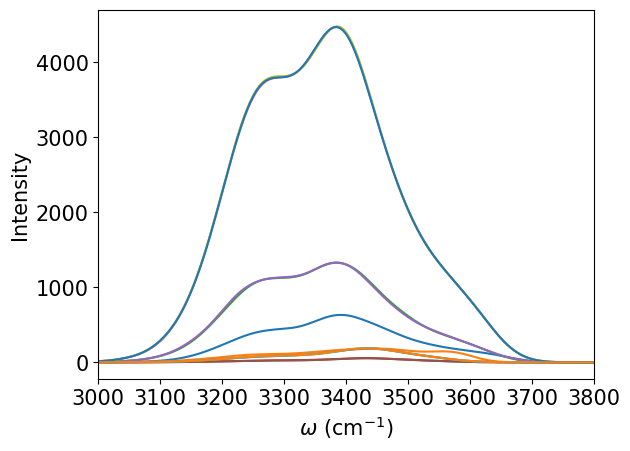

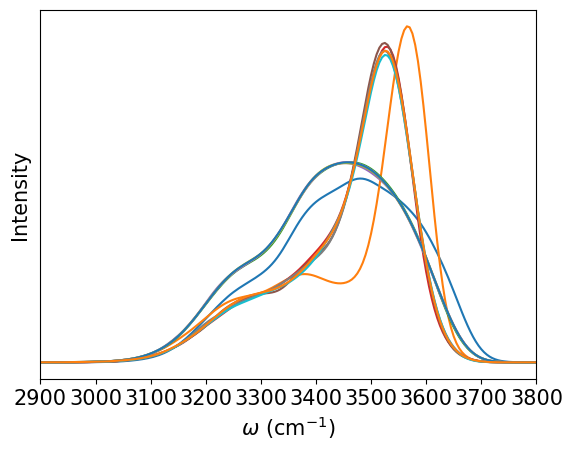

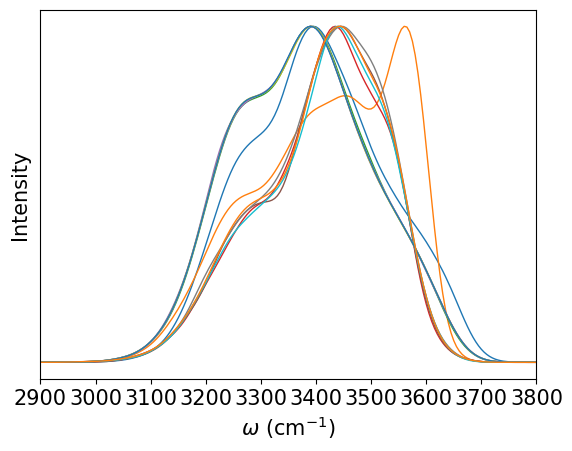

In [26]:
combos = sort_spectra(vs, vals, allfreqs, allacts)

2900.0


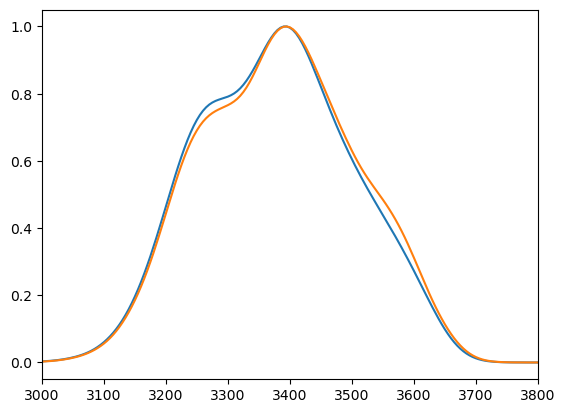

In [27]:
#SPCE spectra by distance
collect = []

collect.append(combos[0][0])

for i in range(3):
    collect.append(combos[2*i][3] + combos[2*i+1][3])# Spectra by distance


collect.append(combos[6][3] + combos[7][3] + combos[8][3] + combos[9][3] + combos[10][3] +combos[11][3]) #Bulk
collect.append(1*combos[0][3] + 
               1*combos[1][3] + 
               combos[2][3] + 
               combos[3][3] + 
               1*combos[4][3] + 
               1*combos[5][3])#Interface


collect = np.array(collect)

plt.xlim(3000, 3800)
collect[1:] = (collect[1:].T / np.sum(collect[1:, 300:], axis=1)).T
print(collect[0][400])


for i in range(4, 6):
    plt.plot(collect[0], collect[i]/np.max(collect[i]))
    

#np.save('spce_spectra_by_distance0_2.npy', collect)




2400.0
1.0 1.0


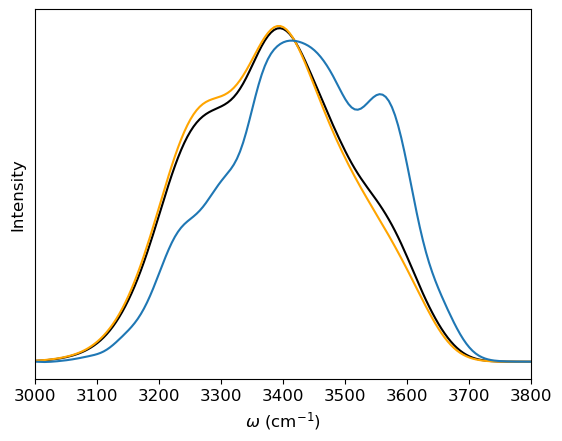

In [28]:
# SC spectra 
    
plt.plot(collect[0], collect[5], c='black') # Interface
plt.plot(collect[0], collect[4], c='orange') #Bulk


xs = 0.88 #amount subtracted
sc = (collect[5] - xs*collect[4]) /(1-xs)
plt.plot(collect[0], sc)
plt.xlim(3000, 3800)



plt.xlabel('$\omega$ (cm$^{-1}$)', size=fs)
plt.ylabel('Intensity', size=fs)
plt.xticks(size=fs)
plt.yticks([], size=fs)


noshift_spectra = np.array([collect[0], collect[4], collect[5], sc])

#np.save("no_shiftspectra", noshift_spectra)
print(collect[0][300])

print(np.sum(collect[5][300:]), np.sum(collect[4][300:]))



[4.63095492e-03 1.51683150e-02 9.00251542e-03 3.23734364e+03
 3.41531018e+03 3.57365623e+03 7.73721442e+01 1.18516882e+02
 7.25019247e+01]
1.6175738935117816
0.04872074867498427


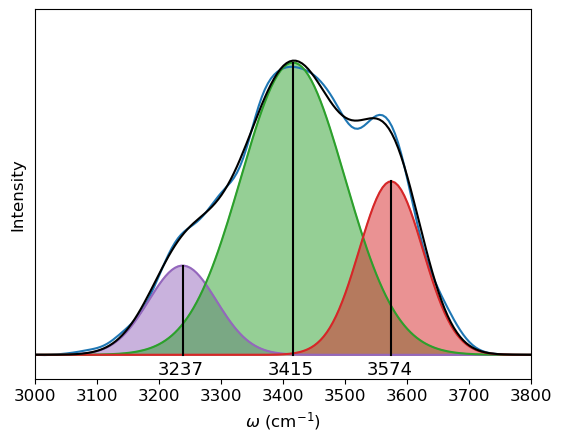

In [29]:
from scipy.optimize import curve_fit

plt.plot(collect[0], sc, c='C0')




curve = lambda freq, h1, h2, h3, f1, f2, f3, w1, w2, w3: (1*h1*np.exp(-((freq - f1)/w1)**2)
                                              + h2*np.exp(-((freq - f2)/w2)**2)
                                              + h3*np.exp(-((freq - f3)/w3)**2))



plt.xlim(3000, 3800)

param, cov = curve_fit(curve, collect[0], sc, maxfev= 10000, p0 = [0.00, 0.01, 0.01,
                                                    3220, 3400, 3600, 
                                                    10, 120, 10])



print(param)
xx = collect[0]
alterparam = np.copy(param)
alterparam[1:3] = 0
yy = curve(xx, *alterparam)
plt.plot(xx, yy, c='C4')


plt.fill_between(xx, yy, 0, color='C4', alpha = 0.5)
yy2 = np.copy(yy)

alterparam = np.copy(param)
alterparam[[0, 2]] = 0
yy = curve(xx, *alterparam)

yy1 = np.copy(yy)
plt.plot(xx, yy, c='C2')
plt.fill_between(xx, yy, 0, color='C2', alpha = 0.5)


alterparam = np.copy(param)
alterparam[:2] = 0
yy = curve(xx, *alterparam)

plt.plot(xx, yy, c='C3')

plt.fill_between(xx, yy, 0, color='C3', alpha = 0.5)


plt.xlabel('$\omega$ (cm$^{-1}$)', size=fs)
plt.ylabel('Intensity', size=fs)
plt.xticks(size=fs)
plt.yticks([], size=fs)
plt.plot(xx, yy1 + yy2 + yy, c='black')

plt.plot([param[4]]*2, [0, np.max(yy1)], c='black')
plt.plot([param[5]]*2, [0, np.max(yy)], c='black')
plt.plot([param[3]]*2, [0, np.max(yy2)], c='black')


plt.text(param[4]-40, -np.max(sc)/15, str(int(np.round(param[4], 0))), fontsize=13)
plt.text(param[5]-40, -np.max(sc)/15, str(int(np.round(param[5], 0))), fontsize=13)
plt.text(param[3]-40, -np.max(sc)/15, str(int(np.round(param[3], 0))), fontsize=13)



plt.ylim(-np.max(sc)/12, np.max(sc)*1.2)
print(np.sum(np.abs(sc - np.average(sc))))
print(np.sum(np.abs(sc - yy - yy1 - yy2)))

np.save('spcesc_param.npy', param)


np.save("spceshift_sc.npy", np.array([collect[0], sc]))



